# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "file"):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    fileName = picName + "_error.svg"
    fig_1.tight_layout() # This minimises whitespace around the axes.
    fig_1.savefig(fileName) # Save figure to current directory in PDF format
    fileName = picName + "_acc.svg"
    fig_2.tight_layout() # This minimises whitespace around the axes.
    fig_2.savefig(fileName) # Save figure to current directory in PDF format
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_return_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "file"):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    fileName = picName + "_error.svg"
    fig_1.tight_layout() # This minimises whitespace around the axes.
    fig_1.savefig(fileName) # Save figure to current directory in PDF format
    fileName = picName + "_acc.svg"
    fig_2.tight_layout() # This minimises whitespace around the axes.
    fig_2.savefig(fileName) # Save figure to current directory in PDF format
    
    return stats, keys, run_time


# Batch size = 50

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 50
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = MNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = MNISTDataProvider('valid', batch_size=batch_size, rng=rng)

# RELU activation function

HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 1.5s to complete
    error(train)=1.89e-01, acc(train)=9.45e-01, error(valid)=1.80e-01, acc(valid)=9.49e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 1.5s to complete
    error(train)=1.27e-01, acc(train)=9.62e-01, error(valid)=1.38e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.6s to complete
    error(train)=9.41e-02, acc(train)=9.71e-01, error(valid)=1.12e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.4s to complete
    error(train)=8.00e-02, acc(train)=9.75e-01, error(valid)=1.09e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.6s to complete
    error(train)=5.82e-02, acc(train)=9.82e-01, error(valid)=9.40e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.6s to complete
    error(train)=4.81e-02, acc(train)=9.86e-01, error(valid)=9.25e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.7s to complete
    error(train)=3.82e-02, acc(train)=9.89e-01, error(valid)=8.41e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.6s to complete
    error(train)=3.11e-02, acc(train)=9.91e-01, error(valid)=8.62e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.8s to complete
    error(train)=3.10e-02, acc(train)=9.91e-01, error(valid)=8.85e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.5s to complete
    error(train)=3.10e-02, acc(train)=9.91e-01, error(valid)=9.36e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.9s to complete
    error(train)=1.88e-02, acc(train)=9.95e-01, error(valid)=8.38e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 2.1s to complete
    error(train)=1.75e-02, acc(train)=9.96e-01, error(valid)=8.84e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.8s to complete
    error(train)=1.31e-02, acc(train)=9.97e-01, error(valid)=8.50e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 2.0s to complete
    error(train)=1.37e-02, acc(train)=9.96e-01, error(valid)=8.92e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.7s to complete
    error(train)=1.11e-02, acc(train)=9.98e-01, error(valid)=8.91e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.7s to complete
    error(train)=6.82e-03, acc(train)=9.99e-01, error(valid)=8.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.7s to complete
    error(train)=4.65e-03, acc(train)=1.00e+00, error(valid)=8.81e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.7s to complete
    error(train)=3.82e-03, acc(train)=1.00e+00, error(valid)=8.73e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.6s to complete
    error(train)=3.26e-03, acc(train)=1.00e+00, error(valid)=8.81e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.6s to complete
    error(train)=3.05e-03, acc(train)=1.00e+00, error(valid)=9.12e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.6s to complete
    error(train)=2.48e-03, acc(train)=1.00e+00, error(valid)=9.05e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.6s to complete
    error(train)=2.40e-03, acc(train)=1.00e+00, error(valid)=9.10e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.9s to complete
    error(train)=3.01e-03, acc(train)=1.00e+00, error(valid)=9.67e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.6s to complete
    error(train)=1.78e-03, acc(train)=1.00e+00, error(valid)=9.56e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.7s to complete
    error(train)=1.44e-03, acc(train)=1.00e+00, error(valid)=9.39e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.7s to complete
    error(train)=1.69e-03, acc(train)=1.00e+00, error(valid)=9.61e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.9s to complete
    error(train)=1.37e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.8s to complete
    error(train)=1.32e-03, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.7s to complete
    error(train)=1.02e-03, acc(train)=1.00e+00, error(valid)=9.92e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.8s to complete
    error(train)=9.41e-04, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 2.4s to complete
    error(train)=8.84e-04, acc(train)=1.00e+00, error(valid)=9.88e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.8s to complete
    error(train)=8.09e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.6s to complete
    error(train)=8.98e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.6s to complete
    error(train)=7.56e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 1.6s to complete
    error(train)=7.07e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.5s to complete
    error(train)=6.62e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.5s to complete
    error(train)=6.44e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.5s to complete
    error(train)=6.15e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.5s to complete
    error(train)=5.84e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.5s to complete
    error(train)=5.67e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.5s to complete
    error(train)=5.39e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.5s to complete
    error(train)=5.20e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.4s to complete
    error(train)=4.91e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.4s to complete
    error(train)=4.76e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.4s to complete
    error(train)=4.60e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.4s to complete
    error(train)=4.44e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.5s to complete
    error(train)=4.29e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.4s to complete
    error(train)=4.18e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.5s to complete
    error(train)=4.08e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.5s to complete
    error(train)=3.89e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.5s to complete
    error(train)=3.79e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.5s to complete
    error(train)=3.73e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.5s to complete
    error(train)=3.58e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.5s to complete
    error(train)=3.47e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.5s to complete
    error(train)=3.38e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.5s to complete
    error(train)=3.30e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.4s to complete
    error(train)=3.19e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.5s to complete
    error(train)=3.12e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.4s to complete
    error(train)=3.04e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.5s to complete
    error(train)=2.96e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.5s to complete
    error(train)=2.89e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.5s to complete
    error(train)=2.84e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.5s to complete
    error(train)=2.78e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.5s to complete
    error(train)=2.70e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.5s to complete
    error(train)=2.66e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.5s to complete
    error(train)=2.60e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 1.5s to complete
    error(train)=2.53e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.6s to complete
    error(train)=2.48e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.6s to complete
    error(train)=2.42e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.5s to complete
    error(train)=2.40e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.5s to complete
    error(train)=2.34e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.5s to complete
    error(train)=2.31e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.5s to complete
    error(train)=2.26e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.5s to complete
    error(train)=2.20e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.5s to complete
    error(train)=2.16e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.5s to complete
    error(train)=2.12e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.4s to complete
    error(train)=2.10e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.8s to complete
    error(train)=2.05e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.5s to complete
    error(train)=2.00e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.5s to complete
    error(train)=2.01e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.5s to complete
    error(train)=1.95e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.5s to complete
    error(train)=1.91e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.4s to complete
    error(train)=1.89e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.5s to complete
    error(train)=1.85e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 2.0s to complete
    error(train)=1.82e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.8s to complete
    error(train)=1.79e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.6s to complete
    error(train)=1.77e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.6s to complete
    error(train)=1.74e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.6s to complete
    error(train)=1.71e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.6s to complete
    error(train)=1.69e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.5s to complete
    error(train)=1.66e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.5s to complete
    error(train)=1.65e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.5s to complete
    error(train)=1.63e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.5s to complete
    error(train)=1.60e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.5s to complete
    error(train)=1.57e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.5s to complete
    error(train)=1.54e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.6s to complete
    error(train)=1.53e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.6s to complete
    error(train)=1.50e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.5s to complete
    error(train)=1.48e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.5s to complete
    error(train)=1.46e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


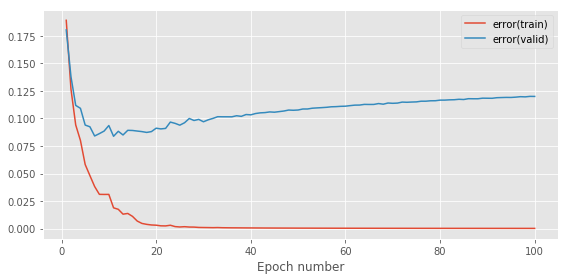

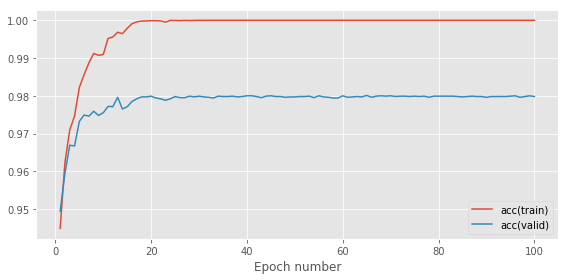

In [36]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

rng = np.random.RandomState(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
FB_ReLU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "ReLU")



# LRELU activation function

HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 1.9s to complete
    error(train)=2.02e-01, acc(train)=9.37e-01, error(valid)=1.97e-01, acc(valid)=9.41e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 1.7s to complete
    error(train)=1.22e-01, acc(train)=9.63e-01, error(valid)=1.31e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.6s to complete
    error(train)=8.86e-02, acc(train)=9.74e-01, error(valid)=1.12e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.6s to complete
    error(train)=6.67e-02, acc(train)=9.81e-01, error(valid)=9.69e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.6s to complete
    error(train)=6.08e-02, acc(train)=9.82e-01, error(valid)=9.92e-02, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.6s to complete
    error(train)=4.47e-02, acc(train)=9.87e-01, error(valid)=8.69e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.7s to complete
    error(train)=3.88e-02, acc(train)=9.89e-01, error(valid)=8.76e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.6s to complete
    error(train)=3.78e-02, acc(train)=9.88e-01, error(valid)=9.17e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.7s to complete
    error(train)=4.29e-02, acc(train)=9.86e-01, error(valid)=1.02e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.7s to complete
    error(train)=3.24e-02, acc(train)=9.90e-01, error(valid)=9.91e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.7s to complete
    error(train)=1.84e-02, acc(train)=9.95e-01, error(valid)=8.48e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.6s to complete
    error(train)=1.57e-02, acc(train)=9.96e-01, error(valid)=8.35e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.6s to complete
    error(train)=1.62e-02, acc(train)=9.96e-01, error(valid)=8.99e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.7s to complete
    error(train)=1.19e-02, acc(train)=9.97e-01, error(valid)=8.54e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.6s to complete
    error(train)=8.83e-03, acc(train)=9.98e-01, error(valid)=8.80e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.6s to complete
    error(train)=8.02e-03, acc(train)=9.99e-01, error(valid)=8.68e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.7s to complete
    error(train)=6.17e-03, acc(train)=9.99e-01, error(valid)=8.41e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.7s to complete
    error(train)=4.25e-03, acc(train)=1.00e+00, error(valid)=8.61e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.7s to complete
    error(train)=3.57e-03, acc(train)=1.00e+00, error(valid)=8.72e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.7s to complete
    error(train)=3.54e-03, acc(train)=1.00e+00, error(valid)=9.07e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.7s to complete
    error(train)=2.83e-03, acc(train)=1.00e+00, error(valid)=9.35e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.6s to complete
    error(train)=2.33e-03, acc(train)=1.00e+00, error(valid)=9.19e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.7s to complete
    error(train)=2.21e-03, acc(train)=1.00e+00, error(valid)=9.20e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.9s to complete
    error(train)=1.65e-03, acc(train)=1.00e+00, error(valid)=9.17e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.7s to complete
    error(train)=1.45e-03, acc(train)=1.00e+00, error(valid)=9.40e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.9s to complete
    error(train)=1.40e-03, acc(train)=1.00e+00, error(valid)=9.41e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 2.0s to complete
    error(train)=1.20e-03, acc(train)=1.00e+00, error(valid)=9.39e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.8s to complete
    error(train)=1.15e-03, acc(train)=1.00e+00, error(valid)=9.50e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.8s to complete
    error(train)=1.15e-03, acc(train)=1.00e+00, error(valid)=9.47e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.7s to complete
    error(train)=9.76e-04, acc(train)=1.00e+00, error(valid)=9.66e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.7s to complete
    error(train)=9.14e-04, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.6s to complete
    error(train)=8.73e-04, acc(train)=1.00e+00, error(valid)=9.76e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 2.4s to complete
    error(train)=9.78e-04, acc(train)=1.00e+00, error(valid)=9.87e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 2.7s to complete
    error(train)=7.51e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 2.1s to complete
    error(train)=7.10e-04, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.9s to complete
    error(train)=6.80e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.9s to complete
    error(train)=6.47e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.8s to complete
    error(train)=6.23e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.7s to complete
    error(train)=5.88e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.8s to complete
    error(train)=5.73e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.7s to complete
    error(train)=5.60e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.6s to complete
    error(train)=5.28e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.7s to complete
    error(train)=5.09e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.6s to complete
    error(train)=4.91e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.7s to complete
    error(train)=4.80e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.6s to complete
    error(train)=4.75e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.7s to complete
    error(train)=4.46e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.7s to complete
    error(train)=4.27e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.7s to complete
    error(train)=4.11e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.6s to complete
    error(train)=4.01e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.6s to complete
    error(train)=3.91e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.7s to complete
    error(train)=3.76e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.7s to complete
    error(train)=3.66e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.6s to complete
    error(train)=3.62e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.6s to complete
    error(train)=3.56e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.7s to complete
    error(train)=3.42e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.7s to complete
    error(train)=3.29e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.6s to complete
    error(train)=3.22e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.6s to complete
    error(train)=3.11e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.7s to complete
    error(train)=3.06e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.7s to complete
    error(train)=2.99e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.7s to complete
    error(train)=2.93e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.6s to complete
    error(train)=2.84e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.7s to complete
    error(train)=2.78e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.7s to complete
    error(train)=2.74e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.6s to complete
    error(train)=2.64e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 1.7s to complete
    error(train)=2.63e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.7s to complete
    error(train)=2.53e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.7s to complete
    error(train)=2.51e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.7s to complete
    error(train)=2.44e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.6s to complete
    error(train)=2.40e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.7s to complete
    error(train)=2.35e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.6s to complete
    error(train)=2.32e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.7s to complete
    error(train)=2.26e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.7s to complete
    error(train)=2.23e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.8s to complete
    error(train)=2.19e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.7s to complete
    error(train)=2.15e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.7s to complete
    error(train)=2.11e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.6s to complete
    error(train)=2.07e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 2.2s to complete
    error(train)=2.03e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 2.2s to complete
    error(train)=2.00e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.8s to complete
    error(train)=1.97e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.8s to complete
    error(train)=1.95e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.8s to complete
    error(train)=1.90e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.7s to complete
    error(train)=1.87e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 2.0s to complete
    error(train)=1.83e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.7s to complete
    error(train)=1.80e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.7s to complete
    error(train)=1.78e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.7s to complete
    error(train)=1.75e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.6s to complete
    error(train)=1.73e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.7s to complete
    error(train)=1.71e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.8s to complete
    error(train)=1.68e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.7s to complete
    error(train)=1.65e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.7s to complete
    error(train)=1.62e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.6s to complete
    error(train)=1.60e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.7s to complete
    error(train)=1.58e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.7s to complete
    error(train)=1.56e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.7s to complete
    error(train)=1.53e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.7s to complete
    error(train)=1.53e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.7s to complete
    error(train)=1.50e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


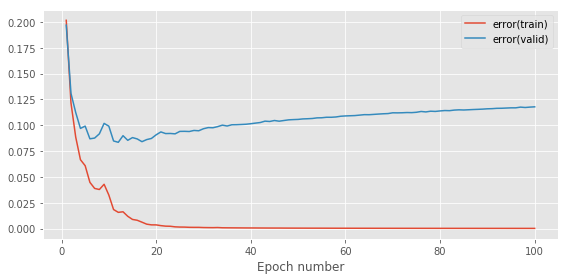

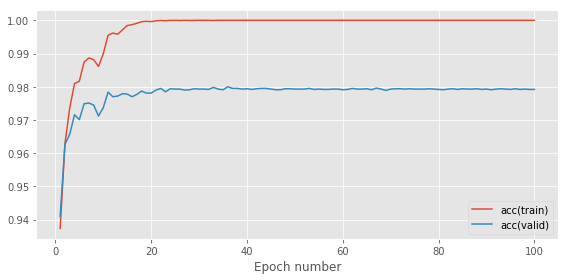

In [37]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

rng = np.random.RandomState(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
FB_LReLU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "LReLU")


# ELU activation function

HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 2.2s to complete
    error(train)=2.17e-01, acc(train)=9.36e-01, error(valid)=2.07e-01, acc(valid)=9.38e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 2.0s to complete
    error(train)=1.53e-01, acc(train)=9.54e-01, error(valid)=1.58e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.9s to complete
    error(train)=1.11e-01, acc(train)=9.67e-01, error(valid)=1.22e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.9s to complete
    error(train)=1.16e-01, acc(train)=9.64e-01, error(valid)=1.29e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.9s to complete
    error(train)=7.52e-02, acc(train)=9.77e-01, error(valid)=9.97e-02, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.9s to complete
    error(train)=6.43e-02, acc(train)=9.81e-01, error(valid)=9.57e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.9s to complete
    error(train)=5.50e-02, acc(train)=9.84e-01, error(valid)=8.85e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.9s to complete
    error(train)=4.56e-02, acc(train)=9.87e-01, error(valid)=8.54e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.9s to complete
    error(train)=4.43e-02, acc(train)=9.87e-01, error(valid)=8.29e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.9s to complete
    error(train)=5.02e-02, acc(train)=9.84e-01, error(valid)=9.49e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.9s to complete
    error(train)=3.09e-02, acc(train)=9.92e-01, error(valid)=8.23e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.9s to complete
    error(train)=2.49e-02, acc(train)=9.94e-01, error(valid)=7.93e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.9s to complete
    error(train)=2.37e-02, acc(train)=9.93e-01, error(valid)=8.31e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.9s to complete
    error(train)=2.03e-02, acc(train)=9.95e-01, error(valid)=8.30e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.9s to complete
    error(train)=1.76e-02, acc(train)=9.95e-01, error(valid)=8.27e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.9s to complete
    error(train)=1.52e-02, acc(train)=9.97e-01, error(valid)=8.06e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 2.0s to complete
    error(train)=1.49e-02, acc(train)=9.96e-01, error(valid)=8.86e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.9s to complete
    error(train)=1.25e-02, acc(train)=9.97e-01, error(valid)=8.76e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.9s to complete
    error(train)=1.07e-02, acc(train)=9.98e-01, error(valid)=8.82e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.9s to complete
    error(train)=9.37e-03, acc(train)=9.98e-01, error(valid)=8.69e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 2.0s to complete
    error(train)=7.42e-03, acc(train)=9.99e-01, error(valid)=8.61e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 3.2s to complete
    error(train)=5.91e-03, acc(train)=9.99e-01, error(valid)=8.68e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 3.3s to complete
    error(train)=5.24e-03, acc(train)=9.99e-01, error(valid)=8.87e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 2.0s to complete
    error(train)=7.49e-03, acc(train)=9.98e-01, error(valid)=9.71e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 2.0s to complete
    error(train)=5.15e-03, acc(train)=9.99e-01, error(valid)=9.28e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 2.0s to complete
    error(train)=3.36e-03, acc(train)=1.00e+00, error(valid)=9.26e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.9s to complete
    error(train)=3.29e-03, acc(train)=1.00e+00, error(valid)=9.39e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 2.0s to complete
    error(train)=2.85e-03, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.9s to complete
    error(train)=2.55e-03, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 2.0s to complete
    error(train)=2.25e-03, acc(train)=1.00e+00, error(valid)=9.57e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 2.0s to complete
    error(train)=1.98e-03, acc(train)=1.00e+00, error(valid)=9.47e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.8s to complete
    error(train)=1.90e-03, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 2.4s to complete
    error(train)=1.65e-03, acc(train)=1.00e+00, error(valid)=9.66e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 2.0s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 2.1s to complete
    error(train)=1.47e-03, acc(train)=1.00e+00, error(valid)=9.99e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.9s to complete
    error(train)=1.38e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.9s to complete
    error(train)=1.20e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 2.3s to complete
    error(train)=1.17e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.9s to complete
    error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.8s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 2.0s to complete
    error(train)=9.78e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 2.0s to complete
    error(train)=9.30e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 2.0s to complete
    error(train)=8.67e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 2.4s to complete
    error(train)=8.43e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 2.0s to complete
    error(train)=7.87e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 2.0s to complete
    error(train)=7.67e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.9s to complete
    error(train)=7.57e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.9s to complete
    error(train)=7.08e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.9s to complete
    error(train)=6.78e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 2.0s to complete
    error(train)=6.83e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.9s to complete
    error(train)=6.35e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.9s to complete
    error(train)=6.23e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.9s to complete
    error(train)=6.19e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.9s to complete
    error(train)=5.79e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.9s to complete
    error(train)=6.21e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.9s to complete
    error(train)=5.40e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.9s to complete
    error(train)=5.20e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.8s to complete
    error(train)=5.03e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.9s to complete
    error(train)=4.84e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.9s to complete
    error(train)=4.79e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.9s to complete
    error(train)=4.72e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 2.5s to complete
    error(train)=4.48e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 2.6s to complete
    error(train)=4.43e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 2.5s to complete
    error(train)=4.26e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 2.2s to complete
    error(train)=4.18e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 2.0s to complete
    error(train)=4.10e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 2.0s to complete
    error(train)=4.12e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.9s to complete
    error(train)=3.84e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.9s to complete
    error(train)=3.77e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.9s to complete
    error(train)=3.67e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.8s to complete
    error(train)=3.66e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.8s to complete
    error(train)=3.58e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.8s to complete
    error(train)=3.43e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.9s to complete
    error(train)=3.41e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 2.2s to complete
    error(train)=3.28e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.9s to complete
    error(train)=3.25e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.9s to complete
    error(train)=3.17e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.9s to complete
    error(train)=3.11e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.9s to complete
    error(train)=3.05e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.9s to complete
    error(train)=2.97e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 2.0s to complete
    error(train)=2.91e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.9s to complete
    error(train)=2.89e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.9s to complete
    error(train)=2.81e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.9s to complete
    error(train)=2.78e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.9s to complete
    error(train)=2.70e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.9s to complete
    error(train)=2.66e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 2.0s to complete
    error(train)=2.64e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.9s to complete
    error(train)=2.58e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.8s to complete
    error(train)=2.56e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.9s to complete
    error(train)=2.48e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.8s to complete
    error(train)=2.45e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.9s to complete
    error(train)=2.40e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.8s to complete
    error(train)=2.37e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 2.0s to complete
    error(train)=2.33e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 2.1s to complete
    error(train)=2.30e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.8s to complete
    error(train)=2.26e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.9s to complete
    error(train)=2.23e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 2.0s to complete
    error(train)=2.21e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.8s to complete
    error(train)=2.17e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.9s to complete
    error(train)=2.14e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


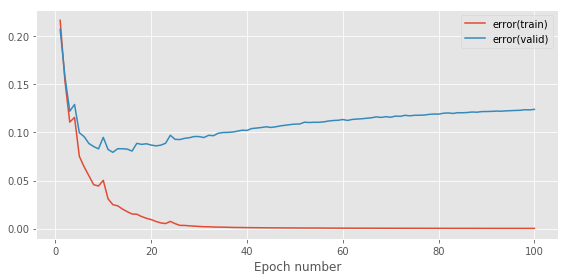

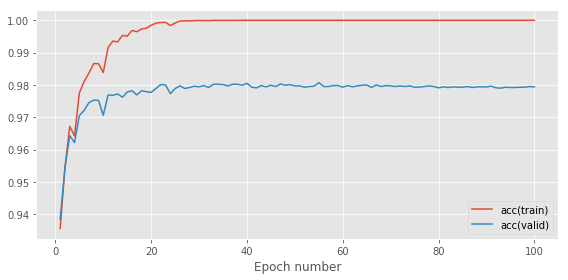

In [38]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

rng = np.random.RandomState(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
FB_ELU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "ELU")

# SELU activation function

HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 2.3s to complete
    error(train)=2.27e-01, acc(train)=9.31e-01, error(valid)=2.18e-01, acc(valid)=9.36e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 3.0s to complete
    error(train)=1.51e-01, acc(train)=9.54e-01, error(valid)=1.52e-01, acc(valid)=9.57e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 2.2s to complete
    error(train)=1.09e-01, acc(train)=9.67e-01, error(valid)=1.22e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 2.2s to complete
    error(train)=8.63e-02, acc(train)=9.74e-01, error(valid)=1.05e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 2.0s to complete
    error(train)=7.12e-02, acc(train)=9.79e-01, error(valid)=1.00e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 2.1s to complete
    error(train)=6.00e-02, acc(train)=9.82e-01, error(valid)=9.58e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 2.1s to complete
    error(train)=5.80e-02, acc(train)=9.82e-01, error(valid)=9.56e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 2.0s to complete
    error(train)=4.28e-02, acc(train)=9.87e-01, error(valid)=8.62e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 2.1s to complete
    error(train)=4.20e-02, acc(train)=9.87e-01, error(valid)=9.07e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 2.1s to complete
    error(train)=3.50e-02, acc(train)=9.89e-01, error(valid)=9.25e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 2.1s to complete
    error(train)=3.12e-02, acc(train)=9.91e-01, error(valid)=8.89e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.9s to complete
    error(train)=2.69e-02, acc(train)=9.92e-01, error(valid)=9.16e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.9s to complete
    error(train)=1.91e-02, acc(train)=9.95e-01, error(valid)=8.30e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.9s to complete
    error(train)=1.88e-02, acc(train)=9.95e-01, error(valid)=8.45e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.9s to complete
    error(train)=1.58e-02, acc(train)=9.96e-01, error(valid)=9.06e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.9s to complete
    error(train)=1.46e-02, acc(train)=9.96e-01, error(valid)=9.17e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 2.1s to complete
    error(train)=1.09e-02, acc(train)=9.98e-01, error(valid)=9.16e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.9s to complete
    error(train)=1.28e-02, acc(train)=9.97e-01, error(valid)=9.46e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.9s to complete
    error(train)=8.85e-03, acc(train)=9.98e-01, error(valid)=9.40e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.9s to complete
    error(train)=7.40e-03, acc(train)=9.99e-01, error(valid)=9.30e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 2.0s to complete
    error(train)=7.23e-03, acc(train)=9.98e-01, error(valid)=9.91e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.9s to complete
    error(train)=5.22e-03, acc(train)=9.99e-01, error(valid)=9.55e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.9s to complete
    error(train)=4.46e-03, acc(train)=1.00e+00, error(valid)=9.79e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.9s to complete
    error(train)=3.69e-03, acc(train)=1.00e+00, error(valid)=9.72e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.9s to complete
    error(train)=3.16e-03, acc(train)=1.00e+00, error(valid)=9.72e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.9s to complete
    error(train)=4.77e-03, acc(train)=9.99e-01, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.9s to complete
    error(train)=2.47e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 2.1s to complete
    error(train)=2.56e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.9s to complete
    error(train)=1.89e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 2.2s to complete
    error(train)=1.78e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 2.0s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 2.2s to complete
    error(train)=1.50e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.9s to complete
    error(train)=1.40e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 2.1s to complete
    error(train)=1.33e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 2.2s to complete
    error(train)=1.21e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 2.1s to complete
    error(train)=1.21e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 2.1s to complete
    error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 2.1s to complete
    error(train)=1.05e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 2.1s to complete
    error(train)=9.72e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 2.2s to complete
    error(train)=9.12e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 2.7s to complete
    error(train)=8.70e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 2.8s to complete
    error(train)=8.39e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 2.2s to complete
    error(train)=8.00e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 2.1s to complete
    error(train)=7.81e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 2.2s to complete
    error(train)=7.37e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.9s to complete
    error(train)=7.00e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.9s to complete
    error(train)=6.83e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 2.1s to complete
    error(train)=6.59e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.9s to complete
    error(train)=6.47e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 2.2s to complete
    error(train)=6.21e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 2.2s to complete
    error(train)=5.88e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.9s to complete
    error(train)=5.76e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.9s to complete
    error(train)=5.50e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.9s to complete
    error(train)=5.30e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.9s to complete
    error(train)=5.21e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.9s to complete
    error(train)=5.03e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 2.1s to complete
    error(train)=4.86e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 2.0s to complete
    error(train)=4.81e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.9s to complete
    error(train)=4.62e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 2.1s to complete
    error(train)=4.49e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.9s to complete
    error(train)=4.36e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 2.1s to complete
    error(train)=4.27e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.9s to complete
    error(train)=4.14e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 2.0s to complete
    error(train)=4.04e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.9s to complete
    error(train)=3.98e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.9s to complete
    error(train)=3.88e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 2.1s to complete
    error(train)=3.90e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 2.1s to complete
    error(train)=3.74e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.9s to complete
    error(train)=3.62e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 2.2s to complete
    error(train)=3.51e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 2.0s to complete
    error(train)=3.50e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 2.2s to complete
    error(train)=3.45e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 2.1s to complete
    error(train)=3.35e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 2.0s to complete
    error(train)=3.28e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.9s to complete
    error(train)=3.22e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.9s to complete
    error(train)=3.12e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.9s to complete
    error(train)=3.08e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.9s to complete
    error(train)=3.01e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 2.5s to complete
    error(train)=2.97e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 2.5s to complete
    error(train)=2.91e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 2.0s to complete
    error(train)=2.87e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 2.0s to complete
    error(train)=2.80e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 2.1s to complete
    error(train)=2.78e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 2.1s to complete
    error(train)=2.76e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.9s to complete
    error(train)=2.67e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.9s to complete
    error(train)=2.64e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.9s to complete
    error(train)=2.60e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.9s to complete
    error(train)=2.55e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.9s to complete
    error(train)=2.50e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.9s to complete
    error(train)=2.46e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.9s to complete
    error(train)=2.42e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 2.0s to complete
    error(train)=2.40e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 2.2s to complete
    error(train)=2.35e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.9s to complete
    error(train)=2.32e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 2.1s to complete
    error(train)=2.28e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.9s to complete
    error(train)=2.24e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 2.1s to complete
    error(train)=2.23e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 2.1s to complete
    error(train)=2.19e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.9s to complete
    error(train)=2.15e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 2.1s to complete
    error(train)=2.12e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


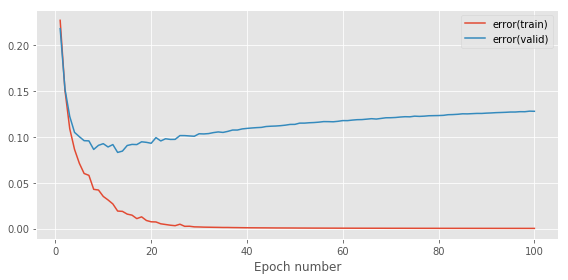

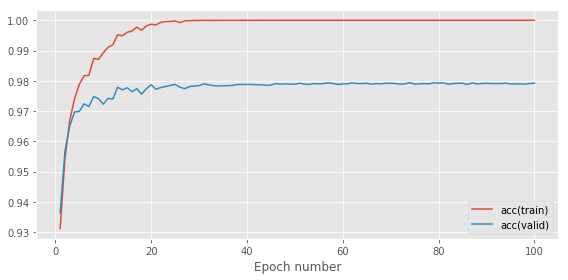

In [39]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

rng = np.random.RandomState(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
FB_SELU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "SELU")

# Sigmoid activation function

HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 2.1s to complete
    error(train)=5.61e-01, acc(train)=8.54e-01, error(valid)=5.26e-01, acc(valid)=8.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 1.7s to complete
    error(train)=3.78e-01, acc(train)=8.94e-01, error(valid)=3.53e-01, acc(valid)=9.03e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.7s to complete
    error(train)=3.20e-01, acc(train)=9.09e-01, error(valid)=2.99e-01, acc(valid)=9.16e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.8s to complete
    error(train)=2.86e-01, acc(train)=9.18e-01, error(valid)=2.67e-01, acc(valid)=9.24e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.7s to complete
    error(train)=2.56e-01, acc(train)=9.26e-01, error(valid)=2.41e-01, acc(valid)=9.30e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.6s to complete
    error(train)=2.37e-01, acc(train)=9.32e-01, error(valid)=2.25e-01, acc(valid)=9.33e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.7s to complete
    error(train)=2.13e-01, acc(train)=9.38e-01, error(valid)=2.03e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.7s to complete
    error(train)=2.00e-01, acc(train)=9.41e-01, error(valid)=1.91e-01, acc(valid)=9.45e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.7s to complete
    error(train)=1.88e-01, acc(train)=9.45e-01, error(valid)=1.82e-01, acc(valid)=9.49e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.7s to complete
    error(train)=1.66e-01, acc(train)=9.51e-01, error(valid)=1.64e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.8s to complete
    error(train)=1.55e-01, acc(train)=9.55e-01, error(valid)=1.54e-01, acc(valid)=9.56e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.7s to complete
    error(train)=1.46e-01, acc(train)=9.57e-01, error(valid)=1.49e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.7s to complete
    error(train)=1.37e-01, acc(train)=9.60e-01, error(valid)=1.42e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.7s to complete
    error(train)=1.30e-01, acc(train)=9.62e-01, error(valid)=1.37e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.7s to complete
    error(train)=1.23e-01, acc(train)=9.65e-01, error(valid)=1.31e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.8s to complete
    error(train)=1.15e-01, acc(train)=9.67e-01, error(valid)=1.28e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.8s to complete
    error(train)=1.07e-01, acc(train)=9.69e-01, error(valid)=1.21e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.7s to complete
    error(train)=1.05e-01, acc(train)=9.69e-01, error(valid)=1.21e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.7s to complete
    error(train)=9.70e-02, acc(train)=9.73e-01, error(valid)=1.14e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.8s to complete
    error(train)=9.54e-02, acc(train)=9.73e-01, error(valid)=1.14e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 2.7s to complete
    error(train)=8.79e-02, acc(train)=9.76e-01, error(valid)=1.08e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 2.4s to complete
    error(train)=8.79e-02, acc(train)=9.75e-01, error(valid)=1.12e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.8s to complete
    error(train)=8.21e-02, acc(train)=9.77e-01, error(valid)=1.05e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.7s to complete
    error(train)=7.72e-02, acc(train)=9.78e-01, error(valid)=1.03e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.8s to complete
    error(train)=7.31e-02, acc(train)=9.80e-01, error(valid)=1.01e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.9s to complete
    error(train)=7.10e-02, acc(train)=9.81e-01, error(valid)=9.79e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.7s to complete
    error(train)=6.76e-02, acc(train)=9.81e-01, error(valid)=9.67e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.7s to complete
    error(train)=6.32e-02, acc(train)=9.83e-01, error(valid)=9.52e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.6s to complete
    error(train)=6.42e-02, acc(train)=9.83e-01, error(valid)=9.83e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.6s to complete
    error(train)=5.99e-02, acc(train)=9.84e-01, error(valid)=9.39e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.7s to complete
    error(train)=5.69e-02, acc(train)=9.85e-01, error(valid)=9.23e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.7s to complete
    error(train)=5.35e-02, acc(train)=9.86e-01, error(valid)=8.97e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.8s to complete
    error(train)=5.25e-02, acc(train)=9.86e-01, error(valid)=8.94e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.7s to complete
    error(train)=5.13e-02, acc(train)=9.87e-01, error(valid)=8.94e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 1.6s to complete
    error(train)=4.96e-02, acc(train)=9.87e-01, error(valid)=8.90e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.6s to complete
    error(train)=4.77e-02, acc(train)=9.88e-01, error(valid)=8.76e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.6s to complete
    error(train)=4.41e-02, acc(train)=9.89e-01, error(valid)=8.57e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.7s to complete
    error(train)=4.23e-02, acc(train)=9.90e-01, error(valid)=8.53e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.7s to complete
    error(train)=3.98e-02, acc(train)=9.90e-01, error(valid)=8.47e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.6s to complete
    error(train)=4.17e-02, acc(train)=9.89e-01, error(valid)=8.65e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.8s to complete
    error(train)=3.72e-02, acc(train)=9.91e-01, error(valid)=8.36e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.8s to complete
    error(train)=3.90e-02, acc(train)=9.90e-01, error(valid)=8.51e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.7s to complete
    error(train)=3.45e-02, acc(train)=9.92e-01, error(valid)=8.29e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.7s to complete
    error(train)=3.29e-02, acc(train)=9.93e-01, error(valid)=8.20e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.7s to complete
    error(train)=3.23e-02, acc(train)=9.93e-01, error(valid)=8.41e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.7s to complete
    error(train)=3.08e-02, acc(train)=9.93e-01, error(valid)=8.32e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.8s to complete
    error(train)=2.99e-02, acc(train)=9.94e-01, error(valid)=8.37e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.6s to complete
    error(train)=2.82e-02, acc(train)=9.94e-01, error(valid)=8.22e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.8s to complete
    error(train)=2.71e-02, acc(train)=9.95e-01, error(valid)=8.16e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.7s to complete
    error(train)=3.00e-02, acc(train)=9.93e-01, error(valid)=8.48e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.7s to complete
    error(train)=2.77e-02, acc(train)=9.94e-01, error(valid)=8.61e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.6s to complete
    error(train)=2.46e-02, acc(train)=9.95e-01, error(valid)=8.04e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.7s to complete
    error(train)=2.33e-02, acc(train)=9.96e-01, error(valid)=8.18e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.8s to complete
    error(train)=2.25e-02, acc(train)=9.96e-01, error(valid)=8.18e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.6s to complete
    error(train)=2.18e-02, acc(train)=9.96e-01, error(valid)=8.15e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.7s to complete
    error(train)=2.16e-02, acc(train)=9.96e-01, error(valid)=8.20e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.6s to complete
    error(train)=2.02e-02, acc(train)=9.97e-01, error(valid)=8.11e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.7s to complete
    error(train)=2.03e-02, acc(train)=9.97e-01, error(valid)=8.25e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.8s to complete
    error(train)=1.92e-02, acc(train)=9.97e-01, error(valid)=8.14e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.6s to complete
    error(train)=1.85e-02, acc(train)=9.97e-01, error(valid)=8.16e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.8s to complete
    error(train)=1.72e-02, acc(train)=9.98e-01, error(valid)=8.03e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.7s to complete
    error(train)=1.71e-02, acc(train)=9.97e-01, error(valid)=8.09e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.6s to complete
    error(train)=1.66e-02, acc(train)=9.98e-01, error(valid)=8.15e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.7s to complete
    error(train)=1.63e-02, acc(train)=9.98e-01, error(valid)=8.07e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.6s to complete
    error(train)=1.54e-02, acc(train)=9.98e-01, error(valid)=8.05e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.8s to complete
    error(train)=1.48e-02, acc(train)=9.98e-01, error(valid)=8.09e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 2.1s to complete
    error(train)=1.44e-02, acc(train)=9.98e-01, error(valid)=8.02e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 2.9s to complete
    error(train)=1.39e-02, acc(train)=9.98e-01, error(valid)=8.15e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.8s to complete
    error(train)=1.33e-02, acc(train)=9.98e-01, error(valid)=8.03e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.8s to complete
    error(train)=1.34e-02, acc(train)=9.98e-01, error(valid)=8.34e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.8s to complete
    error(train)=1.30e-02, acc(train)=9.99e-01, error(valid)=8.35e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.7s to complete
    error(train)=1.28e-02, acc(train)=9.99e-01, error(valid)=8.11e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 2.0s to complete
    error(train)=1.17e-02, acc(train)=9.99e-01, error(valid)=8.21e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.8s to complete
    error(train)=1.11e-02, acc(train)=9.99e-01, error(valid)=8.09e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.6s to complete
    error(train)=1.08e-02, acc(train)=9.99e-01, error(valid)=8.11e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.7s to complete
    error(train)=1.05e-02, acc(train)=9.99e-01, error(valid)=8.13e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.7s to complete
    error(train)=1.02e-02, acc(train)=9.99e-01, error(valid)=8.06e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.6s to complete
    error(train)=1.00e-02, acc(train)=9.99e-01, error(valid)=8.16e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.6s to complete
    error(train)=1.01e-02, acc(train)=9.99e-01, error(valid)=8.44e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.7s to complete
    error(train)=9.58e-03, acc(train)=9.99e-01, error(valid)=8.21e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.6s to complete
    error(train)=9.01e-03, acc(train)=9.99e-01, error(valid)=8.27e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.7s to complete
    error(train)=9.00e-03, acc(train)=9.99e-01, error(valid)=8.29e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.7s to complete
    error(train)=8.87e-03, acc(train)=9.99e-01, error(valid)=8.40e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.7s to complete
    error(train)=8.32e-03, acc(train)=9.99e-01, error(valid)=8.28e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.7s to complete
    error(train)=8.74e-03, acc(train)=9.99e-01, error(valid)=8.31e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.7s to complete
    error(train)=7.98e-03, acc(train)=1.00e+00, error(valid)=8.36e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.7s to complete
    error(train)=7.48e-03, acc(train)=1.00e+00, error(valid)=8.30e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.7s to complete
    error(train)=7.76e-03, acc(train)=1.00e+00, error(valid)=8.49e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.6s to complete
    error(train)=7.30e-03, acc(train)=1.00e+00, error(valid)=8.34e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.7s to complete
    error(train)=7.20e-03, acc(train)=1.00e+00, error(valid)=8.38e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.7s to complete
    error(train)=6.91e-03, acc(train)=1.00e+00, error(valid)=8.34e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.7s to complete
    error(train)=6.66e-03, acc(train)=1.00e+00, error(valid)=8.33e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.8s to complete
    error(train)=6.55e-03, acc(train)=1.00e+00, error(valid)=8.45e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.8s to complete
    error(train)=6.20e-03, acc(train)=1.00e+00, error(valid)=8.35e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.7s to complete
    error(train)=6.17e-03, acc(train)=1.00e+00, error(valid)=8.33e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.7s to complete
    error(train)=6.16e-03, acc(train)=1.00e+00, error(valid)=8.39e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.6s to complete
    error(train)=5.84e-03, acc(train)=1.00e+00, error(valid)=8.31e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.6s to complete
    error(train)=5.57e-03, acc(train)=1.00e+00, error(valid)=8.39e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.6s to complete
    error(train)=5.64e-03, acc(train)=1.00e+00, error(valid)=8.50e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.7s to complete
    error(train)=5.33e-03, acc(train)=1.00e+00, error(valid)=8.44e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


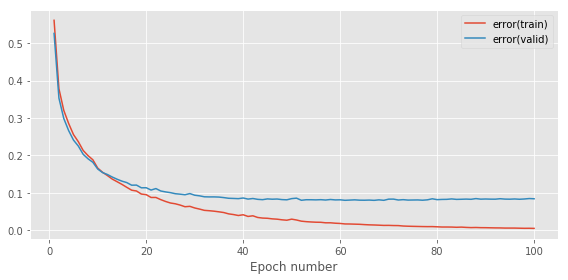

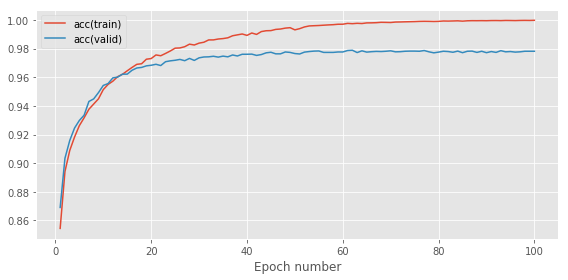

In [40]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

rng = np.random.RandomState(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
FB_SigU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "Sigmoid")

# Sigmoid activation function with 300 epoch

HBox(children=(IntProgress(value=0, max=300), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 1.6s to complete
    error(train)=5.63e-01, acc(train)=8.55e-01, error(valid)=5.27e-01, acc(valid)=8.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 1.7s to complete
    error(train)=3.77e-01, acc(train)=8.94e-01, error(valid)=3.51e-01, acc(valid)=9.04e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.8s to complete
    error(train)=3.20e-01, acc(train)=9.08e-01, error(valid)=2.99e-01, acc(valid)=9.15e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 2.3s to complete
    error(train)=2.85e-01, acc(train)=9.19e-01, error(valid)=2.67e-01, acc(valid)=9.25e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.7s to complete
    error(train)=2.56e-01, acc(train)=9.26e-01, error(valid)=2.41e-01, acc(valid)=9.32e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.6s to complete
    error(train)=2.34e-01, acc(train)=9.32e-01, error(valid)=2.21e-01, acc(valid)=9.35e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.6s to complete
    error(train)=2.13e-01, acc(train)=9.39e-01, error(valid)=2.04e-01, acc(valid)=9.42e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.6s to complete
    error(train)=1.97e-01, acc(train)=9.43e-01, error(valid)=1.90e-01, acc(valid)=9.46e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.9s to complete
    error(train)=1.83e-01, acc(train)=9.46e-01, error(valid)=1.80e-01, acc(valid)=9.50e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.8s to complete
    error(train)=1.69e-01, acc(train)=9.51e-01, error(valid)=1.69e-01, acc(valid)=9.53e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.6s to complete
    error(train)=1.58e-01, acc(train)=9.54e-01, error(valid)=1.58e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 2.2s to complete
    error(train)=1.48e-01, acc(train)=9.57e-01, error(valid)=1.49e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.6s to complete
    error(train)=1.37e-01, acc(train)=9.60e-01, error(valid)=1.42e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.6s to complete
    error(train)=1.30e-01, acc(train)=9.62e-01, error(valid)=1.37e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.6s to complete
    error(train)=1.23e-01, acc(train)=9.65e-01, error(valid)=1.32e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.6s to complete
    error(train)=1.20e-01, acc(train)=9.65e-01, error(valid)=1.32e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.6s to complete
    error(train)=1.09e-01, acc(train)=9.69e-01, error(valid)=1.24e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.6s to complete
    error(train)=1.05e-01, acc(train)=9.70e-01, error(valid)=1.19e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.6s to complete
    error(train)=9.78e-02, acc(train)=9.73e-01, error(valid)=1.14e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.6s to complete
    error(train)=9.47e-02, acc(train)=9.73e-01, error(valid)=1.14e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.6s to complete
    error(train)=8.94e-02, acc(train)=9.74e-01, error(valid)=1.09e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.6s to complete
    error(train)=8.51e-02, acc(train)=9.76e-01, error(valid)=1.07e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.6s to complete
    error(train)=8.34e-02, acc(train)=9.76e-01, error(valid)=1.07e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.6s to complete
    error(train)=7.87e-02, acc(train)=9.78e-01, error(valid)=1.04e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.9s to complete
    error(train)=7.46e-02, acc(train)=9.79e-01, error(valid)=1.02e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.6s to complete
    error(train)=7.10e-02, acc(train)=9.80e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.6s to complete
    error(train)=6.71e-02, acc(train)=9.82e-01, error(valid)=9.47e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.7s to complete
    error(train)=6.55e-02, acc(train)=9.82e-01, error(valid)=9.73e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.6s to complete
    error(train)=6.15e-02, acc(train)=9.83e-01, error(valid)=9.35e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.6s to complete
    error(train)=5.89e-02, acc(train)=9.84e-01, error(valid)=9.26e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.6s to complete
    error(train)=5.75e-02, acc(train)=9.85e-01, error(valid)=9.27e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.6s to complete
    error(train)=5.63e-02, acc(train)=9.85e-01, error(valid)=9.05e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.7s to complete
    error(train)=5.21e-02, acc(train)=9.87e-01, error(valid)=9.03e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.6s to complete
    error(train)=5.00e-02, acc(train)=9.87e-01, error(valid)=8.85e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 1.6s to complete
    error(train)=4.91e-02, acc(train)=9.87e-01, error(valid)=8.89e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.6s to complete
    error(train)=4.97e-02, acc(train)=9.87e-01, error(valid)=8.92e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.6s to complete
    error(train)=4.47e-02, acc(train)=9.89e-01, error(valid)=8.82e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.6s to complete
    error(train)=4.32e-02, acc(train)=9.90e-01, error(valid)=8.70e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.6s to complete
    error(train)=4.06e-02, acc(train)=9.90e-01, error(valid)=8.45e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.6s to complete
    error(train)=3.92e-02, acc(train)=9.91e-01, error(valid)=8.47e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.6s to complete
    error(train)=4.22e-02, acc(train)=9.89e-01, error(valid)=8.72e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.6s to complete
    error(train)=3.64e-02, acc(train)=9.91e-01, error(valid)=8.41e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.6s to complete
    error(train)=3.48e-02, acc(train)=9.92e-01, error(valid)=8.17e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.6s to complete
    error(train)=3.41e-02, acc(train)=9.92e-01, error(valid)=8.29e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.6s to complete
    error(train)=3.43e-02, acc(train)=9.92e-01, error(valid)=8.27e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.6s to complete
    error(train)=3.20e-02, acc(train)=9.93e-01, error(valid)=8.45e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.6s to complete
    error(train)=2.98e-02, acc(train)=9.94e-01, error(valid)=8.17e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.6s to complete
    error(train)=2.95e-02, acc(train)=9.94e-01, error(valid)=8.09e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.6s to complete
    error(train)=2.70e-02, acc(train)=9.95e-01, error(valid)=8.08e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.6s to complete
    error(train)=2.66e-02, acc(train)=9.95e-01, error(valid)=8.19e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.7s to complete
    error(train)=2.56e-02, acc(train)=9.95e-01, error(valid)=8.09e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.6s to complete
    error(train)=2.39e-02, acc(train)=9.96e-01, error(valid)=8.01e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.6s to complete
    error(train)=2.31e-02, acc(train)=9.96e-01, error(valid)=8.02e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.6s to complete
    error(train)=2.37e-02, acc(train)=9.95e-01, error(valid)=8.23e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.6s to complete
    error(train)=2.27e-02, acc(train)=9.96e-01, error(valid)=8.14e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.6s to complete
    error(train)=2.13e-02, acc(train)=9.96e-01, error(valid)=7.97e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.6s to complete
    error(train)=2.01e-02, acc(train)=9.97e-01, error(valid)=7.93e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.7s to complete
    error(train)=1.98e-02, acc(train)=9.97e-01, error(valid)=7.92e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.6s to complete
    error(train)=1.83e-02, acc(train)=9.97e-01, error(valid)=7.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.7s to complete
    error(train)=1.85e-02, acc(train)=9.97e-01, error(valid)=7.98e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.6s to complete
    error(train)=1.82e-02, acc(train)=9.97e-01, error(valid)=8.06e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.6s to complete
    error(train)=1.85e-02, acc(train)=9.97e-01, error(valid)=8.52e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.6s to complete
    error(train)=1.66e-02, acc(train)=9.98e-01, error(valid)=8.13e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.6s to complete
    error(train)=1.68e-02, acc(train)=9.97e-01, error(valid)=8.14e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.6s to complete
    error(train)=1.50e-02, acc(train)=9.98e-01, error(valid)=8.02e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 2.3s to complete
    error(train)=1.62e-02, acc(train)=9.98e-01, error(valid)=8.32e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 2.6s to complete
    error(train)=1.44e-02, acc(train)=9.98e-01, error(valid)=8.00e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 2.4s to complete
    error(train)=1.38e-02, acc(train)=9.98e-01, error(valid)=7.93e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 2.1s to complete
    error(train)=1.36e-02, acc(train)=9.98e-01, error(valid)=8.10e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.6s to complete
    error(train)=1.42e-02, acc(train)=9.98e-01, error(valid)=8.39e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.6s to complete
    error(train)=1.26e-02, acc(train)=9.99e-01, error(valid)=8.17e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.6s to complete
    error(train)=1.18e-02, acc(train)=9.99e-01, error(valid)=7.99e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.6s to complete
    error(train)=1.14e-02, acc(train)=9.99e-01, error(valid)=8.02e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.7s to complete
    error(train)=1.11e-02, acc(train)=9.99e-01, error(valid)=8.09e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.6s to complete
    error(train)=1.11e-02, acc(train)=9.99e-01, error(valid)=8.22e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.7s to complete
    error(train)=1.06e-02, acc(train)=9.99e-01, error(valid)=8.06e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.7s to complete
    error(train)=9.97e-03, acc(train)=9.99e-01, error(valid)=8.08e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.6s to complete
    error(train)=1.00e-02, acc(train)=9.99e-01, error(valid)=8.11e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.7s to complete
    error(train)=9.73e-03, acc(train)=9.99e-01, error(valid)=8.09e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.7s to complete
    error(train)=9.46e-03, acc(train)=9.99e-01, error(valid)=8.19e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.6s to complete
    error(train)=9.31e-03, acc(train)=9.99e-01, error(valid)=8.18e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.6s to complete
    error(train)=8.98e-03, acc(train)=9.99e-01, error(valid)=8.17e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.6s to complete
    error(train)=8.51e-03, acc(train)=9.99e-01, error(valid)=8.19e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.6s to complete
    error(train)=8.45e-03, acc(train)=9.99e-01, error(valid)=8.16e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.6s to complete
    error(train)=7.93e-03, acc(train)=1.00e+00, error(valid)=8.19e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.6s to complete
    error(train)=7.80e-03, acc(train)=1.00e+00, error(valid)=8.12e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.6s to complete
    error(train)=7.51e-03, acc(train)=9.99e-01, error(valid)=8.20e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.9s to complete
    error(train)=7.22e-03, acc(train)=1.00e+00, error(valid)=8.21e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.6s to complete
    error(train)=7.06e-03, acc(train)=1.00e+00, error(valid)=8.25e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.6s to complete
    error(train)=6.90e-03, acc(train)=1.00e+00, error(valid)=8.31e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.6s to complete
    error(train)=6.87e-03, acc(train)=1.00e+00, error(valid)=8.32e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.7s to complete
    error(train)=6.62e-03, acc(train)=1.00e+00, error(valid)=8.23e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.6s to complete
    error(train)=6.46e-03, acc(train)=1.00e+00, error(valid)=8.38e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.6s to complete
    error(train)=6.29e-03, acc(train)=1.00e+00, error(valid)=8.31e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.7s to complete
    error(train)=6.37e-03, acc(train)=1.00e+00, error(valid)=8.52e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.6s to complete
    error(train)=5.90e-03, acc(train)=1.00e+00, error(valid)=8.29e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.6s to complete
    error(train)=5.68e-03, acc(train)=1.00e+00, error(valid)=8.27e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.6s to complete
    error(train)=5.84e-03, acc(train)=1.00e+00, error(valid)=8.34e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.6s to complete
    error(train)=5.61e-03, acc(train)=1.00e+00, error(valid)=8.39e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.6s to complete
    error(train)=5.51e-03, acc(train)=1.00e+00, error(valid)=8.38e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 101: 1.6s to complete
    error(train)=5.29e-03, acc(train)=1.00e+00, error(valid)=8.34e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 102: 1.6s to complete
    error(train)=5.11e-03, acc(train)=1.00e+00, error(valid)=8.39e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 103: 1.8s to complete
    error(train)=4.95e-03, acc(train)=1.00e+00, error(valid)=8.35e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 104: 1.8s to complete
    error(train)=4.94e-03, acc(train)=1.00e+00, error(valid)=8.40e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 105: 1.6s to complete
    error(train)=4.69e-03, acc(train)=1.00e+00, error(valid)=8.41e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 106: 1.6s to complete
    error(train)=4.60e-03, acc(train)=1.00e+00, error(valid)=8.45e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 107: 1.8s to complete
    error(train)=4.54e-03, acc(train)=1.00e+00, error(valid)=8.38e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 108: 1.6s to complete
    error(train)=4.74e-03, acc(train)=1.00e+00, error(valid)=8.48e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 109: 1.6s to complete
    error(train)=4.39e-03, acc(train)=1.00e+00, error(valid)=8.47e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 110: 1.6s to complete
    error(train)=4.33e-03, acc(train)=1.00e+00, error(valid)=8.54e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 111: 1.6s to complete
    error(train)=4.21e-03, acc(train)=1.00e+00, error(valid)=8.47e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 112: 1.6s to complete
    error(train)=4.27e-03, acc(train)=1.00e+00, error(valid)=8.54e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 113: 1.7s to complete
    error(train)=4.03e-03, acc(train)=1.00e+00, error(valid)=8.52e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 114: 1.7s to complete
    error(train)=3.99e-03, acc(train)=1.00e+00, error(valid)=8.60e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 115: 1.6s to complete
    error(train)=3.88e-03, acc(train)=1.00e+00, error(valid)=8.59e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 116: 1.6s to complete
    error(train)=3.82e-03, acc(train)=1.00e+00, error(valid)=8.58e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 117: 1.7s to complete
    error(train)=3.76e-03, acc(train)=1.00e+00, error(valid)=8.60e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 118: 1.6s to complete
    error(train)=3.70e-03, acc(train)=1.00e+00, error(valid)=8.60e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 119: 1.6s to complete
    error(train)=3.62e-03, acc(train)=1.00e+00, error(valid)=8.63e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 120: 1.6s to complete
    error(train)=3.65e-03, acc(train)=1.00e+00, error(valid)=8.61e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 121: 1.6s to complete
    error(train)=3.45e-03, acc(train)=1.00e+00, error(valid)=8.63e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 122: 1.6s to complete
    error(train)=3.42e-03, acc(train)=1.00e+00, error(valid)=8.68e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 123: 1.6s to complete
    error(train)=3.43e-03, acc(train)=1.00e+00, error(valid)=8.70e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 124: 1.6s to complete
    error(train)=3.28e-03, acc(train)=1.00e+00, error(valid)=8.66e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 125: 1.7s to complete
    error(train)=3.33e-03, acc(train)=1.00e+00, error(valid)=8.73e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 126: 1.6s to complete
    error(train)=3.15e-03, acc(train)=1.00e+00, error(valid)=8.71e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 127: 1.7s to complete
    error(train)=3.14e-03, acc(train)=1.00e+00, error(valid)=8.71e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 128: 1.7s to complete
    error(train)=3.08e-03, acc(train)=1.00e+00, error(valid)=8.75e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 129: 1.7s to complete
    error(train)=3.03e-03, acc(train)=1.00e+00, error(valid)=8.76e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 130: 1.7s to complete
    error(train)=3.01e-03, acc(train)=1.00e+00, error(valid)=8.70e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 131: 1.7s to complete
    error(train)=3.00e-03, acc(train)=1.00e+00, error(valid)=8.75e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 132: 2.4s to complete
    error(train)=2.90e-03, acc(train)=1.00e+00, error(valid)=8.78e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 133: 1.6s to complete
    error(train)=2.89e-03, acc(train)=1.00e+00, error(valid)=8.81e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 134: 1.7s to complete
    error(train)=2.84e-03, acc(train)=1.00e+00, error(valid)=8.74e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 135: 1.7s to complete
    error(train)=2.76e-03, acc(train)=1.00e+00, error(valid)=8.76e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 136: 1.9s to complete
    error(train)=2.72e-03, acc(train)=1.00e+00, error(valid)=8.84e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 137: 2.0s to complete
    error(train)=2.68e-03, acc(train)=1.00e+00, error(valid)=8.84e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 138: 2.0s to complete
    error(train)=2.61e-03, acc(train)=1.00e+00, error(valid)=8.84e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 139: 1.7s to complete
    error(train)=2.60e-03, acc(train)=1.00e+00, error(valid)=8.79e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 140: 1.7s to complete
    error(train)=2.59e-03, acc(train)=1.00e+00, error(valid)=8.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 141: 1.7s to complete
    error(train)=2.53e-03, acc(train)=1.00e+00, error(valid)=8.89e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 142: 1.8s to complete
    error(train)=2.48e-03, acc(train)=1.00e+00, error(valid)=8.89e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 143: 2.0s to complete
    error(train)=2.47e-03, acc(train)=1.00e+00, error(valid)=8.85e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 144: 1.7s to complete
    error(train)=2.46e-03, acc(train)=1.00e+00, error(valid)=8.89e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 145: 1.8s to complete
    error(train)=2.40e-03, acc(train)=1.00e+00, error(valid)=8.84e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 146: 1.7s to complete
    error(train)=2.35e-03, acc(train)=1.00e+00, error(valid)=8.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 147: 1.6s to complete
    error(train)=2.32e-03, acc(train)=1.00e+00, error(valid)=8.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 148: 1.6s to complete
    error(train)=2.28e-03, acc(train)=1.00e+00, error(valid)=8.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 149: 1.9s to complete
    error(train)=2.27e-03, acc(train)=1.00e+00, error(valid)=8.92e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 150: 1.7s to complete
    error(train)=2.22e-03, acc(train)=1.00e+00, error(valid)=8.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 151: 2.1s to complete
    error(train)=2.19e-03, acc(train)=1.00e+00, error(valid)=8.95e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 152: 2.1s to complete
    error(train)=2.16e-03, acc(train)=1.00e+00, error(valid)=8.94e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 153: 2.6s to complete
    error(train)=2.16e-03, acc(train)=1.00e+00, error(valid)=8.99e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 154: 1.9s to complete
    error(train)=2.14e-03, acc(train)=1.00e+00, error(valid)=8.96e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 155: 2.5s to complete
    error(train)=2.08e-03, acc(train)=1.00e+00, error(valid)=8.99e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 156: 2.0s to complete
    error(train)=2.06e-03, acc(train)=1.00e+00, error(valid)=8.99e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 157: 1.7s to complete
    error(train)=2.06e-03, acc(train)=1.00e+00, error(valid)=9.05e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 158: 1.7s to complete
    error(train)=2.03e-03, acc(train)=1.00e+00, error(valid)=8.96e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 159: 1.7s to complete
    error(train)=1.98e-03, acc(train)=1.00e+00, error(valid)=9.05e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 160: 1.7s to complete
    error(train)=1.97e-03, acc(train)=1.00e+00, error(valid)=9.03e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 161: 1.7s to complete
    error(train)=1.94e-03, acc(train)=1.00e+00, error(valid)=9.04e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 162: 1.6s to complete
    error(train)=1.91e-03, acc(train)=1.00e+00, error(valid)=9.04e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 163: 1.7s to complete
    error(train)=1.92e-03, acc(train)=1.00e+00, error(valid)=9.06e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 164: 1.6s to complete
    error(train)=1.86e-03, acc(train)=1.00e+00, error(valid)=9.04e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 165: 1.7s to complete
    error(train)=1.87e-03, acc(train)=1.00e+00, error(valid)=9.05e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 166: 1.7s to complete
    error(train)=1.83e-03, acc(train)=1.00e+00, error(valid)=9.08e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 167: 1.6s to complete
    error(train)=1.82e-03, acc(train)=1.00e+00, error(valid)=9.14e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 168: 1.7s to complete
    error(train)=1.79e-03, acc(train)=1.00e+00, error(valid)=9.07e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 169: 1.6s to complete
    error(train)=1.78e-03, acc(train)=1.00e+00, error(valid)=9.16e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 170: 1.7s to complete
    error(train)=1.74e-03, acc(train)=1.00e+00, error(valid)=9.12e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 171: 1.7s to complete
    error(train)=1.73e-03, acc(train)=1.00e+00, error(valid)=9.09e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 172: 1.7s to complete
    error(train)=1.71e-03, acc(train)=1.00e+00, error(valid)=9.14e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 173: 1.6s to complete
    error(train)=1.70e-03, acc(train)=1.00e+00, error(valid)=9.17e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 174: 1.7s to complete
    error(train)=1.67e-03, acc(train)=1.00e+00, error(valid)=9.15e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 175: 1.6s to complete
    error(train)=1.66e-03, acc(train)=1.00e+00, error(valid)=9.16e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 176: 1.6s to complete
    error(train)=1.65e-03, acc(train)=1.00e+00, error(valid)=9.19e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 177: 1.7s to complete
    error(train)=1.63e-03, acc(train)=1.00e+00, error(valid)=9.17e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 178: 1.7s to complete
    error(train)=1.60e-03, acc(train)=1.00e+00, error(valid)=9.18e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 179: 1.9s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=9.18e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 180: 1.6s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=9.21e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 181: 1.7s to complete
    error(train)=1.56e-03, acc(train)=1.00e+00, error(valid)=9.19e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 182: 1.7s to complete
    error(train)=1.54e-03, acc(train)=1.00e+00, error(valid)=9.22e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 183: 1.7s to complete
    error(train)=1.53e-03, acc(train)=1.00e+00, error(valid)=9.21e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 184: 1.6s to complete
    error(train)=1.51e-03, acc(train)=1.00e+00, error(valid)=9.23e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 185: 1.6s to complete
    error(train)=1.50e-03, acc(train)=1.00e+00, error(valid)=9.22e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 186: 1.7s to complete
    error(train)=1.48e-03, acc(train)=1.00e+00, error(valid)=9.25e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 187: 1.7s to complete
    error(train)=1.47e-03, acc(train)=1.00e+00, error(valid)=9.22e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 188: 1.6s to complete
    error(train)=1.46e-03, acc(train)=1.00e+00, error(valid)=9.26e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 189: 1.7s to complete
    error(train)=1.44e-03, acc(train)=1.00e+00, error(valid)=9.32e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 190: 1.7s to complete
    error(train)=1.44e-03, acc(train)=1.00e+00, error(valid)=9.27e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 191: 1.6s to complete
    error(train)=1.42e-03, acc(train)=1.00e+00, error(valid)=9.30e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 192: 1.7s to complete
    error(train)=1.41e-03, acc(train)=1.00e+00, error(valid)=9.27e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 193: 1.7s to complete
    error(train)=1.39e-03, acc(train)=1.00e+00, error(valid)=9.28e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 194: 1.6s to complete
    error(train)=1.40e-03, acc(train)=1.00e+00, error(valid)=9.27e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 195: 1.6s to complete
    error(train)=1.37e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 196: 2.0s to complete
    error(train)=1.36e-03, acc(train)=1.00e+00, error(valid)=9.28e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 197: 1.7s to complete
    error(train)=1.34e-03, acc(train)=1.00e+00, error(valid)=9.32e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 198: 1.8s to complete
    error(train)=1.34e-03, acc(train)=1.00e+00, error(valid)=9.32e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 199: 1.9s to complete
    error(train)=1.32e-03, acc(train)=1.00e+00, error(valid)=9.39e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 200: 1.7s to complete
    error(train)=1.31e-03, acc(train)=1.00e+00, error(valid)=9.35e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 201: 2.0s to complete
    error(train)=1.30e-03, acc(train)=1.00e+00, error(valid)=9.38e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 202: 1.7s to complete
    error(train)=1.28e-03, acc(train)=1.00e+00, error(valid)=9.37e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 203: 1.8s to complete
    error(train)=1.28e-03, acc(train)=1.00e+00, error(valid)=9.43e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 204: 1.7s to complete
    error(train)=1.26e-03, acc(train)=1.00e+00, error(valid)=9.36e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 205: 1.7s to complete
    error(train)=1.26e-03, acc(train)=1.00e+00, error(valid)=9.34e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 206: 1.9s to complete
    error(train)=1.25e-03, acc(train)=1.00e+00, error(valid)=9.37e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 207: 1.9s to complete
    error(train)=1.23e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 208: 1.7s to complete
    error(train)=1.22e-03, acc(train)=1.00e+00, error(valid)=9.42e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 209: 1.6s to complete
    error(train)=1.21e-03, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 210: 1.7s to complete
    error(train)=1.21e-03, acc(train)=1.00e+00, error(valid)=9.45e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 211: 1.7s to complete
    error(train)=1.19e-03, acc(train)=1.00e+00, error(valid)=9.41e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 212: 1.7s to complete
    error(train)=1.19e-03, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 213: 1.7s to complete
    error(train)=1.17e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 214: 1.7s to complete
    error(train)=1.16e-03, acc(train)=1.00e+00, error(valid)=9.48e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 215: 1.7s to complete
    error(train)=1.16e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 216: 1.7s to complete
    error(train)=1.15e-03, acc(train)=1.00e+00, error(valid)=9.50e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 217: 1.7s to complete
    error(train)=1.16e-03, acc(train)=1.00e+00, error(valid)=9.43e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 218: 2.1s to complete
    error(train)=1.13e-03, acc(train)=1.00e+00, error(valid)=9.49e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 219: 1.7s to complete
    error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=9.51e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 220: 1.7s to complete
    error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=9.45e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 221: 1.7s to complete
    error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=9.48e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 222: 1.7s to complete
    error(train)=1.09e-03, acc(train)=1.00e+00, error(valid)=9.51e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 223: 1.7s to complete
    error(train)=1.08e-03, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 224: 2.4s to complete
    error(train)=1.08e-03, acc(train)=1.00e+00, error(valid)=9.54e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 225: 2.6s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=9.54e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 226: 2.3s to complete
    error(train)=1.06e-03, acc(train)=1.00e+00, error(valid)=9.52e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 227: 2.3s to complete
    error(train)=1.05e-03, acc(train)=1.00e+00, error(valid)=9.55e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 228: 1.7s to complete
    error(train)=1.05e-03, acc(train)=1.00e+00, error(valid)=9.52e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 229: 1.6s to complete
    error(train)=1.04e-03, acc(train)=1.00e+00, error(valid)=9.57e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 230: 1.7s to complete
    error(train)=1.03e-03, acc(train)=1.00e+00, error(valid)=9.55e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 231: 1.6s to complete
    error(train)=1.02e-03, acc(train)=1.00e+00, error(valid)=9.59e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 232: 1.6s to complete
    error(train)=1.03e-03, acc(train)=1.00e+00, error(valid)=9.54e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 233: 1.9s to complete
    error(train)=1.02e-03, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 234: 1.7s to complete
    error(train)=1.00e-03, acc(train)=1.00e+00, error(valid)=9.56e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 235: 1.7s to complete
    error(train)=9.95e-04, acc(train)=1.00e+00, error(valid)=9.61e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 236: 1.8s to complete
    error(train)=9.85e-04, acc(train)=1.00e+00, error(valid)=9.61e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 237: 2.7s to complete
    error(train)=9.83e-04, acc(train)=1.00e+00, error(valid)=9.62e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 238: 2.5s to complete
    error(train)=9.74e-04, acc(train)=1.00e+00, error(valid)=9.57e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 239: 2.4s to complete
    error(train)=9.71e-04, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 240: 1.7s to complete
    error(train)=9.59e-04, acc(train)=1.00e+00, error(valid)=9.63e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 241: 1.8s to complete
    error(train)=9.55e-04, acc(train)=1.00e+00, error(valid)=9.62e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 242: 2.2s to complete
    error(train)=9.48e-04, acc(train)=1.00e+00, error(valid)=9.63e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 243: 1.8s to complete
    error(train)=9.44e-04, acc(train)=1.00e+00, error(valid)=9.60e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 244: 2.8s to complete
    error(train)=9.35e-04, acc(train)=1.00e+00, error(valid)=9.61e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 245: 1.8s to complete
    error(train)=9.31e-04, acc(train)=1.00e+00, error(valid)=9.68e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 246: 1.7s to complete
    error(train)=9.20e-04, acc(train)=1.00e+00, error(valid)=9.66e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 247: 1.6s to complete
    error(train)=9.16e-04, acc(train)=1.00e+00, error(valid)=9.66e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 248: 1.5s to complete
    error(train)=9.11e-04, acc(train)=1.00e+00, error(valid)=9.68e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 249: 1.4s to complete
    error(train)=9.03e-04, acc(train)=1.00e+00, error(valid)=9.67e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 250: 1.4s to complete
    error(train)=9.04e-04, acc(train)=1.00e+00, error(valid)=9.71e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 251: 1.4s to complete
    error(train)=8.92e-04, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 252: 1.3s to complete
    error(train)=8.85e-04, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 253: 1.5s to complete
    error(train)=8.83e-04, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 254: 1.6s to complete
    error(train)=8.75e-04, acc(train)=1.00e+00, error(valid)=9.74e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 255: 1.3s to complete
    error(train)=8.69e-04, acc(train)=1.00e+00, error(valid)=9.71e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 256: 1.3s to complete
    error(train)=8.62e-04, acc(train)=1.00e+00, error(valid)=9.71e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 257: 1.3s to complete
    error(train)=8.60e-04, acc(train)=1.00e+00, error(valid)=9.70e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 258: 1.4s to complete
    error(train)=8.55e-04, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 259: 1.7s to complete
    error(train)=8.52e-04, acc(train)=1.00e+00, error(valid)=9.71e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 260: 1.7s to complete
    error(train)=8.43e-04, acc(train)=1.00e+00, error(valid)=9.76e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 261: 1.6s to complete
    error(train)=8.36e-04, acc(train)=1.00e+00, error(valid)=9.75e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 262: 1.5s to complete
    error(train)=8.30e-04, acc(train)=1.00e+00, error(valid)=9.76e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 263: 1.5s to complete
    error(train)=8.28e-04, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 264: 1.3s to complete
    error(train)=8.26e-04, acc(train)=1.00e+00, error(valid)=9.74e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 265: 1.3s to complete
    error(train)=8.17e-04, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 266: 1.3s to complete
    error(train)=8.13e-04, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 267: 1.3s to complete
    error(train)=8.06e-04, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 268: 1.3s to complete
    error(train)=8.00e-04, acc(train)=1.00e+00, error(valid)=9.77e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 269: 1.4s to complete
    error(train)=7.99e-04, acc(train)=1.00e+00, error(valid)=9.75e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 270: 1.3s to complete
    error(train)=7.92e-04, acc(train)=1.00e+00, error(valid)=9.79e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 271: 1.7s to complete
    error(train)=7.88e-04, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 272: 1.7s to complete
    error(train)=7.85e-04, acc(train)=1.00e+00, error(valid)=9.79e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 273: 1.5s to complete
    error(train)=7.79e-04, acc(train)=1.00e+00, error(valid)=9.79e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 274: 1.7s to complete
    error(train)=7.75e-04, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 275: 1.4s to complete
    error(train)=7.69e-04, acc(train)=1.00e+00, error(valid)=9.80e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 276: 1.3s to complete
    error(train)=7.67e-04, acc(train)=1.00e+00, error(valid)=9.81e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 277: 1.4s to complete
    error(train)=7.64e-04, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 278: 1.4s to complete
    error(train)=7.57e-04, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 279: 1.4s to complete
    error(train)=7.53e-04, acc(train)=1.00e+00, error(valid)=9.81e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 280: 1.4s to complete
    error(train)=7.49e-04, acc(train)=1.00e+00, error(valid)=9.84e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 281: 1.8s to complete
    error(train)=7.45e-04, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 282: 1.8s to complete
    error(train)=7.39e-04, acc(train)=1.00e+00, error(valid)=9.87e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 283: 1.6s to complete
    error(train)=7.35e-04, acc(train)=1.00e+00, error(valid)=9.85e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 284: 1.3s to complete
    error(train)=7.35e-04, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 285: 1.7s to complete
    error(train)=7.29e-04, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 286: 2.5s to complete
    error(train)=7.24e-04, acc(train)=1.00e+00, error(valid)=9.87e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 287: 1.7s to complete
    error(train)=7.22e-04, acc(train)=1.00e+00, error(valid)=9.88e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 288: 1.8s to complete
    error(train)=7.17e-04, acc(train)=1.00e+00, error(valid)=9.88e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 289: 1.3s to complete
    error(train)=7.13e-04, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 290: 1.3s to complete
    error(train)=7.08e-04, acc(train)=1.00e+00, error(valid)=9.89e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 291: 1.3s to complete
    error(train)=7.08e-04, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 292: 1.3s to complete
    error(train)=7.03e-04, acc(train)=1.00e+00, error(valid)=9.92e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 293: 1.3s to complete
    error(train)=6.98e-04, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 294: 1.3s to complete
    error(train)=6.93e-04, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 295: 1.4s to complete
    error(train)=6.90e-04, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 296: 1.4s to complete
    error(train)=6.87e-04, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 297: 1.4s to complete
    error(train)=6.84e-04, acc(train)=1.00e+00, error(valid)=9.94e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 298: 1.3s to complete
    error(train)=6.80e-04, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 299: 1.3s to complete
    error(train)=6.76e-04, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 300: 1.3s to complete
    error(train)=6.74e-04, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


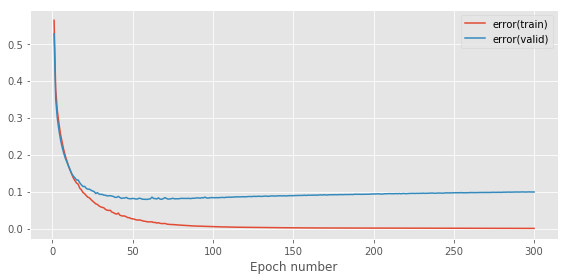

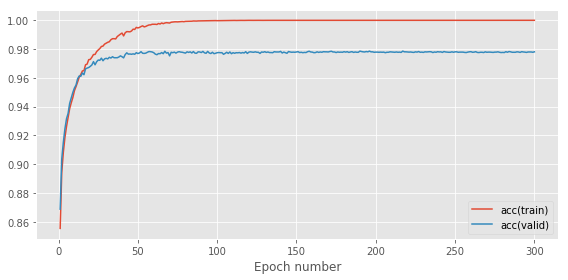

In [85]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 300
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

rng = np.random.RandomState(seed)
train_data.reset()
valid_data.reset()

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SigmoidLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
FB_SigU_MoreEpoch = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "Sigmoid")

In [86]:
fileName = "Sigmoid" + "_acc.pdf"
FB_SigU_MoreEpoch[3].tight_layout() # This minimises whitespace around the axes.
FB_SigU_MoreEpoch[3].savefig(fileName) # Save figure to current directory in PDF format

# Mixed activation function

HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 2.4s to complete
    error(train)=1.91e-01, acc(train)=9.44e-01, error(valid)=1.84e-01, acc(valid)=9.47e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 2.1s to complete
    error(train)=1.29e-01, acc(train)=9.61e-01, error(valid)=1.36e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 2.3s to complete
    error(train)=1.01e-01, acc(train)=9.70e-01, error(valid)=1.17e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.9s to complete
    error(train)=8.35e-02, acc(train)=9.75e-01, error(valid)=1.03e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.9s to complete
    error(train)=7.59e-02, acc(train)=9.77e-01, error(valid)=1.04e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.9s to complete
    error(train)=5.79e-02, acc(train)=9.83e-01, error(valid)=8.82e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 2.0s to complete
    error(train)=4.84e-02, acc(train)=9.86e-01, error(valid)=8.61e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 2.6s to complete
    error(train)=4.29e-02, acc(train)=9.87e-01, error(valid)=8.69e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 2.0s to complete
    error(train)=3.59e-02, acc(train)=9.91e-01, error(valid)=8.26e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 2.6s to complete
    error(train)=3.25e-02, acc(train)=9.91e-01, error(valid)=8.30e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.9s to complete
    error(train)=3.09e-02, acc(train)=9.91e-01, error(valid)=8.30e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.9s to complete
    error(train)=2.42e-02, acc(train)=9.94e-01, error(valid)=8.39e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.9s to complete
    error(train)=2.25e-02, acc(train)=9.94e-01, error(valid)=8.39e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.8s to complete
    error(train)=1.89e-02, acc(train)=9.95e-01, error(valid)=8.10e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.7s to complete
    error(train)=1.97e-02, acc(train)=9.95e-01, error(valid)=9.01e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.7s to complete
    error(train)=1.55e-02, acc(train)=9.96e-01, error(valid)=8.69e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 3.1s to complete
    error(train)=1.26e-02, acc(train)=9.97e-01, error(valid)=8.64e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 2.4s to complete
    error(train)=1.11e-02, acc(train)=9.98e-01, error(valid)=9.05e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 2.0s to complete
    error(train)=9.00e-03, acc(train)=9.98e-01, error(valid)=8.46e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.9s to complete
    error(train)=7.24e-03, acc(train)=9.99e-01, error(valid)=8.37e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.7s to complete
    error(train)=6.18e-03, acc(train)=9.99e-01, error(valid)=8.60e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.7s to complete
    error(train)=6.38e-03, acc(train)=9.99e-01, error(valid)=8.68e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.7s to complete
    error(train)=6.06e-03, acc(train)=9.99e-01, error(valid)=9.04e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.7s to complete
    error(train)=4.30e-03, acc(train)=1.00e+00, error(valid)=9.14e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.7s to complete
    error(train)=4.45e-03, acc(train)=1.00e+00, error(valid)=8.88e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.7s to complete
    error(train)=3.14e-03, acc(train)=1.00e+00, error(valid)=8.91e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.7s to complete
    error(train)=2.77e-03, acc(train)=1.00e+00, error(valid)=8.90e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.7s to complete
    error(train)=2.54e-03, acc(train)=1.00e+00, error(valid)=9.08e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 2.1s to complete
    error(train)=2.10e-03, acc(train)=1.00e+00, error(valid)=9.13e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.6s to complete
    error(train)=1.90e-03, acc(train)=1.00e+00, error(valid)=9.16e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.6s to complete
    error(train)=1.88e-03, acc(train)=1.00e+00, error(valid)=9.15e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.8s to complete
    error(train)=1.64e-03, acc(train)=1.00e+00, error(valid)=9.25e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.7s to complete
    error(train)=1.60e-03, acc(train)=1.00e+00, error(valid)=9.57e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.7s to complete
    error(train)=1.47e-03, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 1.9s to complete
    error(train)=1.37e-03, acc(train)=1.00e+00, error(valid)=9.64e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.8s to complete
    error(train)=1.30e-03, acc(train)=1.00e+00, error(valid)=9.66e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.8s to complete
    error(train)=1.37e-03, acc(train)=1.00e+00, error(valid)=9.65e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 2.1s to complete
    error(train)=1.18e-03, acc(train)=1.00e+00, error(valid)=9.71e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.8s to complete
    error(train)=1.06e-03, acc(train)=1.00e+00, error(valid)=9.75e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.9s to complete
    error(train)=1.04e-03, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 2.1s to complete
    error(train)=9.95e-04, acc(train)=1.00e+00, error(valid)=9.83e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.6s to complete
    error(train)=9.48e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.7s to complete
    error(train)=9.09e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 2.0s to complete
    error(train)=8.80e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.5s to complete
    error(train)=8.23e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.5s to complete
    error(train)=7.95e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.5s to complete
    error(train)=7.43e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.4s to complete
    error(train)=7.47e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.4s to complete
    error(train)=7.02e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.3s to complete
    error(train)=6.82e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.5s to complete
    error(train)=6.56e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.4s to complete
    error(train)=6.39e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.5s to complete
    error(train)=6.22e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.4s to complete
    error(train)=5.96e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.5s to complete
    error(train)=5.86e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.7s to complete
    error(train)=5.63e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.4s to complete
    error(train)=5.48e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.4s to complete
    error(train)=5.37e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 2.1s to complete
    error(train)=5.35e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 2.8s to complete
    error(train)=5.09e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.8s to complete
    error(train)=4.93e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.6s to complete
    error(train)=4.83e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.4s to complete
    error(train)=4.64e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.5s to complete
    error(train)=4.58e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.5s to complete
    error(train)=4.50e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.5s to complete
    error(train)=4.36e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 1.8s to complete
    error(train)=4.28e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.4s to complete
    error(train)=4.22e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.6s to complete
    error(train)=4.08e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.4s to complete
    error(train)=3.98e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.6s to complete
    error(train)=3.89e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.5s to complete
    error(train)=3.79e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.6s to complete
    error(train)=3.73e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.7s to complete
    error(train)=3.68e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.8s to complete
    error(train)=3.63e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.6s to complete
    error(train)=3.50e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.5s to complete
    error(train)=3.52e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.5s to complete
    error(train)=3.38e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.7s to complete
    error(train)=3.32e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.5s to complete
    error(train)=3.28e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.4s to complete
    error(train)=3.19e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.3s to complete
    error(train)=3.12e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.9s to complete
    error(train)=3.10e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.8s to complete
    error(train)=3.03e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.5s to complete
    error(train)=2.97e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.6s to complete
    error(train)=2.92e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.4s to complete
    error(train)=2.91e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.5s to complete
    error(train)=2.83e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 2.0s to complete
    error(train)=2.79e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.9s to complete
    error(train)=2.75e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.4s to complete
    error(train)=2.69e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 2.1s to complete
    error(train)=2.65e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.5s to complete
    error(train)=2.61e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.4s to complete
    error(train)=2.56e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.5s to complete
    error(train)=2.55e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.4s to complete
    error(train)=2.50e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.5s to complete
    error(train)=2.46e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.5s to complete
    error(train)=2.42e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.4s to complete
    error(train)=2.42e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.8s to complete
    error(train)=2.35e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 1.6s to complete
    error(train)=2.05e-01, acc(train)=9.37e-01, error(valid)=1.96e-01, acc(valid)=9.42e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 1.8s to complete
    error(train)=1.19e-01, acc(train)=9.65e-01, error(valid)=1.31e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 3.1s to complete
    error(train)=9.55e-02, acc(train)=9.70e-01, error(valid)=1.15e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 13.4s to complete
    error(train)=6.89e-02, acc(train)=9.79e-01, error(valid)=9.97e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 2.2s to complete
    error(train)=5.71e-02, acc(train)=9.82e-01, error(valid)=9.17e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.5s to complete
    error(train)=4.90e-02, acc(train)=9.85e-01, error(valid)=9.44e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.4s to complete
    error(train)=4.00e-02, acc(train)=9.88e-01, error(valid)=8.86e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.4s to complete
    error(train)=3.72e-02, acc(train)=9.89e-01, error(valid)=9.69e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.6s to complete
    error(train)=2.50e-02, acc(train)=9.93e-01, error(valid)=8.47e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.4s to complete
    error(train)=1.96e-02, acc(train)=9.95e-01, error(valid)=8.70e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.4s to complete
    error(train)=1.82e-02, acc(train)=9.95e-01, error(valid)=8.46e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.5s to complete
    error(train)=1.57e-02, acc(train)=9.96e-01, error(valid)=9.04e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.4s to complete
    error(train)=1.82e-02, acc(train)=9.94e-01, error(valid)=9.11e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.4s to complete
    error(train)=9.42e-03, acc(train)=9.98e-01, error(valid)=8.49e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.4s to complete
    error(train)=9.66e-03, acc(train)=9.98e-01, error(valid)=9.27e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.4s to complete
    error(train)=7.76e-03, acc(train)=9.99e-01, error(valid)=9.26e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.4s to complete
    error(train)=6.63e-03, acc(train)=9.99e-01, error(valid)=9.45e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.4s to complete
    error(train)=3.48e-03, acc(train)=1.00e+00, error(valid)=9.06e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.4s to complete
    error(train)=3.01e-03, acc(train)=1.00e+00, error(valid)=8.98e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.5s to complete
    error(train)=2.32e-03, acc(train)=1.00e+00, error(valid)=9.15e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.3s to complete
    error(train)=1.79e-03, acc(train)=1.00e+00, error(valid)=9.27e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.4s to complete
    error(train)=1.80e-03, acc(train)=1.00e+00, error(valid)=9.45e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.4s to complete
    error(train)=1.41e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.4s to complete
    error(train)=1.35e-03, acc(train)=1.00e+00, error(valid)=9.52e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.4s to complete
    error(train)=1.12e-03, acc(train)=1.00e+00, error(valid)=9.60e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.4s to complete
    error(train)=1.17e-03, acc(train)=1.00e+00, error(valid)=9.69e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.4s to complete
    error(train)=9.51e-04, acc(train)=1.00e+00, error(valid)=9.84e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.4s to complete
    error(train)=9.66e-04, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.4s to complete
    error(train)=8.61e-04, acc(train)=1.00e+00, error(valid)=9.97e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.4s to complete
    error(train)=8.03e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.6s to complete
    error(train)=7.41e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.4s to complete
    error(train)=6.83e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.4s to complete
    error(train)=6.70e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.7s to complete
    error(train)=6.14e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 2.0s to complete
    error(train)=5.84e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.8s to complete
    error(train)=5.89e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.7s to complete
    error(train)=5.29e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.7s to complete
    error(train)=5.01e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.7s to complete
    error(train)=4.91e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.8s to complete
    error(train)=4.65e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.8s to complete
    error(train)=4.48e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.7s to complete
    error(train)=4.33e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 2.1s to complete
    error(train)=4.19e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.8s to complete
    error(train)=4.05e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 2.0s to complete
    error(train)=3.85e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 2.4s to complete
    error(train)=3.73e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 2.0s to complete
    error(train)=3.63e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.9s to complete
    error(train)=3.50e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.9s to complete
    error(train)=3.38e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 2.8s to complete
    error(train)=3.28e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 3.1s to complete
    error(train)=3.24e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 2.4s to complete
    error(train)=3.11e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 2.4s to complete
    error(train)=3.02e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 2.7s to complete
    error(train)=2.95e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 2.1s to complete
    error(train)=2.87e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.9s to complete
    error(train)=2.85e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.8s to complete
    error(train)=2.72e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.9s to complete
    error(train)=2.67e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.7s to complete
    error(train)=2.59e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.7s to complete
    error(train)=2.53e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.7s to complete
    error(train)=2.48e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.7s to complete
    error(train)=2.43e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 2.0s to complete
    error(train)=2.36e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.9s to complete
    error(train)=2.36e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.8s to complete
    error(train)=2.27e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 2.1s to complete
    error(train)=2.22e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 2.0s to complete
    error(train)=2.17e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.7s to complete
    error(train)=2.12e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.7s to complete
    error(train)=2.09e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.7s to complete
    error(train)=2.04e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 2.0s to complete
    error(train)=2.01e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 2.1s to complete
    error(train)=1.97e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 2.1s to complete
    error(train)=1.94e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.8s to complete
    error(train)=1.89e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.8s to complete
    error(train)=1.86e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.8s to complete
    error(train)=1.82e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.7s to complete
    error(train)=1.82e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.8s to complete
    error(train)=1.77e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.7s to complete
    error(train)=1.73e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.9s to complete
    error(train)=1.71e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.8s to complete
    error(train)=1.68e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.9s to complete
    error(train)=1.65e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 2.1s to complete
    error(train)=1.62e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 2.0s to complete
    error(train)=1.60e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 2.5s to complete
    error(train)=1.57e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.8s to complete
    error(train)=1.55e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.9s to complete
    error(train)=1.52e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.9s to complete
    error(train)=1.50e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.8s to complete
    error(train)=1.47e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.8s to complete
    error(train)=1.46e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 2.0s to complete
    error(train)=1.43e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.8s to complete
    error(train)=1.41e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 2.0s to complete
    error(train)=1.39e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 2.0s to complete
    error(train)=1.37e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.9s to complete
    error(train)=1.35e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.8s to complete
    error(train)=1.33e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.9s to complete
    error(train)=1.32e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.8s to complete
    error(train)=1.30e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.9s to complete
    error(train)=1.28e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 2.1s to complete
    error(train)=1.26e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 1.9s to complete
    error(train)=1.65e-01, acc(train)=9.52e-01, error(valid)=1.69e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 2.0s to complete
    error(train)=1.01e-01, acc(train)=9.70e-01, error(valid)=1.19e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.9s to complete
    error(train)=7.88e-02, acc(train)=9.76e-01, error(valid)=1.02e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.8s to complete
    error(train)=6.37e-02, acc(train)=9.80e-01, error(valid)=9.79e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 2.1s to complete
    error(train)=5.81e-02, acc(train)=9.82e-01, error(valid)=1.03e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 2.5s to complete
    error(train)=3.68e-02, acc(train)=9.89e-01, error(valid)=8.50e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.7s to complete
    error(train)=3.33e-02, acc(train)=9.90e-01, error(valid)=8.32e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.8s to complete
    error(train)=2.47e-02, acc(train)=9.93e-01, error(valid)=7.79e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 2.1s to complete
    error(train)=2.35e-02, acc(train)=9.94e-01, error(valid)=8.12e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 2.0s to complete
    error(train)=1.59e-02, acc(train)=9.96e-01, error(valid)=8.19e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.9s to complete
    error(train)=1.43e-02, acc(train)=9.96e-01, error(valid)=7.76e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.9s to complete
    error(train)=1.10e-02, acc(train)=9.98e-01, error(valid)=8.10e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.8s to complete
    error(train)=1.07e-02, acc(train)=9.97e-01, error(valid)=8.36e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.8s to complete
    error(train)=7.24e-03, acc(train)=9.99e-01, error(valid)=8.23e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.8s to complete
    error(train)=5.75e-03, acc(train)=9.99e-01, error(valid)=8.45e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.9s to complete
    error(train)=4.98e-03, acc(train)=9.99e-01, error(valid)=8.65e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.9s to complete
    error(train)=3.61e-03, acc(train)=1.00e+00, error(valid)=8.56e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 2.0s to complete
    error(train)=2.31e-03, acc(train)=1.00e+00, error(valid)=8.48e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.8s to complete
    error(train)=2.59e-03, acc(train)=1.00e+00, error(valid)=8.70e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.8s to complete
    error(train)=1.85e-03, acc(train)=1.00e+00, error(valid)=8.95e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.7s to complete
    error(train)=1.47e-03, acc(train)=1.00e+00, error(valid)=8.77e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.8s to complete
    error(train)=1.29e-03, acc(train)=1.00e+00, error(valid)=8.95e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.8s to complete
    error(train)=1.14e-03, acc(train)=1.00e+00, error(valid)=8.91e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 2.1s to complete
    error(train)=1.04e-03, acc(train)=1.00e+00, error(valid)=8.99e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 2.1s to complete
    error(train)=1.00e-03, acc(train)=1.00e+00, error(valid)=9.18e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 2.0s to complete
    error(train)=9.00e-04, acc(train)=1.00e+00, error(valid)=9.13e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.8s to complete
    error(train)=8.43e-04, acc(train)=1.00e+00, error(valid)=9.18e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.7s to complete
    error(train)=8.07e-04, acc(train)=1.00e+00, error(valid)=9.32e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.8s to complete
    error(train)=7.33e-04, acc(train)=1.00e+00, error(valid)=9.27e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.8s to complete
    error(train)=6.91e-04, acc(train)=1.00e+00, error(valid)=9.35e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.8s to complete
    error(train)=6.47e-04, acc(train)=1.00e+00, error(valid)=9.36e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.9s to complete
    error(train)=6.23e-04, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.9s to complete
    error(train)=5.83e-04, acc(train)=1.00e+00, error(valid)=9.55e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.8s to complete
    error(train)=5.71e-04, acc(train)=1.00e+00, error(valid)=9.56e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 2.5s to complete
    error(train)=5.43e-04, acc(train)=1.00e+00, error(valid)=9.56e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.9s to complete
    error(train)=5.13e-04, acc(train)=1.00e+00, error(valid)=9.58e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 2.0s to complete
    error(train)=4.89e-04, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.8s to complete
    error(train)=4.66e-04, acc(train)=1.00e+00, error(valid)=9.72e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 2.2s to complete
    error(train)=4.61e-04, acc(train)=1.00e+00, error(valid)=9.76e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.6s to complete
    error(train)=4.35e-04, acc(train)=1.00e+00, error(valid)=9.78e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.6s to complete
    error(train)=4.19e-04, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.5s to complete
    error(train)=4.05e-04, acc(train)=1.00e+00, error(valid)=9.89e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.5s to complete
    error(train)=3.93e-04, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.5s to complete
    error(train)=3.82e-04, acc(train)=1.00e+00, error(valid)=9.95e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.5s to complete
    error(train)=3.69e-04, acc(train)=1.00e+00, error(valid)=9.92e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.5s to complete
    error(train)=3.54e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.6s to complete
    error(train)=3.44e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.5s to complete
    error(train)=3.35e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.4s to complete
    error(train)=3.29e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.5s to complete
    error(train)=3.15e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.5s to complete
    error(train)=3.11e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.4s to complete
    error(train)=2.97e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.4s to complete
    error(train)=2.90e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.3s to complete
    error(train)=2.84e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.4s to complete
    error(train)=2.77e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.4s to complete
    error(train)=2.70e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.4s to complete
    error(train)=2.63e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.4s to complete
    error(train)=2.60e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.4s to complete
    error(train)=2.52e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.4s to complete
    error(train)=2.45e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.4s to complete
    error(train)=2.40e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.5s to complete
    error(train)=2.34e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.5s to complete
    error(train)=2.31e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.4s to complete
    error(train)=2.26e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.4s to complete
    error(train)=2.21e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.4s to complete
    error(train)=2.16e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 1.4s to complete
    error(train)=2.12e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.5s to complete
    error(train)=2.08e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 2.0s to complete
    error(train)=2.03e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.9s to complete
    error(train)=2.00e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.9s to complete
    error(train)=1.96e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.7s to complete
    error(train)=1.92e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.6s to complete
    error(train)=1.89e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.3s to complete
    error(train)=1.86e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.3s to complete
    error(train)=1.82e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.4s to complete
    error(train)=1.79e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.4s to complete
    error(train)=1.76e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.4s to complete
    error(train)=1.73e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.4s to complete
    error(train)=1.70e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.4s to complete
    error(train)=1.68e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.4s to complete
    error(train)=1.64e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.4s to complete
    error(train)=1.62e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.4s to complete
    error(train)=1.60e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.4s to complete
    error(train)=1.57e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.4s to complete
    error(train)=1.55e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.4s to complete
    error(train)=1.52e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.4s to complete
    error(train)=1.50e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.4s to complete
    error(train)=1.48e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.4s to complete
    error(train)=1.46e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.4s to complete
    error(train)=1.43e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.4s to complete
    error(train)=1.43e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.6s to complete
    error(train)=1.40e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.4s to complete
    error(train)=1.37e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.5s to complete
    error(train)=1.36e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.4s to complete
    error(train)=1.34e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.4s to complete
    error(train)=1.32e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.4s to complete
    error(train)=1.30e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.4s to complete
    error(train)=1.29e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.6s to complete
    error(train)=1.27e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.6s to complete
    error(train)=1.25e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 2.7s to complete
    error(train)=2.15e-01, acc(train)=9.37e-01, error(valid)=2.07e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 2.2s to complete
    error(train)=1.51e-01, acc(train)=9.55e-01, error(valid)=1.55e-01, acc(valid)=9.57e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.9s to complete
    error(train)=1.11e-01, acc(train)=9.66e-01, error(valid)=1.25e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.7s to complete
    error(train)=8.98e-02, acc(train)=9.73e-01, error(valid)=1.12e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.6s to complete
    error(train)=7.58e-02, acc(train)=9.77e-01, error(valid)=1.08e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.7s to complete
    error(train)=6.44e-02, acc(train)=9.80e-01, error(valid)=1.03e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.6s to complete
    error(train)=5.51e-02, acc(train)=9.83e-01, error(valid)=9.11e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.5s to complete
    error(train)=4.64e-02, acc(train)=9.86e-01, error(valid)=8.91e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.5s to complete
    error(train)=4.74e-02, acc(train)=9.85e-01, error(valid)=9.50e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.5s to complete
    error(train)=3.86e-02, acc(train)=9.88e-01, error(valid)=9.51e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.5s to complete
    error(train)=3.04e-02, acc(train)=9.91e-01, error(valid)=8.88e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.5s to complete
    error(train)=2.44e-02, acc(train)=9.93e-01, error(valid)=8.61e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.5s to complete
    error(train)=2.38e-02, acc(train)=9.93e-01, error(valid)=9.35e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.5s to complete
    error(train)=2.33e-02, acc(train)=9.93e-01, error(valid)=9.72e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.6s to complete
    error(train)=1.57e-02, acc(train)=9.96e-01, error(valid)=8.80e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 2.2s to complete
    error(train)=1.36e-02, acc(train)=9.97e-01, error(valid)=8.96e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 2.7s to complete
    error(train)=1.19e-02, acc(train)=9.97e-01, error(valid)=9.40e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 2.2s to complete
    error(train)=1.30e-02, acc(train)=9.97e-01, error(valid)=9.92e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.5s to complete
    error(train)=1.09e-02, acc(train)=9.97e-01, error(valid)=9.71e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.5s to complete
    error(train)=7.54e-03, acc(train)=9.99e-01, error(valid)=9.62e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.5s to complete
    error(train)=6.63e-03, acc(train)=9.99e-01, error(valid)=9.65e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.6s to complete
    error(train)=4.58e-03, acc(train)=9.99e-01, error(valid)=9.43e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.5s to complete
    error(train)=3.73e-03, acc(train)=1.00e+00, error(valid)=9.29e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.5s to complete
    error(train)=3.67e-03, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.5s to complete
    error(train)=2.78e-03, acc(train)=1.00e+00, error(valid)=9.85e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.6s to complete
    error(train)=2.42e-03, acc(train)=1.00e+00, error(valid)=9.55e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.7s to complete
    error(train)=2.33e-03, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.5s to complete
    error(train)=1.85e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.6s to complete
    error(train)=1.71e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.7s to complete
    error(train)=1.67e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.5s to complete
    error(train)=1.46e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.5s to complete
    error(train)=1.38e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.5s to complete
    error(train)=1.19e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.5s to complete
    error(train)=1.17e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 1.5s to complete
    error(train)=1.13e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.5s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.6s to complete
    error(train)=1.04e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.5s to complete
    error(train)=9.16e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.4s to complete
    error(train)=8.64e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.5s to complete
    error(train)=8.22e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.5s to complete
    error(train)=7.81e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.6s to complete
    error(train)=7.48e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.6s to complete
    error(train)=7.03e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.6s to complete
    error(train)=6.94e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.5s to complete
    error(train)=6.49e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.7s to complete
    error(train)=6.50e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.7s to complete
    error(train)=6.36e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.5s to complete
    error(train)=5.88e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.7s to complete
    error(train)=5.66e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.5s to complete
    error(train)=5.43e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.6s to complete
    error(train)=5.30e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.5s to complete
    error(train)=5.01e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.5s to complete
    error(train)=4.89e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.6s to complete
    error(train)=4.68e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.5s to complete
    error(train)=4.54e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.5s to complete
    error(train)=4.45e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.5s to complete
    error(train)=4.43e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.5s to complete
    error(train)=4.24e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.5s to complete
    error(train)=4.15e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.8s to complete
    error(train)=3.99e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 2.2s to complete
    error(train)=3.97e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 2.5s to complete
    error(train)=3.84e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.6s to complete
    error(train)=3.76e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.4s to complete
    error(train)=3.59e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.4s to complete
    error(train)=3.54e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.5s to complete
    error(train)=3.46e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 1.8s to complete
    error(train)=3.37e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.5s to complete
    error(train)=3.31e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.6s to complete
    error(train)=3.23e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.5s to complete
    error(train)=3.16e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.8s to complete
    error(train)=3.09e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.7s to complete
    error(train)=3.02e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.7s to complete
    error(train)=2.98e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.5s to complete
    error(train)=2.89e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.5s to complete
    error(train)=2.88e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.5s to complete
    error(train)=2.82e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.5s to complete
    error(train)=2.77e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.5s to complete
    error(train)=2.68e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.5s to complete
    error(train)=2.63e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.7s to complete
    error(train)=2.57e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.5s to complete
    error(train)=2.55e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.4s to complete
    error(train)=2.49e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.6s to complete
    error(train)=2.44e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.5s to complete
    error(train)=2.41e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.5s to complete
    error(train)=2.36e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.8s to complete
    error(train)=2.33e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.5s to complete
    error(train)=2.29e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.5s to complete
    error(train)=2.25e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.5s to complete
    error(train)=2.22e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.5s to complete
    error(train)=2.19e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.5s to complete
    error(train)=2.15e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.5s to complete
    error(train)=2.10e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.6s to complete
    error(train)=2.09e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.6s to complete
    error(train)=2.04e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.4s to complete
    error(train)=2.01e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.5s to complete
    error(train)=2.03e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.5s to complete
    error(train)=1.96e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.6s to complete
    error(train)=1.96e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.5s to complete
    error(train)=1.90e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.5s to complete
    error(train)=1.87e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 1.4s to complete
    error(train)=2.02e-01, acc(train)=9.40e-01, error(valid)=2.00e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 1.4s to complete
    error(train)=1.20e-01, acc(train)=9.64e-01, error(valid)=1.31e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.4s to complete
    error(train)=9.08e-02, acc(train)=9.73e-01, error(valid)=1.09e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.5s to complete
    error(train)=7.20e-02, acc(train)=9.78e-01, error(valid)=1.00e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.8s to complete
    error(train)=6.04e-02, acc(train)=9.81e-01, error(valid)=9.77e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.8s to complete
    error(train)=5.03e-02, acc(train)=9.85e-01, error(valid)=9.13e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.9s to complete
    error(train)=4.63e-02, acc(train)=9.87e-01, error(valid)=8.80e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 2.6s to complete
    error(train)=3.36e-02, acc(train)=9.91e-01, error(valid)=7.75e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.9s to complete
    error(train)=3.17e-02, acc(train)=9.91e-01, error(valid)=8.06e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.7s to complete
    error(train)=2.96e-02, acc(train)=9.91e-01, error(valid)=8.46e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.5s to complete
    error(train)=2.42e-02, acc(train)=9.93e-01, error(valid)=8.06e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.4s to complete
    error(train)=1.92e-02, acc(train)=9.95e-01, error(valid)=7.74e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.5s to complete
    error(train)=1.53e-02, acc(train)=9.96e-01, error(valid)=7.88e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.4s to complete
    error(train)=1.60e-02, acc(train)=9.96e-01, error(valid)=8.17e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.4s to complete
    error(train)=1.19e-02, acc(train)=9.98e-01, error(valid)=8.09e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.6s to complete
    error(train)=9.64e-03, acc(train)=9.98e-01, error(valid)=7.68e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.9s to complete
    error(train)=9.79e-03, acc(train)=9.98e-01, error(valid)=8.58e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.5s to complete
    error(train)=7.52e-03, acc(train)=9.99e-01, error(valid)=8.41e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.5s to complete
    error(train)=5.34e-03, acc(train)=9.99e-01, error(valid)=8.06e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.5s to complete
    error(train)=5.04e-03, acc(train)=1.00e+00, error(valid)=8.38e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.4s to complete
    error(train)=4.26e-03, acc(train)=1.00e+00, error(valid)=8.24e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.4s to complete
    error(train)=7.94e-03, acc(train)=9.98e-01, error(valid)=9.01e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.4s to complete
    error(train)=3.82e-03, acc(train)=1.00e+00, error(valid)=8.83e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.4s to complete
    error(train)=2.77e-03, acc(train)=1.00e+00, error(valid)=8.70e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.4s to complete
    error(train)=2.44e-03, acc(train)=1.00e+00, error(valid)=8.71e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.4s to complete
    error(train)=3.04e-03, acc(train)=1.00e+00, error(valid)=9.03e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.4s to complete
    error(train)=2.15e-03, acc(train)=1.00e+00, error(valid)=8.84e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.4s to complete
    error(train)=1.92e-03, acc(train)=1.00e+00, error(valid)=8.63e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.4s to complete
    error(train)=1.70e-03, acc(train)=1.00e+00, error(valid)=8.97e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.4s to complete
    error(train)=1.64e-03, acc(train)=1.00e+00, error(valid)=9.02e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.8s to complete
    error(train)=1.46e-03, acc(train)=1.00e+00, error(valid)=9.01e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.8s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=9.16e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 2.1s to complete
    error(train)=1.31e-03, acc(train)=1.00e+00, error(valid)=9.15e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.4s to complete
    error(train)=1.20e-03, acc(train)=1.00e+00, error(valid)=9.22e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 1.4s to complete
    error(train)=1.19e-03, acc(train)=1.00e+00, error(valid)=9.30e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.4s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=9.31e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.4s to complete
    error(train)=1.06e-03, acc(train)=1.00e+00, error(valid)=9.32e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.4s to complete
    error(train)=9.98e-04, acc(train)=1.00e+00, error(valid)=9.32e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.5s to complete
    error(train)=9.62e-04, acc(train)=1.00e+00, error(valid)=9.54e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.4s to complete
    error(train)=9.06e-04, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.5s to complete
    error(train)=8.56e-04, acc(train)=1.00e+00, error(valid)=9.54e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.4s to complete
    error(train)=8.30e-04, acc(train)=1.00e+00, error(valid)=9.53e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.4s to complete
    error(train)=8.10e-04, acc(train)=1.00e+00, error(valid)=9.68e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.5s to complete
    error(train)=7.69e-04, acc(train)=1.00e+00, error(valid)=9.67e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.5s to complete
    error(train)=7.49e-04, acc(train)=1.00e+00, error(valid)=9.61e-02, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.5s to complete
    error(train)=7.15e-04, acc(train)=1.00e+00, error(valid)=9.72e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.4s to complete
    error(train)=6.84e-04, acc(train)=1.00e+00, error(valid)=9.83e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.4s to complete
    error(train)=6.68e-04, acc(train)=1.00e+00, error(valid)=9.80e-02, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.5s to complete
    error(train)=6.59e-04, acc(train)=1.00e+00, error(valid)=9.85e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.5s to complete
    error(train)=6.35e-04, acc(train)=1.00e+00, error(valid)=9.89e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 1.4s to complete
    error(train)=6.05e-04, acc(train)=1.00e+00, error(valid)=9.87e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 1.4s to complete
    error(train)=5.89e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.4s to complete
    error(train)=5.79e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.9s to complete
    error(train)=5.61e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.9s to complete
    error(train)=5.45e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.6s to complete
    error(train)=5.24e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.7s to complete
    error(train)=5.11e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.4s to complete
    error(train)=4.95e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.4s to complete
    error(train)=4.84e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.4s to complete
    error(train)=4.75e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.4s to complete
    error(train)=4.61e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.4s to complete
    error(train)=4.52e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.4s to complete
    error(train)=4.44e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.4s to complete
    error(train)=4.37e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.5s to complete
    error(train)=4.18e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.4s to complete
    error(train)=4.10e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 1.4s to complete
    error(train)=4.01e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.4s to complete
    error(train)=3.98e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.4s to complete
    error(train)=3.84e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.4s to complete
    error(train)=3.79e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.5s to complete
    error(train)=3.67e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.5s to complete
    error(train)=3.62e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.4s to complete
    error(train)=3.56e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.4s to complete
    error(train)=3.54e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.4s to complete
    error(train)=3.41e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.4s to complete
    error(train)=3.35e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.4s to complete
    error(train)=3.29e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.4s to complete
    error(train)=3.23e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.4s to complete
    error(train)=3.18e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.4s to complete
    error(train)=3.12e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.4s to complete
    error(train)=3.08e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.4s to complete
    error(train)=3.04e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.4s to complete
    error(train)=2.96e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.4s to complete
    error(train)=2.91e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.8s to complete
    error(train)=2.86e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.4s to complete
    error(train)=2.81e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.4s to complete
    error(train)=2.77e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.3s to complete
    error(train)=2.72e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.4s to complete
    error(train)=2.69e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.4s to complete
    error(train)=2.65e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.4s to complete
    error(train)=2.62e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.4s to complete
    error(train)=2.56e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.5s to complete
    error(train)=2.57e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 1.5s to complete
    error(train)=2.50e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 1.4s to complete
    error(train)=2.46e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 1.4s to complete
    error(train)=2.41e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.4s to complete
    error(train)=2.39e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.5s to complete
    error(train)=2.36e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 1.4s to complete
    error(train)=2.33e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 1.4s to complete
    error(train)=2.29e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 1.4s to complete
    error(train)=2.28e-01, acc(train)=9.28e-01, error(valid)=2.19e-01, acc(valid)=9.32e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 1.4s to complete
    error(train)=1.32e-01, acc(train)=9.61e-01, error(valid)=1.35e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.8s to complete
    error(train)=1.02e-01, acc(train)=9.71e-01, error(valid)=1.14e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 2.0s to complete
    error(train)=9.66e-02, acc(train)=9.70e-01, error(valid)=1.18e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 1.7s to complete
    error(train)=7.30e-02, acc(train)=9.79e-01, error(valid)=1.04e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.5s to complete
    error(train)=5.82e-02, acc(train)=9.83e-01, error(valid)=9.25e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 1.5s to complete
    error(train)=5.23e-02, acc(train)=9.85e-01, error(valid)=8.89e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 1.5s to complete
    error(train)=4.13e-02, acc(train)=9.88e-01, error(valid)=8.46e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.4s to complete
    error(train)=3.82e-02, acc(train)=9.88e-01, error(valid)=8.82e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 1.5s to complete
    error(train)=3.48e-02, acc(train)=9.90e-01, error(valid)=8.28e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 1.5s to complete
    error(train)=3.61e-02, acc(train)=9.88e-01, error(valid)=9.13e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 1.5s to complete
    error(train)=2.77e-02, acc(train)=9.92e-01, error(valid)=8.52e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 1.5s to complete
    error(train)=2.09e-02, acc(train)=9.95e-01, error(valid)=8.00e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 1.4s to complete
    error(train)=1.91e-02, acc(train)=9.95e-01, error(valid)=7.96e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 1.5s to complete
    error(train)=1.72e-02, acc(train)=9.95e-01, error(valid)=8.01e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 1.5s to complete
    error(train)=1.39e-02, acc(train)=9.97e-01, error(valid)=8.41e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.5s to complete
    error(train)=1.33e-02, acc(train)=9.97e-01, error(valid)=8.56e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 1.4s to complete
    error(train)=1.20e-02, acc(train)=9.97e-01, error(valid)=9.14e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 1.4s to complete
    error(train)=9.80e-03, acc(train)=9.98e-01, error(valid)=8.27e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 1.4s to complete
    error(train)=7.26e-03, acc(train)=9.99e-01, error(valid)=8.47e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 1.5s to complete
    error(train)=6.46e-03, acc(train)=9.99e-01, error(valid)=8.78e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.5s to complete
    error(train)=6.77e-03, acc(train)=9.99e-01, error(valid)=9.02e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.4s to complete
    error(train)=5.82e-03, acc(train)=9.99e-01, error(valid)=9.07e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.5s to complete
    error(train)=3.92e-03, acc(train)=1.00e+00, error(valid)=8.93e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.5s to complete
    error(train)=3.17e-03, acc(train)=1.00e+00, error(valid)=8.99e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.5s to complete
    error(train)=2.85e-03, acc(train)=1.00e+00, error(valid)=9.26e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 1.4s to complete
    error(train)=2.58e-03, acc(train)=1.00e+00, error(valid)=9.33e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 1.4s to complete
    error(train)=2.43e-03, acc(train)=1.00e+00, error(valid)=9.46e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 1.4s to complete
    error(train)=2.98e-03, acc(train)=1.00e+00, error(valid)=9.56e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 1.5s to complete
    error(train)=1.90e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.7s to complete
    error(train)=1.79e-03, acc(train)=1.00e+00, error(valid)=9.67e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.4s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.5s to complete
    error(train)=1.45e-03, acc(train)=1.00e+00, error(valid)=9.82e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 1.5s to complete
    error(train)=1.34e-03, acc(train)=1.00e+00, error(valid)=9.89e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 1.5s to complete
    error(train)=1.28e-03, acc(train)=1.00e+00, error(valid)=9.99e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 1.4s to complete
    error(train)=1.30e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 1.5s to complete
    error(train)=1.31e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 1.5s to complete
    error(train)=1.08e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 1.5s to complete
    error(train)=1.04e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.5s to complete
    error(train)=9.49e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.5s to complete
    error(train)=9.04e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.4s to complete
    error(train)=9.13e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 1.4s to complete
    error(train)=8.65e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 1.5s to complete
    error(train)=8.34e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.5s to complete
    error(train)=7.66e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 1.6s to complete
    error(train)=7.46e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 1.5s to complete
    error(train)=7.08e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 1.5s to complete
    error(train)=7.07e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 1.5s to complete
    error(train)=6.61e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 1.5s to complete
    error(train)=6.36e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 2.4s to complete
    error(train)=6.20e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 2.0s to complete
    error(train)=6.02e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 1.6s to complete
    error(train)=5.74e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 1.5s to complete
    error(train)=5.56e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 1.5s to complete
    error(train)=5.48e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 1.5s to complete
    error(train)=5.26e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 1.4s to complete
    error(train)=5.21e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 1.6s to complete
    error(train)=5.12e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 1.5s to complete
    error(train)=4.94e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 1.5s to complete
    error(train)=4.76e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 1.5s to complete
    error(train)=4.64e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 1.5s to complete
    error(train)=4.49e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 1.8s to complete
    error(train)=4.39e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 1.5s to complete
    error(train)=4.26e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 1.6s to complete
    error(train)=4.16e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.4s to complete
    error(train)=4.08e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 1.4s to complete
    error(train)=3.98e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.5s to complete
    error(train)=3.88e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 1.6s to complete
    error(train)=3.77e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.5s to complete
    error(train)=3.76e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 1.5s to complete
    error(train)=3.63e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.5s to complete
    error(train)=3.64e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.5s to complete
    error(train)=3.49e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 1.5s to complete
    error(train)=3.53e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 1.8s to complete
    error(train)=3.33e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 1.5s to complete
    error(train)=3.33e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 1.6s to complete
    error(train)=3.21e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 1.5s to complete
    error(train)=3.17e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 1.4s to complete
    error(train)=3.12e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 1.5s to complete
    error(train)=3.05e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.4s to complete
    error(train)=3.03e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 1.5s to complete
    error(train)=2.94e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 1.5s to complete
    error(train)=2.92e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.5s to complete
    error(train)=2.84e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.5s to complete
    error(train)=2.79e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.6s to complete
    error(train)=2.74e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 1.5s to complete
    error(train)=2.68e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 1.5s to complete
    error(train)=2.69e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 1.5s to complete
    error(train)=2.60e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 1.5s to complete
    error(train)=2.56e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 1.6s to complete
    error(train)=2.52e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 1.4s to complete
    error(train)=2.48e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 1.5s to complete
    error(train)=2.45e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 2.0s to complete
    error(train)=2.41e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 3.3s to complete
    error(train)=2.37e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 2.0s to complete
    error(train)=2.35e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 1.8s to complete
    error(train)=2.31e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 2.0s to complete
    error(train)=2.28e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 2.0s to complete
    error(train)=2.23e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 2.0s to complete
    error(train)=2.21e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


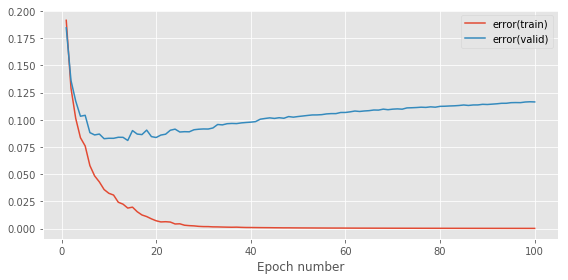

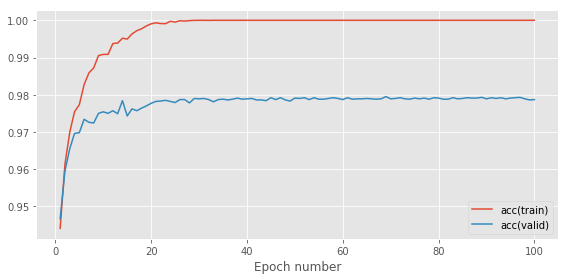

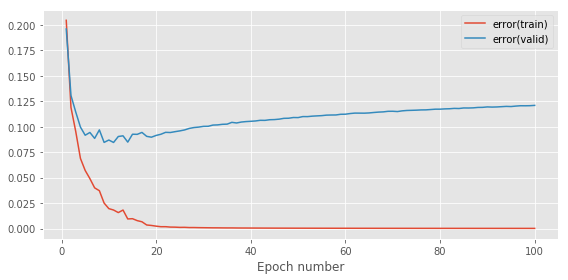

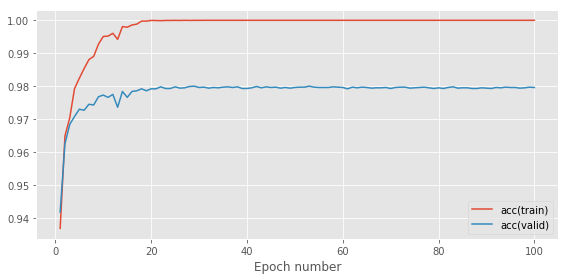

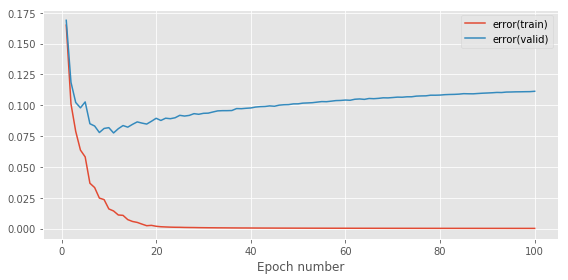

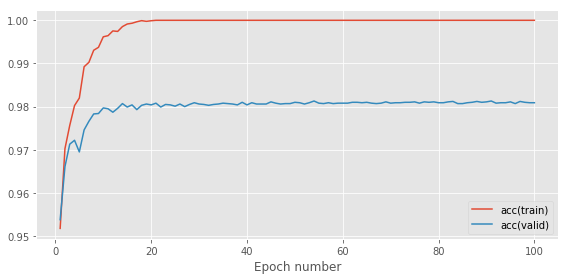

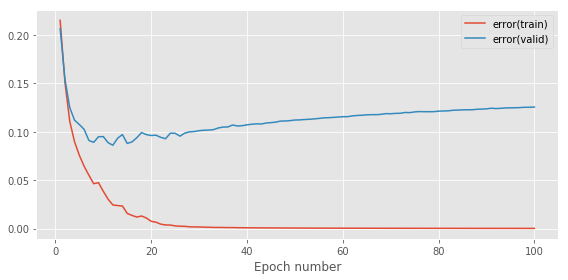

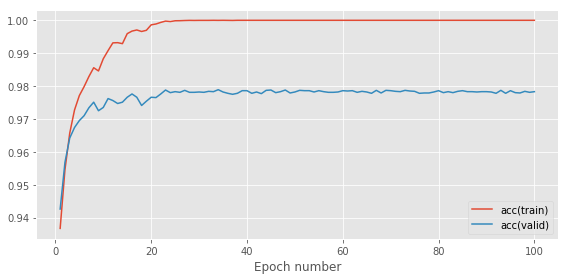

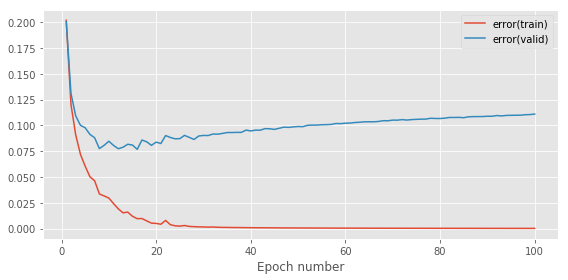

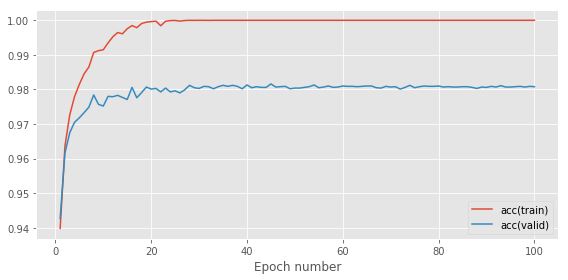

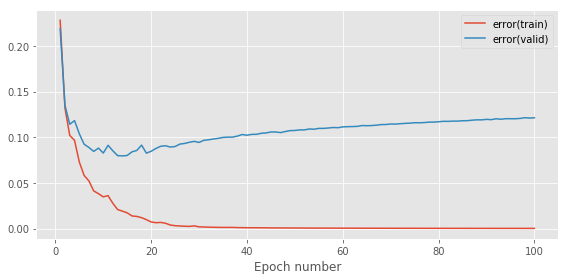

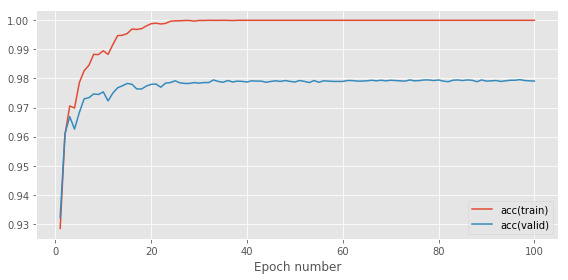

In [54]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100
biases_init = ConstantInit(0.)


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)


# ELU + LReLU
rng = np.random.RandomState(seed)
weights_init = GlorotUniformInit(rng=rng)
train_data.reset()
valid_data.reset()
model = MultipleLayerModel([    
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
#Remember to use notebook=False when you write a script to be run in a terminal
FB_ELU_LReLU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "ELU_LReLU")

# LReLU + ELU 
rng = np.random.RandomState(seed)
weights_init = GlorotUniformInit(rng=rng)
train_data.reset()
valid_data.reset()

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
#Remember to use notebook=False when you write a script to be run in a terminal
FB_LReLU_ELU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "LReLU_ELU")

# LReLU + SELU 
rng = np.random.RandomState(seed)
weights_init = GlorotUniformInit(rng=rng)
train_data.reset()
valid_data.reset()
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
#Remember to use notebook=False when you write a script to be run in a terminal
FB_LReLU_SELU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "LReLU_SELU")



# ELU + SELU 
rng = np.random.RandomState(seed)
weights_init = GlorotUniformInit(rng=rng)
train_data.reset()
valid_data.reset()
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
#Remember to use notebook=False when you write a script to be run in a terminal
FB_ELU_SELU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "ELU_SELU")

# SELU + LReLU 
rng = np.random.RandomState(seed)
weights_init = GlorotUniformInit(rng=rng)
train_data.reset()
valid_data.reset()
model = MultipleLayerModel([    
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    LeakyReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
#Remember to use notebook=False when you write a script to be run in a terminal
FB_SELU_LReLU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "SELU_LReLU")

# SELU + ELU 
rng = np.random.RandomState(seed)
weights_init = GlorotUniformInit(rng=rng)
train_data.reset()
valid_data.reset()

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    SELULayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ELULayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])
#Remember to use notebook=False when you write a script to be run in a terminal
FB_SELU_ELU = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "SELU_ELU")

# Training 2~8 hidden layers using SELU acitivation functinos

HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 2.5s to complete
    error(train)=2.74e-01, acc(train)=9.19e-01, error(valid)=2.62e-01, acc(valid)=9.22e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 2.0s to complete
    error(train)=2.05e-01, acc(train)=9.40e-01, error(valid)=2.00e-01, acc(valid)=9.44e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 1.9s to complete
    error(train)=1.56e-01, acc(train)=9.54e-01, error(valid)=1.59e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 1.9s to complete
    error(train)=1.28e-01, acc(train)=9.62e-01, error(valid)=1.37e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 2.1s to complete
    error(train)=1.11e-01, acc(train)=9.68e-01, error(valid)=1.23e-01, acc(valid)=9.64e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 1.9s to complete
    error(train)=9.61e-02, acc(train)=9.73e-01, error(valid)=1.16e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 2.1s to complete
    error(train)=8.32e-02, acc(train)=9.75e-01, error(valid)=1.09e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 2.1s to complete
    error(train)=7.37e-02, acc(train)=9.79e-01, error(valid)=1.03e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 1.9s to complete
    error(train)=6.69e-02, acc(train)=9.80e-01, error(valid)=1.00e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 2.0s to complete
    error(train)=6.10e-02, acc(train)=9.82e-01, error(valid)=9.90e-02, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 2.8s to complete
    error(train)=6.57e-02, acc(train)=9.80e-01, error(valid)=1.02e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 2.8s to complete
    error(train)=4.98e-02, acc(train)=9.86e-01, error(valid)=9.44e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 2.1s to complete
    error(train)=4.33e-02, acc(train)=9.87e-01, error(valid)=8.97e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 2.2s to complete
    error(train)=4.11e-02, acc(train)=9.89e-01, error(valid)=9.36e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 2.2s to complete
    error(train)=4.00e-02, acc(train)=9.89e-01, error(valid)=9.64e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 2.1s to complete
    error(train)=3.28e-02, acc(train)=9.91e-01, error(valid)=8.93e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 1.9s to complete
    error(train)=2.88e-02, acc(train)=9.93e-01, error(valid)=8.59e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 2.1s to complete
    error(train)=2.68e-02, acc(train)=9.93e-01, error(valid)=8.90e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 2.1s to complete
    error(train)=2.72e-02, acc(train)=9.93e-01, error(valid)=9.23e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 2.1s to complete
    error(train)=2.43e-02, acc(train)=9.94e-01, error(valid)=9.00e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 2.1s to complete
    error(train)=2.12e-02, acc(train)=9.95e-01, error(valid)=8.74e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 1.9s to complete
    error(train)=1.89e-02, acc(train)=9.96e-01, error(valid)=8.72e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 1.9s to complete
    error(train)=1.87e-02, acc(train)=9.96e-01, error(valid)=9.09e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 1.9s to complete
    error(train)=1.64e-02, acc(train)=9.97e-01, error(valid)=8.89e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 1.9s to complete
    error(train)=1.52e-02, acc(train)=9.97e-01, error(valid)=8.99e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 1.9s to complete
    error(train)=1.31e-02, acc(train)=9.98e-01, error(valid)=8.89e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 2.0s to complete
    error(train)=1.28e-02, acc(train)=9.98e-01, error(valid)=9.06e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 2.0s to complete
    error(train)=1.09e-02, acc(train)=9.98e-01, error(valid)=8.90e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 2.1s to complete
    error(train)=1.00e-02, acc(train)=9.99e-01, error(valid)=9.35e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 2.1s to complete
    error(train)=8.99e-03, acc(train)=9.99e-01, error(valid)=9.19e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 1.9s to complete
    error(train)=9.08e-03, acc(train)=9.99e-01, error(valid)=9.41e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 1.9s to complete
    error(train)=6.80e-03, acc(train)=9.99e-01, error(valid)=9.17e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 1.9s to complete
    error(train)=7.33e-03, acc(train)=9.99e-01, error(valid)=9.34e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 2.0s to complete
    error(train)=7.04e-03, acc(train)=9.99e-01, error(valid)=9.52e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 1.9s to complete
    error(train)=6.29e-03, acc(train)=1.00e+00, error(valid)=9.49e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 2.0s to complete
    error(train)=5.15e-03, acc(train)=1.00e+00, error(valid)=9.44e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 2.1s to complete
    error(train)=4.96e-03, acc(train)=1.00e+00, error(valid)=9.97e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 2.1s to complete
    error(train)=4.25e-03, acc(train)=1.00e+00, error(valid)=9.71e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 2.1s to complete
    error(train)=4.33e-03, acc(train)=1.00e+00, error(valid)=9.83e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 1.9s to complete
    error(train)=4.01e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 1.9s to complete
    error(train)=3.77e-03, acc(train)=1.00e+00, error(valid)=9.85e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 1.9s to complete
    error(train)=3.36e-03, acc(train)=1.00e+00, error(valid)=9.92e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 2.0s to complete
    error(train)=3.20e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 2.1s to complete
    error(train)=2.94e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 1.9s to complete
    error(train)=2.93e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 2.2s to complete
    error(train)=2.65e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 2.1s to complete
    error(train)=2.51e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 2.1s to complete
    error(train)=2.47e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 2.1s to complete
    error(train)=2.40e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 2.9s to complete
    error(train)=2.19e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 2.1s to complete
    error(train)=2.24e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 2.3s to complete
    error(train)=2.01e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 2.3s to complete
    error(train)=1.91e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 2.0s to complete
    error(train)=1.82e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 2.1s to complete
    error(train)=1.80e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 2.1s to complete
    error(train)=1.72e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 2.2s to complete
    error(train)=1.64e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 2.0s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 2.1s to complete
    error(train)=1.54e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 2.1s to complete
    error(train)=1.48e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 2.1s to complete
    error(train)=1.45e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 2.1s to complete
    error(train)=1.38e-03, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 2.1s to complete
    error(train)=1.38e-03, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 2.1s to complete
    error(train)=1.32e-03, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 2.1s to complete
    error(train)=1.27e-03, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 1.9s to complete
    error(train)=1.22e-03, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 1.9s to complete
    error(train)=1.19e-03, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 1.9s to complete
    error(train)=1.16e-03, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 2.0s to complete
    error(train)=1.16e-03, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 1.9s to complete
    error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 2.0s to complete
    error(train)=1.09e-03, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 1.9s to complete
    error(train)=1.06e-03, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 1.9s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 2.1s to complete
    error(train)=9.88e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 2.1s to complete
    error(train)=9.67e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 2.1s to complete
    error(train)=9.38e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 2.0s to complete
    error(train)=9.38e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 2.2s to complete
    error(train)=9.06e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 2.2s to complete
    error(train)=8.83e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 2.1s to complete
    error(train)=8.54e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 1.9s to complete
    error(train)=8.69e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 2.1s to complete
    error(train)=8.19e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 2.1s to complete
    error(train)=8.12e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 1.9s to complete
    error(train)=7.90e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 1.9s to complete
    error(train)=7.86e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 1.9s to complete
    error(train)=7.59e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 2.1s to complete
    error(train)=7.51e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 2.9s to complete
    error(train)=7.68e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 2.1s to complete
    error(train)=7.15e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 2.1s to complete
    error(train)=7.03e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 2.1s to complete
    error(train)=6.91e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 2.3s to complete
    error(train)=6.81e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 2.2s to complete
    error(train)=6.67e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 2.1s to complete
    error(train)=6.53e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 2.1s to complete
    error(train)=6.47e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 2.0s to complete
    error(train)=6.37e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 2.1s to complete
    error(train)=6.27e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 1.9s to complete
    error(train)=6.22e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 2.0s to complete
    error(train)=6.05e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 2.0s to complete
    error(train)=5.94e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 2.6s to complete
    error(train)=2.45e-01, acc(train)=9.27e-01, error(valid)=2.33e-01, acc(valid)=9.34e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 2.6s to complete
    error(train)=1.57e-01, acc(train)=9.53e-01, error(valid)=1.60e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 2.4s to complete
    error(train)=1.20e-01, acc(train)=9.64e-01, error(valid)=1.37e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 2.5s to complete
    error(train)=9.39e-02, acc(train)=9.72e-01, error(valid)=1.11e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 2.5s to complete
    error(train)=8.32e-02, acc(train)=9.74e-01, error(valid)=1.07e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 2.5s to complete
    error(train)=6.81e-02, acc(train)=9.80e-01, error(valid)=1.01e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 2.6s to complete
    error(train)=5.90e-02, acc(train)=9.83e-01, error(valid)=9.77e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 2.4s to complete
    error(train)=4.93e-02, acc(train)=9.86e-01, error(valid)=9.08e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 2.5s to complete
    error(train)=4.48e-02, acc(train)=9.87e-01, error(valid)=9.36e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 2.6s to complete
    error(train)=3.92e-02, acc(train)=9.89e-01, error(valid)=9.25e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 2.5s to complete
    error(train)=3.96e-02, acc(train)=9.88e-01, error(valid)=9.32e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 2.5s to complete
    error(train)=2.91e-02, acc(train)=9.92e-01, error(valid)=8.94e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 2.6s to complete
    error(train)=2.81e-02, acc(train)=9.92e-01, error(valid)=9.24e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 2.4s to complete
    error(train)=2.36e-02, acc(train)=9.94e-01, error(valid)=8.99e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 2.6s to complete
    error(train)=2.77e-02, acc(train)=9.92e-01, error(valid)=1.01e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 2.4s to complete
    error(train)=2.04e-02, acc(train)=9.94e-01, error(valid)=9.48e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 2.6s to complete
    error(train)=1.60e-02, acc(train)=9.96e-01, error(valid)=9.30e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 2.4s to complete
    error(train)=1.31e-02, acc(train)=9.97e-01, error(valid)=8.97e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 2.4s to complete
    error(train)=1.22e-02, acc(train)=9.97e-01, error(valid)=9.08e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 2.5s to complete
    error(train)=1.04e-02, acc(train)=9.98e-01, error(valid)=9.23e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 3.5s to complete
    error(train)=8.87e-03, acc(train)=9.98e-01, error(valid)=9.11e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 3.2s to complete
    error(train)=9.00e-03, acc(train)=9.98e-01, error(valid)=9.37e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 2.5s to complete
    error(train)=5.76e-03, acc(train)=9.99e-01, error(valid)=9.54e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 2.7s to complete
    error(train)=5.59e-03, acc(train)=9.99e-01, error(valid)=9.49e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 2.5s to complete
    error(train)=4.39e-03, acc(train)=1.00e+00, error(valid)=9.56e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 2.6s to complete
    error(train)=4.66e-03, acc(train)=9.99e-01, error(valid)=9.93e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 2.4s to complete
    error(train)=3.94e-03, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 2.6s to complete
    error(train)=2.46e-03, acc(train)=1.00e+00, error(valid)=9.91e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 2.4s to complete
    error(train)=2.69e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 2.4s to complete
    error(train)=2.22e-03, acc(train)=1.00e+00, error(valid)=9.95e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 2.4s to complete
    error(train)=1.87e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 2.5s to complete
    error(train)=1.74e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 2.8s to complete
    error(train)=1.70e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 2.6s to complete
    error(train)=1.73e-03, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 2.4s to complete
    error(train)=1.29e-03, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 2.6s to complete
    error(train)=1.19e-03, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 2.4s to complete
    error(train)=1.15e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 2.5s to complete
    error(train)=1.13e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 2.5s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 2.4s to complete
    error(train)=9.70e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 2.6s to complete
    error(train)=8.99e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 2.6s to complete
    error(train)=8.67e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 2.4s to complete
    error(train)=8.18e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 2.6s to complete
    error(train)=8.41e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 2.4s to complete
    error(train)=7.55e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 2.5s to complete
    error(train)=7.21e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 2.6s to complete
    error(train)=6.98e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 2.4s to complete
    error(train)=6.74e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 2.4s to complete
    error(train)=6.34e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 2.5s to complete
    error(train)=6.25e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 2.5s to complete
    error(train)=5.91e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 3.5s to complete
    error(train)=5.69e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 3.8s to complete
    error(train)=5.48e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 2.6s to complete
    error(train)=5.53e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 2.7s to complete
    error(train)=5.35e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 2.4s to complete
    error(train)=5.00e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 2.5s to complete
    error(train)=4.90e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 2.6s to complete
    error(train)=4.84e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 2.4s to complete
    error(train)=4.57e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 2.5s to complete
    error(train)=4.44e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 2.4s to complete
    error(train)=4.31e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 2.4s to complete
    error(train)=4.28e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 2.6s to complete
    error(train)=4.10e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 2.4s to complete
    error(train)=4.00e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 2.6s to complete
    error(train)=3.86e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 2.4s to complete
    error(train)=3.77e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 2.5s to complete
    error(train)=3.73e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 2.6s to complete
    error(train)=3.68e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 2.4s to complete
    error(train)=3.55e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 2.5s to complete
    error(train)=3.45e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 2.5s to complete
    error(train)=3.36e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 2.4s to complete
    error(train)=3.28e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 2.6s to complete
    error(train)=3.23e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 2.4s to complete
    error(train)=3.14e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 2.4s to complete
    error(train)=3.09e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 2.4s to complete
    error(train)=3.04e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 2.5s to complete
    error(train)=2.95e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 2.5s to complete
    error(train)=2.89e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 2.4s to complete
    error(train)=2.86e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 2.6s to complete
    error(train)=2.80e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 2.4s to complete
    error(train)=2.74e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 2.5s to complete
    error(train)=2.70e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 3.4s to complete
    error(train)=2.64e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 4.0s to complete
    error(train)=2.58e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 2.6s to complete
    error(train)=2.55e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 2.6s to complete
    error(train)=2.52e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 2.8s to complete
    error(train)=2.46e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 2.4s to complete
    error(train)=2.44e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 2.4s to complete
    error(train)=2.37e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 2.4s to complete
    error(train)=2.35e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 2.6s to complete
    error(train)=2.29e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 2.4s to complete
    error(train)=2.25e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 2.6s to complete
    error(train)=2.23e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 2.5s to complete
    error(train)=2.19e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 2.5s to complete
    error(train)=2.15e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 2.4s to complete
    error(train)=2.12e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 2.4s to complete
    error(train)=2.10e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 2.5s to complete
    error(train)=2.07e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 2.6s to complete
    error(train)=2.04e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 2.4s to complete
    error(train)=2.00e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 3.4s to complete
    error(train)=1.87e-01, acc(train)=9.44e-01, error(valid)=1.83e-01, acc(valid)=9.46e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 3.0s to complete
    error(train)=1.29e-01, acc(train)=9.60e-01, error(valid)=1.43e-01, acc(valid)=9.57e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 3.0s to complete
    error(train)=1.12e-01, acc(train)=9.65e-01, error(valid)=1.31e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 3.0s to complete
    error(train)=8.00e-02, acc(train)=9.76e-01, error(valid)=1.11e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 2.8s to complete
    error(train)=6.70e-02, acc(train)=9.79e-01, error(valid)=1.02e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 2.9s to complete
    error(train)=5.44e-02, acc(train)=9.84e-01, error(valid)=9.75e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 3.0s to complete
    error(train)=5.37e-02, acc(train)=9.83e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 3.1s to complete
    error(train)=4.31e-02, acc(train)=9.86e-01, error(valid)=9.71e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 2.8s to complete
    error(train)=4.18e-02, acc(train)=9.87e-01, error(valid)=1.00e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 2.8s to complete
    error(train)=3.30e-02, acc(train)=9.90e-01, error(valid)=9.87e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 3.8s to complete
    error(train)=2.85e-02, acc(train)=9.91e-01, error(valid)=1.01e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 3.7s to complete
    error(train)=3.42e-02, acc(train)=9.89e-01, error(valid)=1.10e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 3.2s to complete
    error(train)=2.40e-02, acc(train)=9.93e-01, error(valid)=1.02e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 3.4s to complete
    error(train)=1.88e-02, acc(train)=9.94e-01, error(valid)=1.00e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 3.2s to complete
    error(train)=1.46e-02, acc(train)=9.96e-01, error(valid)=1.05e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 2.9s to complete
    error(train)=2.02e-02, acc(train)=9.93e-01, error(valid)=1.07e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 3.0s to complete
    error(train)=1.20e-02, acc(train)=9.97e-01, error(valid)=1.04e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 2.8s to complete
    error(train)=8.25e-03, acc(train)=9.98e-01, error(valid)=1.01e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 3.0s to complete
    error(train)=6.32e-03, acc(train)=9.99e-01, error(valid)=1.02e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 2.9s to complete
    error(train)=6.80e-03, acc(train)=9.99e-01, error(valid)=1.07e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 2.9s to complete
    error(train)=4.58e-03, acc(train)=9.99e-01, error(valid)=1.05e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 2.9s to complete
    error(train)=5.30e-03, acc(train)=9.99e-01, error(valid)=1.12e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 2.9s to complete
    error(train)=2.81e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 3.0s to complete
    error(train)=1.86e-03, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 2.9s to complete
    error(train)=2.88e-03, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 2.9s to complete
    error(train)=1.41e-03, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 3.0s to complete
    error(train)=1.27e-03, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 3.0s to complete
    error(train)=1.01e-03, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 3.2s to complete
    error(train)=9.14e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 3.0s to complete
    error(train)=8.44e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 2.9s to complete
    error(train)=7.80e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 2.9s to complete
    error(train)=7.01e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 3.0s to complete
    error(train)=6.84e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 2.8s to complete
    error(train)=6.07e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 2.9s to complete
    error(train)=5.90e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 2.8s to complete
    error(train)=5.58e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 3.9s to complete
    error(train)=5.62e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 4.5s to complete
    error(train)=5.16e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 3.4s to complete
    error(train)=4.69e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 3.0s to complete
    error(train)=4.48e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 3.1s to complete
    error(train)=4.19e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 2.9s to complete
    error(train)=4.14e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 3.0s to complete
    error(train)=3.97e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 2.9s to complete
    error(train)=3.72e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 2.9s to complete
    error(train)=3.61e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 2.8s to complete
    error(train)=3.49e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 2.9s to complete
    error(train)=3.39e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 2.9s to complete
    error(train)=3.24e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 2.9s to complete
    error(train)=3.17e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 2.9s to complete
    error(train)=3.00e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 2.9s to complete
    error(train)=2.92e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 3.0s to complete
    error(train)=2.85e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 2.9s to complete
    error(train)=2.74e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 2.9s to complete
    error(train)=2.69e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 3.0s to complete
    error(train)=2.60e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 2.9s to complete
    error(train)=2.53e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 2.8s to complete
    error(train)=2.48e-04, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 3.0s to complete
    error(train)=2.38e-04, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 3.0s to complete
    error(train)=2.31e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 2.8s to complete
    error(train)=2.27e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 2.9s to complete
    error(train)=2.20e-04, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 2.9s to complete
    error(train)=2.16e-04, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 3.6s to complete
    error(train)=2.10e-04, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 6.2s to complete
    error(train)=2.03e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 3.1s to complete
    error(train)=2.00e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 3.2s to complete
    error(train)=1.95e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 3.0s to complete
    error(train)=1.93e-04, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 2.9s to complete
    error(train)=1.86e-04, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 2.8s to complete
    error(train)=1.83e-04, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 2.8s to complete
    error(train)=1.79e-04, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 3.3s to complete
    error(train)=1.76e-04, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 2.9s to complete
    error(train)=1.71e-04, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 3.0s to complete
    error(train)=1.67e-04, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 2.9s to complete
    error(train)=1.65e-04, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 2.9s to complete
    error(train)=1.63e-04, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 3.0s to complete
    error(train)=1.58e-04, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 3.2s to complete
    error(train)=1.55e-04, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 3.0s to complete
    error(train)=1.53e-04, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 2.9s to complete
    error(train)=1.50e-04, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 2.9s to complete
    error(train)=1.47e-04, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 3.0s to complete
    error(train)=1.44e-04, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 2.9s to complete
    error(train)=1.42e-04, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 2.9s to complete
    error(train)=1.40e-04, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 3.0s to complete
    error(train)=1.37e-04, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 3.0s to complete
    error(train)=1.34e-04, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 3.0s to complete
    error(train)=1.33e-04, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 3.0s to complete
    error(train)=1.30e-04, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 3.1s to complete
    error(train)=1.28e-04, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 3.7s to complete
    error(train)=1.26e-04, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 3.3s to complete
    error(train)=1.25e-04, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 3.1s to complete
    error(train)=1.22e-04, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 3.0s to complete
    error(train)=1.20e-04, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 2.9s to complete
    error(train)=1.18e-04, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 2.9s to complete
    error(train)=1.17e-04, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 2.8s to complete
    error(train)=1.15e-04, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 2.8s to complete
    error(train)=1.13e-04, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 3.0s to complete
    error(train)=1.11e-04, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 2.8s to complete
    error(train)=1.10e-04, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 2.8s to complete
    error(train)=1.08e-04, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 3.0s to complete
    error(train)=1.07e-04, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 3.7s to complete
    error(train)=1.87e-01, acc(train)=9.42e-01, error(valid)=1.86e-01, acc(valid)=9.46e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 3.4s to complete
    error(train)=1.16e-01, acc(train)=9.64e-01, error(valid)=1.29e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 3.4s to complete
    error(train)=9.17e-02, acc(train)=9.73e-01, error(valid)=1.13e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 3.4s to complete
    error(train)=7.60e-02, acc(train)=9.76e-01, error(valid)=1.05e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 3.4s to complete
    error(train)=5.96e-02, acc(train)=9.81e-01, error(valid)=9.30e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 3.4s to complete
    error(train)=7.00e-02, acc(train)=9.77e-01, error(valid)=1.09e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 3.4s to complete
    error(train)=5.12e-02, acc(train)=9.83e-01, error(valid)=9.73e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 3.6s to complete
    error(train)=3.59e-02, acc(train)=9.88e-01, error(valid)=9.10e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 3.3s to complete
    error(train)=4.25e-02, acc(train)=9.85e-01, error(valid)=9.74e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 3.4s to complete
    error(train)=3.10e-02, acc(train)=9.90e-01, error(valid)=8.88e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 3.3s to complete
    error(train)=2.99e-02, acc(train)=9.90e-01, error(valid)=9.87e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 3.9s to complete
    error(train)=2.29e-02, acc(train)=9.92e-01, error(valid)=9.44e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 4.5s to complete
    error(train)=1.83e-02, acc(train)=9.94e-01, error(valid)=9.23e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 3.7s to complete
    error(train)=1.54e-02, acc(train)=9.95e-01, error(valid)=8.94e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 3.4s to complete
    error(train)=1.85e-02, acc(train)=9.94e-01, error(valid)=1.01e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 3.3s to complete
    error(train)=1.36e-02, acc(train)=9.96e-01, error(valid)=9.52e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 3.4s to complete
    error(train)=1.43e-02, acc(train)=9.95e-01, error(valid)=9.78e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 3.4s to complete
    error(train)=8.65e-03, acc(train)=9.98e-01, error(valid)=9.52e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 3.4s to complete
    error(train)=1.18e-02, acc(train)=9.96e-01, error(valid)=1.05e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 3.4s to complete
    error(train)=4.59e-03, acc(train)=9.99e-01, error(valid)=9.76e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 3.5s to complete
    error(train)=2.93e-03, acc(train)=9.99e-01, error(valid)=8.99e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 3.4s to complete
    error(train)=2.90e-03, acc(train)=9.99e-01, error(valid)=9.56e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 3.4s to complete
    error(train)=1.62e-03, acc(train)=1.00e+00, error(valid)=9.55e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 3.6s to complete
    error(train)=1.56e-03, acc(train)=1.00e+00, error(valid)=9.94e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 3.4s to complete
    error(train)=1.10e-03, acc(train)=1.00e+00, error(valid)=9.86e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 3.4s to complete
    error(train)=7.48e-04, acc(train)=1.00e+00, error(valid)=9.74e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 3.4s to complete
    error(train)=6.33e-04, acc(train)=1.00e+00, error(valid)=9.75e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 3.4s to complete
    error(train)=5.25e-04, acc(train)=1.00e+00, error(valid)=9.81e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 3.4s to complete
    error(train)=4.53e-04, acc(train)=1.00e+00, error(valid)=9.89e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 3.3s to complete
    error(train)=4.78e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 3.3s to complete
    error(train)=3.90e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 3.5s to complete
    error(train)=3.62e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 3.4s to complete
    error(train)=3.44e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 3.4s to complete
    error(train)=3.23e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 5.0s to complete
    error(train)=3.11e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 3.7s to complete
    error(train)=2.97e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 3.7s to complete
    error(train)=2.84e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 3.7s to complete
    error(train)=2.66e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 3.3s to complete
    error(train)=2.53e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 3.3s to complete
    error(train)=2.43e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 3.4s to complete
    error(train)=2.35e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 3.5s to complete
    error(train)=2.24e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 3.4s to complete
    error(train)=2.17e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 3.4s to complete
    error(train)=2.08e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 3.4s to complete
    error(train)=2.02e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 3.4s to complete
    error(train)=1.93e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 3.4s to complete
    error(train)=1.87e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 3.5s to complete
    error(train)=1.82e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 3.5s to complete
    error(train)=1.76e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 3.3s to complete
    error(train)=1.70e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 3.4s to complete
    error(train)=1.65e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 3.3s to complete
    error(train)=1.63e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 3.4s to complete
    error(train)=1.56e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 3.4s to complete
    error(train)=1.54e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 3.3s to complete
    error(train)=1.47e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 3.4s to complete
    error(train)=1.43e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 4.7s to complete
    error(train)=1.40e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 4.2s to complete
    error(train)=1.36e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 3.6s to complete
    error(train)=1.33e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 3.4s to complete
    error(train)=1.30e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 3.6s to complete
    error(train)=1.27e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 3.3s to complete
    error(train)=1.23e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 3.3s to complete
    error(train)=1.20e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 3.3s to complete
    error(train)=1.18e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 3.4s to complete
    error(train)=1.17e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 3.4s to complete
    error(train)=1.13e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 3.4s to complete
    error(train)=1.12e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 3.3s to complete
    error(train)=1.08e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 3.4s to complete
    error(train)=1.07e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 3.4s to complete
    error(train)=1.04e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 3.4s to complete
    error(train)=1.02e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 3.4s to complete
    error(train)=9.95e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 3.5s to complete
    error(train)=9.79e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 3.4s to complete
    error(train)=9.58e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 3.3s to complete
    error(train)=9.43e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 3.3s to complete
    error(train)=9.24e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 3.4s to complete
    error(train)=9.10e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 3.4s to complete
    error(train)=8.92e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 3.7s to complete
    error(train)=8.79e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 5.2s to complete
    error(train)=8.61e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 3.6s to complete
    error(train)=8.45e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 3.7s to complete
    error(train)=8.30e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 3.3s to complete
    error(train)=8.17e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 3.3s to complete
    error(train)=8.04e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 3.6s to complete
    error(train)=7.92e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 3.4s to complete
    error(train)=7.79e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 3.4s to complete
    error(train)=7.68e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 3.3s to complete
    error(train)=7.54e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 3.4s to complete
    error(train)=7.45e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 3.4s to complete
    error(train)=7.32e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 3.4s to complete
    error(train)=7.20e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 3.5s to complete
    error(train)=7.10e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 3.4s to complete
    error(train)=6.99e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 3.3s to complete
    error(train)=6.89e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 3.3s to complete
    error(train)=6.81e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 3.5s to complete
    error(train)=6.69e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 3.3s to complete
    error(train)=6.62e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 3.5s to complete
    error(train)=6.52e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 3.4s to complete
    error(train)=6.42e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 3.4s to complete
    error(train)=6.34e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 4.8s to complete
    error(train)=1.51e-01, acc(train)=9.54e-01, error(valid)=1.50e-01, acc(valid)=9.55e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 4.4s to complete
    error(train)=1.04e-01, acc(train)=9.68e-01, error(valid)=1.20e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 4.1s to complete
    error(train)=8.82e-02, acc(train)=9.72e-01, error(valid)=1.13e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 3.8s to complete
    error(train)=7.92e-02, acc(train)=9.75e-01, error(valid)=1.15e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 3.8s to complete
    error(train)=5.90e-02, acc(train)=9.80e-01, error(valid)=1.01e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 3.8s to complete
    error(train)=4.85e-02, acc(train)=9.85e-01, error(valid)=9.75e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 3.8s to complete
    error(train)=4.70e-02, acc(train)=9.84e-01, error(valid)=9.95e-02, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 3.9s to complete
    error(train)=3.18e-02, acc(train)=9.89e-01, error(valid)=9.04e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 3.9s to complete
    error(train)=3.26e-02, acc(train)=9.89e-01, error(valid)=8.93e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 3.8s to complete
    error(train)=3.12e-02, acc(train)=9.89e-01, error(valid)=1.03e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 3.8s to complete
    error(train)=2.51e-02, acc(train)=9.91e-01, error(valid)=9.39e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 3.8s to complete
    error(train)=3.04e-02, acc(train)=9.90e-01, error(valid)=1.14e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 4.9s to complete
    error(train)=2.84e-02, acc(train)=9.91e-01, error(valid)=1.16e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 4.1s to complete
    error(train)=1.58e-02, acc(train)=9.95e-01, error(valid)=9.93e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 4.9s to complete
    error(train)=1.62e-02, acc(train)=9.95e-01, error(valid)=1.02e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 4.0s to complete
    error(train)=1.24e-02, acc(train)=9.96e-01, error(valid)=1.10e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 4.1s to complete
    error(train)=1.59e-02, acc(train)=9.94e-01, error(valid)=1.20e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 3.8s to complete
    error(train)=1.11e-02, acc(train)=9.96e-01, error(valid)=1.08e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 4.0s to complete
    error(train)=6.22e-03, acc(train)=9.98e-01, error(valid)=1.09e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 4.3s to complete
    error(train)=4.31e-03, acc(train)=9.99e-01, error(valid)=1.05e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 5.4s to complete
    error(train)=2.53e-03, acc(train)=9.99e-01, error(valid)=1.04e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 4.9s to complete
    error(train)=7.01e-04, acc(train)=1.00e+00, error(valid)=9.73e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 4.1s to complete
    error(train)=6.56e-04, acc(train)=1.00e+00, error(valid)=9.95e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 3.9s to complete
    error(train)=4.32e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 3.8s to complete
    error(train)=3.62e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 3.8s to complete
    error(train)=3.57e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 3.9s to complete
    error(train)=3.13e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 3.7s to complete
    error(train)=2.82e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 3.9s to complete
    error(train)=2.61e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 3.9s to complete
    error(train)=2.46e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 3.9s to complete
    error(train)=2.29e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 3.8s to complete
    error(train)=2.17e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 3.9s to complete
    error(train)=2.06e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 3.8s to complete
    error(train)=1.97e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 3.9s to complete
    error(train)=1.87e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 3.8s to complete
    error(train)=1.78e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 3.8s to complete
    error(train)=1.71e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 4.1s to complete
    error(train)=1.65e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 3.8s to complete
    error(train)=1.58e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 5.0s to complete
    error(train)=1.51e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 4.1s to complete
    error(train)=1.45e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 4.0s to complete
    error(train)=1.41e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 4.1s to complete
    error(train)=1.36e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 3.7s to complete
    error(train)=1.31e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 3.8s to complete
    error(train)=1.27e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 3.8s to complete
    error(train)=1.23e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 3.9s to complete
    error(train)=1.20e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 3.8s to complete
    error(train)=1.15e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 3.8s to complete
    error(train)=1.12e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 3.9s to complete
    error(train)=1.09e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 4.0s to complete
    error(train)=1.06e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 3.8s to complete
    error(train)=1.03e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 3.7s to complete
    error(train)=1.00e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 3.9s to complete
    error(train)=9.77e-05, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 3.8s to complete
    error(train)=9.55e-05, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 3.8s to complete
    error(train)=9.30e-05, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 3.8s to complete
    error(train)=9.06e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 3.9s to complete
    error(train)=8.85e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 3.8s to complete
    error(train)=8.67e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 4.8s to complete
    error(train)=8.49e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 4.1s to complete
    error(train)=8.28e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 4.1s to complete
    error(train)=8.09e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 3.9s to complete
    error(train)=7.90e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 3.8s to complete
    error(train)=7.76e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 3.8s to complete
    error(train)=7.58e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 3.9s to complete
    error(train)=7.44e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 4.0s to complete
    error(train)=7.27e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 3.8s to complete
    error(train)=7.14e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 3.9s to complete
    error(train)=7.00e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 3.8s to complete
    error(train)=6.87e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 3.8s to complete
    error(train)=6.76e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 3.7s to complete
    error(train)=6.62e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 3.9s to complete
    error(train)=6.50e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 3.8s to complete
    error(train)=6.38e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 3.9s to complete
    error(train)=6.26e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 3.8s to complete
    error(train)=6.15e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 3.8s to complete
    error(train)=6.05e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 3.8s to complete
    error(train)=5.94e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 4.1s to complete
    error(train)=5.85e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 5.2s to complete
    error(train)=5.75e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 4.1s to complete
    error(train)=5.66e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 3.8s to complete
    error(train)=5.57e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 3.9s to complete
    error(train)=5.48e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 4.0s to complete
    error(train)=5.39e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 3.8s to complete
    error(train)=5.31e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 3.8s to complete
    error(train)=5.23e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 3.8s to complete
    error(train)=5.16e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 3.8s to complete
    error(train)=5.08e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 3.8s to complete
    error(train)=5.00e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 4.5s to complete
    error(train)=4.93e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 3.8s to complete
    error(train)=4.86e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 3.9s to complete
    error(train)=4.79e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 3.8s to complete
    error(train)=4.72e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 3.8s to complete
    error(train)=4.66e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 3.9s to complete
    error(train)=4.59e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 3.8s to complete
    error(train)=4.54e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 3.8s to complete
    error(train)=4.47e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 3.8s to complete
    error(train)=4.42e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 4.8s to complete
    error(train)=4.36e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 4.8s to complete
    error(train)=4.30e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 4.7s to complete
    error(train)=1.49e-01, acc(train)=9.54e-01, error(valid)=1.58e-01, acc(valid)=9.53e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 4.3s to complete
    error(train)=1.08e-01, acc(train)=9.66e-01, error(valid)=1.35e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 4.2s to complete
    error(train)=8.66e-02, acc(train)=9.73e-01, error(valid)=1.25e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 4.2s to complete
    error(train)=1.02e-01, acc(train)=9.66e-01, error(valid)=1.49e-01, acc(valid)=9.56e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 4.3s to complete
    error(train)=5.99e-02, acc(train)=9.81e-01, error(valid)=1.12e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 4.8s to complete
    error(train)=6.23e-02, acc(train)=9.80e-01, error(valid)=1.17e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 4.3s to complete
    error(train)=5.31e-02, acc(train)=9.82e-01, error(valid)=1.24e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 4.3s to complete
    error(train)=3.60e-02, acc(train)=9.88e-01, error(valid)=1.06e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 4.3s to complete
    error(train)=3.11e-02, acc(train)=9.90e-01, error(valid)=1.10e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 4.2s to complete
    error(train)=3.13e-02, acc(train)=9.90e-01, error(valid)=1.08e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 4.2s to complete
    error(train)=2.62e-02, acc(train)=9.91e-01, error(valid)=1.07e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 4.2s to complete
    error(train)=1.93e-02, acc(train)=9.93e-01, error(valid)=1.07e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 4.3s to complete
    error(train)=3.21e-02, acc(train)=9.89e-01, error(valid)=1.31e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 4.3s to complete
    error(train)=1.53e-02, acc(train)=9.95e-01, error(valid)=1.13e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 4.4s to complete
    error(train)=3.76e-02, acc(train)=9.87e-01, error(valid)=1.35e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 4.2s to complete
    error(train)=1.25e-02, acc(train)=9.96e-01, error(valid)=1.19e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 5.7s to complete
    error(train)=1.01e-02, acc(train)=9.96e-01, error(valid)=1.10e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 4.5s to complete
    error(train)=6.31e-03, acc(train)=9.98e-01, error(valid)=1.09e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 4.2s to complete
    error(train)=2.07e-02, acc(train)=9.93e-01, error(valid)=1.32e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 4.3s to complete
    error(train)=1.17e-02, acc(train)=9.96e-01, error(valid)=1.26e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 4.2s to complete
    error(train)=1.55e-02, acc(train)=9.95e-01, error(valid)=1.27e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 4.2s to complete
    error(train)=1.01e-02, acc(train)=9.97e-01, error(valid)=1.30e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 4.2s to complete
    error(train)=7.75e-03, acc(train)=9.97e-01, error(valid)=1.30e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 4.5s to complete
    error(train)=9.48e-03, acc(train)=9.97e-01, error(valid)=1.33e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 4.3s to complete
    error(train)=1.23e-02, acc(train)=9.97e-01, error(valid)=1.32e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 4.2s to complete
    error(train)=1.90e-03, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 4.3s to complete
    error(train)=9.55e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 4.3s to complete
    error(train)=2.51e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 4.3s to complete
    error(train)=1.94e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 4.3s to complete
    error(train)=1.72e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 4.2s to complete
    error(train)=1.53e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 4.2s to complete
    error(train)=1.41e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 4.4s to complete
    error(train)=1.30e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 4.6s to complete
    error(train)=1.22e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 6.9s to complete
    error(train)=1.14e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 4.5s to complete
    error(train)=1.07e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 4.3s to complete
    error(train)=1.02e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 4.3s to complete
    error(train)=9.78e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 4.4s to complete
    error(train)=9.24e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 4.3s to complete
    error(train)=8.85e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 4.2s to complete
    error(train)=8.51e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 4.2s to complete
    error(train)=8.14e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 4.3s to complete
    error(train)=7.84e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 4.4s to complete
    error(train)=7.55e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 4.3s to complete
    error(train)=7.28e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 4.2s to complete
    error(train)=7.03e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 4.3s to complete
    error(train)=6.81e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 4.2s to complete
    error(train)=6.59e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 4.2s to complete
    error(train)=6.40e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 4.2s to complete
    error(train)=6.20e-05, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 4.3s to complete
    error(train)=6.02e-05, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 5.2s to complete
    error(train)=5.85e-05, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 5.2s to complete
    error(train)=5.69e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 4.7s to complete
    error(train)=5.55e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 4.3s to complete
    error(train)=5.40e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 4.2s to complete
    error(train)=5.27e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 4.2s to complete
    error(train)=5.14e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 4.2s to complete
    error(train)=5.01e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 4.2s to complete
    error(train)=4.90e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 4.3s to complete
    error(train)=4.78e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 4.2s to complete
    error(train)=4.68e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 4.2s to complete
    error(train)=4.58e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 4.9s to complete
    error(train)=4.48e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 4.2s to complete
    error(train)=4.39e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 4.2s to complete
    error(train)=4.30e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 4.2s to complete
    error(train)=4.21e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 4.3s to complete
    error(train)=4.13e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 4.2s to complete
    error(train)=4.05e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 4.2s to complete
    error(train)=3.97e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 5.5s to complete
    error(train)=3.90e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 7.7s to complete
    error(train)=3.83e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 4.7s to complete
    error(train)=3.76e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 4.2s to complete
    error(train)=3.69e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 4.2s to complete
    error(train)=3.63e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 4.2s to complete
    error(train)=3.57e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 4.3s to complete
    error(train)=3.51e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 4.3s to complete
    error(train)=3.45e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 4.2s to complete
    error(train)=3.39e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 4.7s to complete
    error(train)=3.34e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 4.2s to complete
    error(train)=3.28e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 4.6s to complete
    error(train)=3.23e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 5.4s to complete
    error(train)=3.18e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 5.7s to complete
    error(train)=3.13e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 4.6s to complete
    error(train)=3.09e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 4.2s to complete
    error(train)=3.04e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 4.6s to complete
    error(train)=3.00e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 6.5s to complete
    error(train)=2.95e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 4.5s to complete
    error(train)=2.91e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 4.6s to complete
    error(train)=2.87e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 4.6s to complete
    error(train)=2.83e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 4.3s to complete
    error(train)=2.80e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 4.2s to complete
    error(train)=2.76e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 4.2s to complete
    error(train)=2.72e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 4.2s to complete
    error(train)=2.68e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 4.2s to complete
    error(train)=2.65e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 4.3s to complete
    error(train)=2.62e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 4.4s to complete
    error(train)=2.58e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 4.4s to complete
    error(train)=2.55e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 4.2s to complete
    error(train)=2.52e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 4.2s to complete
    error(train)=2.49e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 5.1s to complete
    error(train)=1.74e-01, acc(train)=9.45e-01, error(valid)=1.81e-01, acc(valid)=9.43e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 4.7s to complete
    error(train)=1.21e-01, acc(train)=9.63e-01, error(valid)=1.44e-01, acc(valid)=9.54e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 5.2s to complete
    error(train)=8.66e-02, acc(train)=9.73e-01, error(valid)=1.12e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 5.4s to complete
    error(train)=8.79e-02, acc(train)=9.71e-01, error(valid)=1.21e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 4.9s to complete
    error(train)=6.79e-02, acc(train)=9.78e-01, error(valid)=1.02e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 4.6s to complete
    error(train)=4.99e-02, acc(train)=9.84e-01, error(valid)=9.74e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 4.8s to complete
    error(train)=3.83e-02, acc(train)=9.88e-01, error(valid)=9.12e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 4.6s to complete
    error(train)=5.07e-02, acc(train)=9.83e-01, error(valid)=1.08e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 4.8s to complete
    error(train)=3.02e-02, acc(train)=9.90e-01, error(valid)=9.41e-02, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 4.6s to complete
    error(train)=3.54e-02, acc(train)=9.88e-01, error(valid)=1.07e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 4.6s to complete
    error(train)=3.56e-02, acc(train)=9.88e-01, error(valid)=1.06e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 4.6s to complete
    error(train)=2.24e-02, acc(train)=9.92e-01, error(valid)=9.52e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 4.7s to complete
    error(train)=1.75e-02, acc(train)=9.94e-01, error(valid)=9.49e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 4.7s to complete
    error(train)=1.84e-02, acc(train)=9.94e-01, error(valid)=1.01e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 4.6s to complete
    error(train)=2.15e-02, acc(train)=9.93e-01, error(valid)=1.08e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 4.6s to complete
    error(train)=2.09e-02, acc(train)=9.93e-01, error(valid)=1.13e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 4.7s to complete
    error(train)=3.37e-02, acc(train)=9.89e-01, error(valid)=1.32e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 5.0s to complete
    error(train)=2.01e-02, acc(train)=9.93e-01, error(valid)=1.22e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 4.8s to complete
    error(train)=3.48e-02, acc(train)=9.89e-01, error(valid)=1.38e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 6.4s to complete
    error(train)=1.22e-02, acc(train)=9.96e-01, error(valid)=1.24e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 5.1s to complete
    error(train)=1.41e-02, acc(train)=9.95e-01, error(valid)=1.11e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 4.7s to complete
    error(train)=8.64e-03, acc(train)=9.97e-01, error(valid)=1.11e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 4.7s to complete
    error(train)=1.23e-02, acc(train)=9.96e-01, error(valid)=1.26e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 4.7s to complete
    error(train)=1.43e-02, acc(train)=9.95e-01, error(valid)=1.27e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 4.6s to complete
    error(train)=3.23e-03, acc(train)=9.99e-01, error(valid)=1.09e-01, acc(valid)=9.81e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 4.7s to complete
    error(train)=3.27e-03, acc(train)=9.99e-01, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 4.8s to complete
    error(train)=1.17e-02, acc(train)=9.96e-01, error(valid)=1.23e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 4.7s to complete
    error(train)=1.10e-02, acc(train)=9.96e-01, error(valid)=1.21e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 4.7s to complete
    error(train)=3.20e-02, acc(train)=9.92e-01, error(valid)=1.44e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 4.6s to complete
    error(train)=5.57e-03, acc(train)=9.98e-01, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 4.7s to complete
    error(train)=2.79e-03, acc(train)=9.99e-01, error(valid)=1.09e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 4.7s to complete
    error(train)=2.97e-03, acc(train)=9.99e-01, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 4.6s to complete
    error(train)=5.18e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 4.6s to complete
    error(train)=2.06e-04, acc(train)=1.00e+00, error(valid)=9.95e-02, acc(valid)=9.83e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 4.9s to complete
    error(train)=1.55e-04, acc(train)=1.00e+00, error(valid)=1.00e-01, acc(valid)=9.83e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 6.2s to complete
    error(train)=1.35e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 4.9s to complete
    error(train)=1.22e-04, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 4.6s to complete
    error(train)=1.11e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 4.6s to complete
    error(train)=1.03e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 4.7s to complete
    error(train)=9.63e-05, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 4.6s to complete
    error(train)=9.02e-05, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 4.6s to complete
    error(train)=8.50e-05, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 4.6s to complete
    error(train)=8.05e-05, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 4.8s to complete
    error(train)=7.63e-05, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 4.7s to complete
    error(train)=7.27e-05, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 4.6s to complete
    error(train)=6.94e-05, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 4.6s to complete
    error(train)=6.65e-05, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 4.6s to complete
    error(train)=6.38e-05, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 4.6s to complete
    error(train)=6.13e-05, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 4.6s to complete
    error(train)=5.90e-05, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 4.6s to complete
    error(train)=5.68e-05, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 6.1s to complete
    error(train)=5.48e-05, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 5.4s to complete
    error(train)=5.30e-05, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 4.9s to complete
    error(train)=5.13e-05, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 4.6s to complete
    error(train)=4.97e-05, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 4.6s to complete
    error(train)=4.82e-05, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 4.6s to complete
    error(train)=4.68e-05, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 4.7s to complete
    error(train)=4.54e-05, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 4.7s to complete
    error(train)=4.42e-05, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 5.2s to complete
    error(train)=4.30e-05, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 4.7s to complete
    error(train)=4.19e-05, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 4.9s to complete
    error(train)=4.08e-05, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 4.7s to complete
    error(train)=3.97e-05, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 4.8s to complete
    error(train)=3.88e-05, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 4.6s to complete
    error(train)=3.78e-05, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 4.6s to complete
    error(train)=3.70e-05, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 4.6s to complete
    error(train)=3.61e-05, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 6.3s to complete
    error(train)=3.53e-05, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 5.0s to complete
    error(train)=3.45e-05, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 4.7s to complete
    error(train)=3.38e-05, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 4.7s to complete
    error(train)=3.31e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 4.7s to complete
    error(train)=3.24e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 4.6s to complete
    error(train)=3.18e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 4.6s to complete
    error(train)=3.11e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 4.6s to complete
    error(train)=3.05e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 4.6s to complete
    error(train)=2.99e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 4.6s to complete
    error(train)=2.94e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 4.6s to complete
    error(train)=2.88e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 4.6s to complete
    error(train)=2.83e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 4.7s to complete
    error(train)=2.78e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 4.6s to complete
    error(train)=2.73e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 4.6s to complete
    error(train)=2.68e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 4.9s to complete
    error(train)=2.64e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 6.6s to complete
    error(train)=2.60e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 4.9s to complete
    error(train)=2.55e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 4.6s to complete
    error(train)=2.51e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 4.6s to complete
    error(train)=2.47e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 4.8s to complete
    error(train)=2.43e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 4.7s to complete
    error(train)=2.39e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 4.7s to complete
    error(train)=2.36e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 4.8s to complete
    error(train)=2.32e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 4.6s to complete
    error(train)=2.29e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 4.7s to complete
    error(train)=2.25e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 4.6s to complete
    error(train)=2.22e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 4.7s to complete
    error(train)=2.19e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 4.6s to complete
    error(train)=2.16e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 4.7s to complete
    error(train)=2.13e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 4.7s to complete
    error(train)=2.10e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 4.7s to complete
    error(train)=2.07e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 7.8s to complete
    error(train)=2.04e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.82e-01, params_penalty=0.00e+00


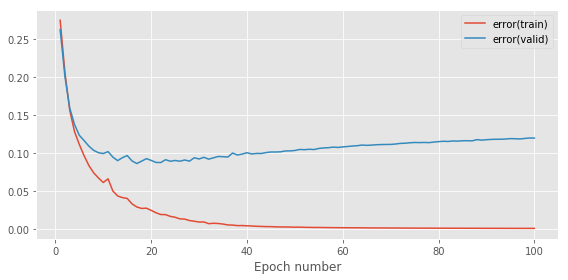

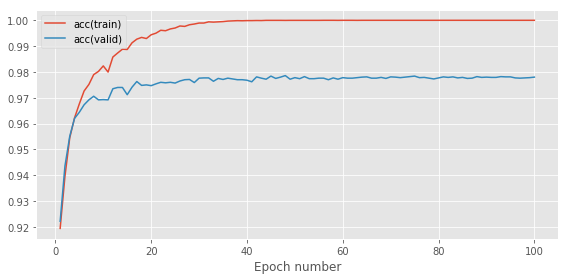

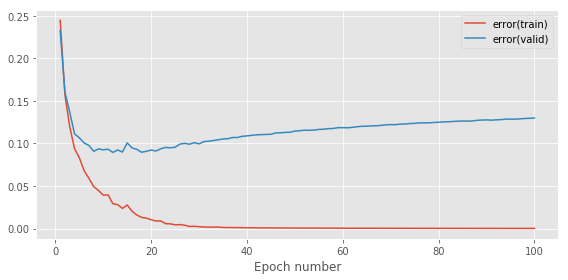

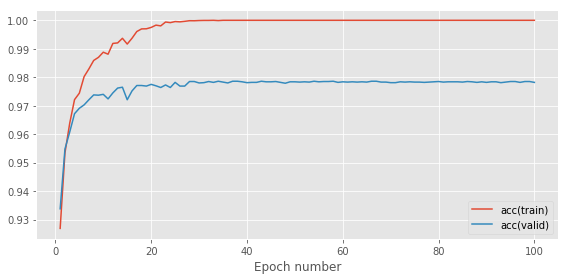

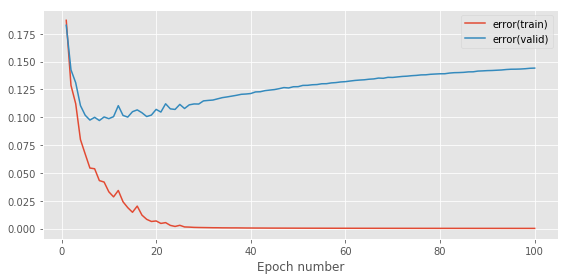

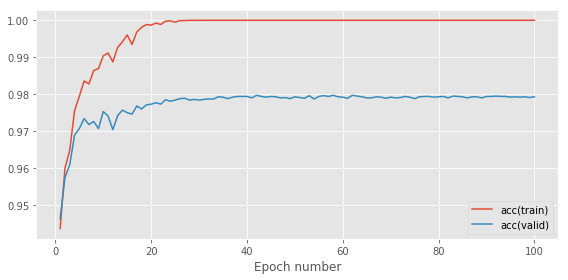

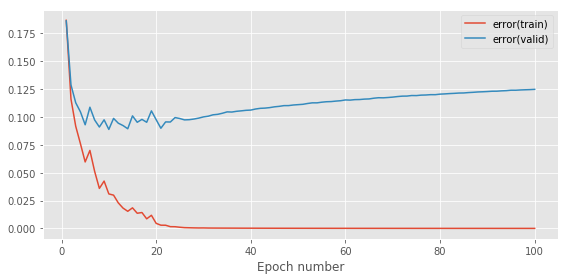

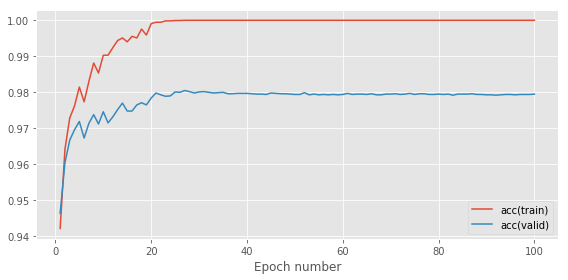

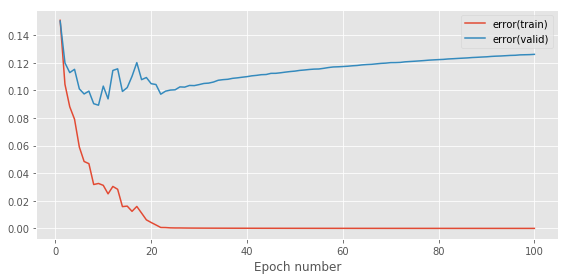

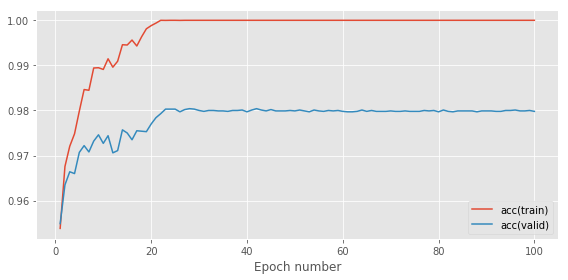

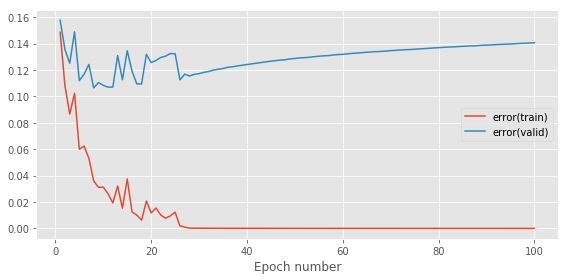

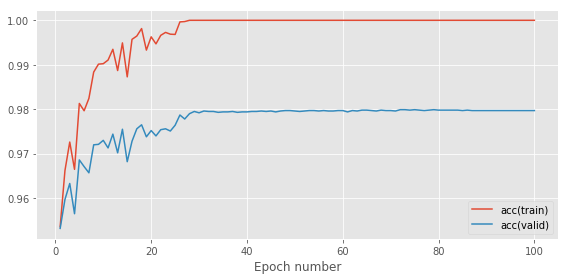

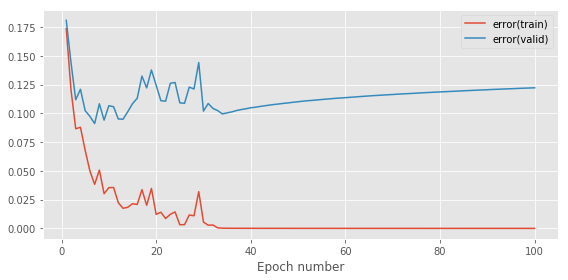

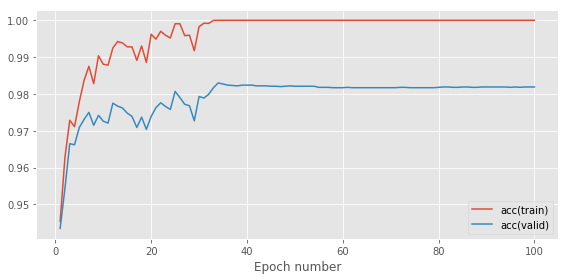

In [41]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

def setupModel(input_dim, hidden_dim, output_dim, weights_init, biases_init, hiddenLayers = 2):
    train_data.reset()
    valid_data.reset()
    layerList = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init), SELULayer()]
    while(hiddenLayers > 1):
        layerList += [AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), SELULayer()]
        hiddenLayers -= 1
    layerList += [AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]
    return MultipleLayerModel(layerList)

#setup hyperparameters
learning_rate = 0.05
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

rng = np.random.RandomState(seed)
weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
feedback = {}
layerList = [2, 3, 4, 5, 6, 7, 8]
for index in layerList:
    model = setupModel(input_dim, hidden_dim, output_dim, weights_init, biases_init, hiddenLayers = index)
    #Remember to use notebook=False when you write a script to be run in a terminal
    feedback[index] = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, 
        stats_interval, notebook=True, picName = str(index) +"Layers")

# Training 8 hidden layers network using SELU with different initialisation strategies

HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 4.7s to complete
    error(train)=1.48e-01, acc(train)=9.54e-01, error(valid)=1.63e-01, acc(valid)=9.52e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 4.7s to complete
    error(train)=9.80e-02, acc(train)=9.69e-01, error(valid)=1.32e-01, acc(valid)=9.61e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 4.7s to complete
    error(train)=8.03e-02, acc(train)=9.74e-01, error(valid)=1.23e-01, acc(valid)=9.63e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 4.5s to complete
    error(train)=6.99e-02, acc(train)=9.78e-01, error(valid)=1.25e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 4.6s to complete
    error(train)=4.77e-02, acc(train)=9.84e-01, error(valid)=1.09e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 4.7s to complete
    error(train)=4.67e-02, acc(train)=9.84e-01, error(valid)=1.19e-01, acc(valid)=9.67e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 4.6s to complete
    error(train)=4.09e-02, acc(train)=9.86e-01, error(valid)=1.18e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 4.5s to complete
    error(train)=3.16e-02, acc(train)=9.89e-01, error(valid)=1.06e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 4.5s to complete
    error(train)=2.83e-02, acc(train)=9.90e-01, error(valid)=1.09e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 4.6s to complete
    error(train)=2.64e-02, acc(train)=9.91e-01, error(valid)=1.14e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 4.6s to complete
    error(train)=1.72e-02, acc(train)=9.94e-01, error(valid)=1.18e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 4.6s to complete
    error(train)=1.48e-02, acc(train)=9.95e-01, error(valid)=1.10e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 4.7s to complete
    error(train)=1.75e-02, acc(train)=9.94e-01, error(valid)=1.23e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 4.6s to complete
    error(train)=9.78e-03, acc(train)=9.97e-01, error(valid)=1.16e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 4.6s to complete
    error(train)=5.61e-03, acc(train)=9.98e-01, error(valid)=1.14e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 4.6s to complete
    error(train)=2.51e-03, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 4.6s to complete
    error(train)=1.74e-03, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 4.6s to complete
    error(train)=8.67e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 4.6s to complete
    error(train)=7.19e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 4.6s to complete
    error(train)=6.94e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 4.6s to complete
    error(train)=5.26e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 4.9s to complete
    error(train)=4.57e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 4.9s to complete
    error(train)=4.29e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 4.7s to complete
    error(train)=3.86e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 5.0s to complete
    error(train)=3.66e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 4.6s to complete
    error(train)=3.45e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 4.6s to complete
    error(train)=3.20e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 4.6s to complete
    error(train)=3.00e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 4.6s to complete
    error(train)=2.86e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 4.7s to complete
    error(train)=2.78e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 4.8s to complete
    error(train)=2.57e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 4.6s to complete
    error(train)=2.46e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 4.6s to complete
    error(train)=2.34e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 4.6s to complete
    error(train)=2.25e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 4.6s to complete
    error(train)=2.17e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 4.6s to complete
    error(train)=2.06e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 4.8s to complete
    error(train)=2.00e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 4.6s to complete
    error(train)=1.92e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 5.0s to complete
    error(train)=1.85e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 4.9s to complete
    error(train)=1.79e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 4.6s to complete
    error(train)=1.74e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 4.6s to complete
    error(train)=1.68e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 4.6s to complete
    error(train)=1.63e-04, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 4.8s to complete
    error(train)=1.57e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 4.6s to complete
    error(train)=1.52e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 4.6s to complete
    error(train)=1.48e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 4.6s to complete
    error(train)=1.44e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 4.6s to complete
    error(train)=1.40e-04, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 5.0s to complete
    error(train)=1.37e-04, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 4.6s to complete
    error(train)=1.32e-04, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 4.6s to complete
    error(train)=1.29e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 4.6s to complete
    error(train)=1.26e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 4.6s to complete
    error(train)=1.23e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 4.6s to complete
    error(train)=1.20e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 4.6s to complete
    error(train)=1.17e-04, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 4.8s to complete
    error(train)=1.14e-04, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 4.7s to complete
    error(train)=1.12e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 4.8s to complete
    error(train)=1.09e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 4.7s to complete
    error(train)=1.07e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 4.7s to complete
    error(train)=1.05e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 4.7s to complete
    error(train)=1.02e-04, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 4.6s to complete
    error(train)=1.00e-04, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 4.6s to complete
    error(train)=9.80e-05, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 4.6s to complete
    error(train)=9.61e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 5.3s to complete
    error(train)=9.44e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 4.6s to complete
    error(train)=9.23e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 4.9s to complete
    error(train)=9.06e-05, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 4.6s to complete
    error(train)=8.90e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 4.6s to complete
    error(train)=8.75e-05, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 4.7s to complete
    error(train)=8.61e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 4.7s to complete
    error(train)=8.41e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 5.9s to complete
    error(train)=8.27e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 5.1s to complete
    error(train)=8.12e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 5.1s to complete
    error(train)=7.98e-05, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 5.0s to complete
    error(train)=7.86e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 5.5s to complete
    error(train)=7.72e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 5.7s to complete
    error(train)=7.60e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 5.4s to complete
    error(train)=7.47e-05, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 4.7s to complete
    error(train)=7.36e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 4.6s to complete
    error(train)=7.24e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 4.8s to complete
    error(train)=7.12e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 5.3s to complete
    error(train)=7.02e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 5.1s to complete
    error(train)=6.91e-05, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 5.2s to complete
    error(train)=6.80e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 5.1s to complete
    error(train)=6.70e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 5.6s to complete
    error(train)=6.60e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 5.8s to complete
    error(train)=6.51e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 6.7s to complete
    error(train)=6.42e-05, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 5.0s to complete
    error(train)=6.33e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 4.7s to complete
    error(train)=6.24e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 4.7s to complete
    error(train)=6.15e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 5.5s to complete
    error(train)=6.07e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 4.9s to complete
    error(train)=5.98e-05, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 5.2s to complete
    error(train)=5.90e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 4.6s to complete
    error(train)=5.83e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 4.6s to complete
    error(train)=5.75e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 4.6s to complete
    error(train)=5.68e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 5.4s to complete
    error(train)=5.61e-05, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 4.7s to complete
    error(train)=5.53e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 4.7s to complete
    error(train)=5.47e-05, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 5.2s to complete
    error(train)=1.79e-01, acc(train)=9.44e-01, error(valid)=1.79e-01, acc(valid)=9.45e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 5.5s to complete
    error(train)=1.13e-01, acc(train)=9.65e-01, error(valid)=1.33e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 6.2s to complete
    error(train)=9.33e-02, acc(train)=9.71e-01, error(valid)=1.27e-01, acc(valid)=9.62e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 4.8s to complete
    error(train)=7.50e-02, acc(train)=9.76e-01, error(valid)=1.09e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 5.0s to complete
    error(train)=6.05e-02, acc(train)=9.80e-01, error(valid)=1.06e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 5.2s to complete
    error(train)=5.26e-02, acc(train)=9.83e-01, error(valid)=1.06e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 4.8s to complete
    error(train)=4.82e-02, acc(train)=9.84e-01, error(valid)=1.09e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 5.4s to complete
    error(train)=3.26e-02, acc(train)=9.90e-01, error(valid)=9.10e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 5.7s to complete
    error(train)=3.56e-02, acc(train)=9.89e-01, error(valid)=1.00e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 5.3s to complete
    error(train)=2.93e-02, acc(train)=9.91e-01, error(valid)=9.97e-02, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 5.0s to complete
    error(train)=3.04e-02, acc(train)=9.90e-01, error(valid)=1.08e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 4.9s to complete
    error(train)=3.30e-02, acc(train)=9.89e-01, error(valid)=1.15e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 4.6s to complete
    error(train)=1.75e-02, acc(train)=9.95e-01, error(valid)=9.86e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 4.6s to complete
    error(train)=1.63e-02, acc(train)=9.95e-01, error(valid)=1.04e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 5.0s to complete
    error(train)=1.62e-02, acc(train)=9.94e-01, error(valid)=1.10e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 4.5s to complete
    error(train)=9.87e-03, acc(train)=9.97e-01, error(valid)=9.98e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 4.6s to complete
    error(train)=7.38e-03, acc(train)=9.98e-01, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 5.5s to complete
    error(train)=7.18e-03, acc(train)=9.98e-01, error(valid)=1.03e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 4.6s to complete
    error(train)=3.55e-03, acc(train)=9.99e-01, error(valid)=9.68e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 4.6s to complete
    error(train)=3.63e-03, acc(train)=9.99e-01, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 4.5s to complete
    error(train)=1.58e-03, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 4.5s to complete
    error(train)=1.11e-03, acc(train)=1.00e+00, error(valid)=1.02e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 5.1s to complete
    error(train)=7.42e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 4.8s to complete
    error(train)=6.15e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 4.7s to complete
    error(train)=5.47e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 5.1s to complete
    error(train)=4.69e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 4.6s to complete
    error(train)=4.20e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 5.3s to complete
    error(train)=3.90e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 5.2s to complete
    error(train)=3.61e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 6.2s to complete
    error(train)=3.40e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 5.3s to complete
    error(train)=3.11e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 5.1s to complete
    error(train)=2.92e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 6.2s to complete
    error(train)=2.76e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 5.2s to complete
    error(train)=2.65e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 4.8s to complete
    error(train)=2.49e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 4.6s to complete
    error(train)=2.37e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 5.6s to complete
    error(train)=2.26e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 4.6s to complete
    error(train)=2.17e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 4.7s to complete
    error(train)=2.08e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 4.9s to complete
    error(train)=1.98e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 4.6s to complete
    error(train)=1.92e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 4.8s to complete
    error(train)=1.83e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 4.8s to complete
    error(train)=1.76e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 4.6s to complete
    error(train)=1.70e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 4.9s to complete
    error(train)=1.64e-04, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 4.7s to complete
    error(train)=1.58e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 4.6s to complete
    error(train)=1.53e-04, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 4.6s to complete
    error(train)=1.49e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 5.4s to complete
    error(train)=1.43e-04, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 5.0s to complete
    error(train)=1.40e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 4.5s to complete
    error(train)=1.35e-04, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 4.9s to complete
    error(train)=1.31e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 4.6s to complete
    error(train)=1.28e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 8.6s to complete
    error(train)=1.23e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 6.2s to complete
    error(train)=1.21e-04, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 5.4s to complete
    error(train)=1.17e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 5.2s to complete
    error(train)=1.14e-04, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 4.7s to complete
    error(train)=1.12e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 4.7s to complete
    error(train)=1.08e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 4.8s to complete
    error(train)=1.06e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 4.8s to complete
    error(train)=1.03e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 4.8s to complete
    error(train)=1.02e-04, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 4.7s to complete
    error(train)=9.86e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 5.2s to complete
    error(train)=9.65e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 4.8s to complete
    error(train)=9.42e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 4.6s to complete
    error(train)=9.22e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 4.6s to complete
    error(train)=9.02e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 4.7s to complete
    error(train)=8.87e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 5.0s to complete
    error(train)=8.66e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 4.6s to complete
    error(train)=8.50e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 4.6s to complete
    error(train)=8.31e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 5.3s to complete
    error(train)=8.15e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 4.2s to complete
    error(train)=7.99e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 4.3s to complete
    error(train)=7.84e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 4.2s to complete
    error(train)=7.69e-05, acc(train)=1.00e+00, error(valid)=1.28e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 4.6s to complete
    error(train)=7.55e-05, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 3.9s to complete
    error(train)=7.42e-05, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 4.0s to complete
    error(train)=7.29e-05, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 3.9s to complete
    error(train)=7.15e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 3.8s to complete
    error(train)=7.03e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 5.1s to complete
    error(train)=6.91e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 4.1s to complete
    error(train)=6.79e-05, acc(train)=1.00e+00, error(valid)=1.30e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 3.8s to complete
    error(train)=6.69e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 3.8s to complete
    error(train)=6.57e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 3.9s to complete
    error(train)=6.46e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 3.7s to complete
    error(train)=6.36e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 3.7s to complete
    error(train)=6.26e-05, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 4.7s to complete
    error(train)=6.18e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 3.8s to complete
    error(train)=6.07e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 3.7s to complete
    error(train)=5.98e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 4.2s to complete
    error(train)=5.90e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 3.7s to complete
    error(train)=5.79e-05, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 3.7s to complete
    error(train)=5.71e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 3.6s to complete
    error(train)=5.64e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 3.7s to complete
    error(train)=5.55e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 3.7s to complete
    error(train)=5.47e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 3.8s to complete
    error(train)=5.40e-05, acc(train)=1.00e+00, error(valid)=1.33e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 3.8s to complete
    error(train)=5.32e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 4.8s to complete
    error(train)=5.25e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 3.9s to complete
    error(train)=5.18e-05, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 3.8s to complete
    error(train)=1.94e-01, acc(train)=9.38e-01, error(valid)=2.00e-01, acc(valid)=9.36e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 3.7s to complete
    error(train)=1.28e-01, acc(train)=9.58e-01, error(valid)=1.60e-01, acc(valid)=9.49e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 3.7s to complete
    error(train)=1.03e-01, acc(train)=9.66e-01, error(valid)=1.40e-01, acc(valid)=9.60e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 3.9s to complete
    error(train)=7.34e-02, acc(train)=9.77e-01, error(valid)=1.22e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 3.8s to complete
    error(train)=5.82e-02, acc(train)=9.82e-01, error(valid)=1.20e-01, acc(valid)=9.66e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 3.8s to complete
    error(train)=4.92e-02, acc(train)=9.84e-01, error(valid)=1.04e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 3.6s to complete
    error(train)=4.20e-02, acc(train)=9.87e-01, error(valid)=1.14e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 3.8s to complete
    error(train)=3.75e-02, acc(train)=9.87e-01, error(valid)=1.14e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 3.6s to complete
    error(train)=2.42e-02, acc(train)=9.93e-01, error(valid)=1.07e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 3.6s to complete
    error(train)=3.18e-02, acc(train)=9.89e-01, error(valid)=1.19e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 3.6s to complete
    error(train)=1.96e-02, acc(train)=9.94e-01, error(valid)=1.19e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 3.6s to complete
    error(train)=2.99e-02, acc(train)=9.89e-01, error(valid)=1.27e-01, acc(valid)=9.68e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 3.6s to complete
    error(train)=2.09e-02, acc(train)=9.93e-01, error(valid)=1.32e-01, acc(valid)=9.69e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 3.6s to complete
    error(train)=1.42e-02, acc(train)=9.96e-01, error(valid)=1.32e-01, acc(valid)=9.71e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 3.7s to complete
    error(train)=1.34e-02, acc(train)=9.96e-01, error(valid)=1.31e-01, acc(valid)=9.73e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 3.6s to complete
    error(train)=9.89e-03, acc(train)=9.97e-01, error(valid)=1.23e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 3.8s to complete
    error(train)=8.08e-03, acc(train)=9.98e-01, error(valid)=1.21e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 5.2s to complete
    error(train)=2.86e-03, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 3.8s to complete
    error(train)=2.60e-03, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 3.7s to complete
    error(train)=1.07e-03, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 3.6s to complete
    error(train)=8.36e-04, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 3.7s to complete
    error(train)=6.80e-04, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 3.6s to complete
    error(train)=5.70e-04, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 3.6s to complete
    error(train)=5.19e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 3.6s to complete
    error(train)=4.62e-04, acc(train)=1.00e+00, error(valid)=1.29e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 3.7s to complete
    error(train)=4.19e-04, acc(train)=1.00e+00, error(valid)=1.31e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 3.7s to complete
    error(train)=3.93e-04, acc(train)=1.00e+00, error(valid)=1.32e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 3.7s to complete
    error(train)=3.56e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 3.7s to complete
    error(train)=3.34e-04, acc(train)=1.00e+00, error(valid)=1.34e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 3.8s to complete
    error(train)=3.16e-04, acc(train)=1.00e+00, error(valid)=1.35e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 3.6s to complete
    error(train)=2.98e-04, acc(train)=1.00e+00, error(valid)=1.36e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 3.6s to complete
    error(train)=2.81e-04, acc(train)=1.00e+00, error(valid)=1.37e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 3.8s to complete
    error(train)=2.64e-04, acc(train)=1.00e+00, error(valid)=1.38e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 3.8s to complete
    error(train)=2.51e-04, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 3.6s to complete
    error(train)=2.39e-04, acc(train)=1.00e+00, error(valid)=1.39e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 3.6s to complete
    error(train)=2.28e-04, acc(train)=1.00e+00, error(valid)=1.40e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 5.1s to complete
    error(train)=2.18e-04, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 4.2s to complete
    error(train)=2.08e-04, acc(train)=1.00e+00, error(valid)=1.41e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 3.9s to complete
    error(train)=1.99e-04, acc(train)=1.00e+00, error(valid)=1.42e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 3.7s to complete
    error(train)=1.92e-04, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 3.7s to complete
    error(train)=1.85e-04, acc(train)=1.00e+00, error(valid)=1.43e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 3.7s to complete
    error(train)=1.77e-04, acc(train)=1.00e+00, error(valid)=1.44e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 3.7s to complete
    error(train)=1.70e-04, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 3.6s to complete
    error(train)=1.65e-04, acc(train)=1.00e+00, error(valid)=1.45e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 3.6s to complete
    error(train)=1.60e-04, acc(train)=1.00e+00, error(valid)=1.46e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 3.7s to complete
    error(train)=1.54e-04, acc(train)=1.00e+00, error(valid)=1.46e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 3.7s to complete
    error(train)=1.49e-04, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 3.6s to complete
    error(train)=1.45e-04, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 4.3s to complete
    error(train)=1.40e-04, acc(train)=1.00e+00, error(valid)=1.47e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 4.1s to complete
    error(train)=1.36e-04, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 3.8s to complete
    error(train)=1.32e-04, acc(train)=1.00e+00, error(valid)=1.48e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 3.6s to complete
    error(train)=1.28e-04, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 3.6s to complete
    error(train)=1.25e-04, acc(train)=1.00e+00, error(valid)=1.49e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 3.6s to complete
    error(train)=1.22e-04, acc(train)=1.00e+00, error(valid)=1.50e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 3.9s to complete
    error(train)=1.19e-04, acc(train)=1.00e+00, error(valid)=1.50e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 5.2s to complete
    error(train)=1.16e-04, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 5.0s to complete
    error(train)=1.13e-04, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 4.8s to complete
    error(train)=1.10e-04, acc(train)=1.00e+00, error(valid)=1.51e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 5.3s to complete
    error(train)=1.07e-04, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 5.5s to complete
    error(train)=1.05e-04, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 4.9s to complete
    error(train)=1.02e-04, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 5.4s to complete
    error(train)=1.00e-04, acc(train)=1.00e+00, error(valid)=1.52e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 5.4s to complete
    error(train)=9.79e-05, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 4.7s to complete
    error(train)=9.57e-05, acc(train)=1.00e+00, error(valid)=1.53e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 4.6s to complete
    error(train)=9.36e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 4.7s to complete
    error(train)=9.16e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 4.7s to complete
    error(train)=8.99e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 5.1s to complete
    error(train)=8.81e-05, acc(train)=1.00e+00, error(valid)=1.54e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 4.8s to complete
    error(train)=8.62e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 4.7s to complete
    error(train)=8.45e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 4.8s to complete
    error(train)=8.28e-05, acc(train)=1.00e+00, error(valid)=1.55e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 5.4s to complete
    error(train)=8.12e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 4.6s to complete
    error(train)=7.99e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 4.7s to complete
    error(train)=7.83e-05, acc(train)=1.00e+00, error(valid)=1.56e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 4.7s to complete
    error(train)=7.69e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 4.9s to complete
    error(train)=7.56e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 4.9s to complete
    error(train)=7.42e-05, acc(train)=1.00e+00, error(valid)=1.57e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 4.6s to complete
    error(train)=7.29e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 4.7s to complete
    error(train)=7.17e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 6.5s to complete
    error(train)=7.05e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 5.2s to complete
    error(train)=6.94e-05, acc(train)=1.00e+00, error(valid)=1.58e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 4.7s to complete
    error(train)=6.82e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 4.7s to complete
    error(train)=6.71e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 4.8s to complete
    error(train)=6.60e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 4.6s to complete
    error(train)=6.50e-05, acc(train)=1.00e+00, error(valid)=1.59e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 4.7s to complete
    error(train)=6.40e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 5.2s to complete
    error(train)=6.30e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 5.5s to complete
    error(train)=6.20e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 4.8s to complete
    error(train)=6.11e-05, acc(train)=1.00e+00, error(valid)=1.60e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 4.8s to complete
    error(train)=6.02e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 4.8s to complete
    error(train)=5.94e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 4.6s to complete
    error(train)=5.85e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 4.8s to complete
    error(train)=5.77e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 4.9s to complete
    error(train)=5.68e-05, acc(train)=1.00e+00, error(valid)=1.61e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 4.8s to complete
    error(train)=5.61e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 4.8s to complete
    error(train)=5.53e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 4.8s to complete
    error(train)=5.46e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 4.8s to complete
    error(train)=5.38e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 4.6s to complete
    error(train)=5.31e-05, acc(train)=1.00e+00, error(valid)=1.62e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 4.6s to complete
    error(train)=5.24e-05, acc(train)=1.00e+00, error(valid)=1.63e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 1: 4.7s to complete
    error(train)=1.93e-01, acc(train)=9.39e-01, error(valid)=1.95e-01, acc(valid)=9.42e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 2: 4.7s to complete
    error(train)=1.34e-01, acc(train)=9.58e-01, error(valid)=1.41e-01, acc(valid)=9.57e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 3: 5.9s to complete
    error(train)=1.14e-01, acc(train)=9.63e-01, error(valid)=1.37e-01, acc(valid)=9.59e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 4: 5.3s to complete
    error(train)=8.07e-02, acc(train)=9.74e-01, error(valid)=1.16e-01, acc(valid)=9.65e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 5: 4.7s to complete
    error(train)=6.40e-02, acc(train)=9.80e-01, error(valid)=9.98e-02, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 6: 4.8s to complete
    error(train)=5.83e-02, acc(train)=9.81e-01, error(valid)=1.01e-01, acc(valid)=9.70e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 7: 4.8s to complete
    error(train)=4.56e-02, acc(train)=9.85e-01, error(valid)=9.37e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 8: 4.8s to complete
    error(train)=3.95e-02, acc(train)=9.87e-01, error(valid)=9.64e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 9: 5.2s to complete
    error(train)=3.70e-02, acc(train)=9.88e-01, error(valid)=9.85e-02, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 10: 5.0s to complete
    error(train)=2.83e-02, acc(train)=9.91e-01, error(valid)=9.09e-02, acc(valid)=9.76e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 11: 5.1s to complete
    error(train)=2.82e-02, acc(train)=9.90e-01, error(valid)=1.02e-01, acc(valid)=9.74e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 12: 4.3s to complete
    error(train)=2.48e-02, acc(train)=9.92e-01, error(valid)=9.50e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 13: 3.7s to complete
    error(train)=2.64e-02, acc(train)=9.91e-01, error(valid)=1.06e-01, acc(valid)=9.72e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 14: 4.0s to complete
    error(train)=1.62e-02, acc(train)=9.95e-01, error(valid)=9.65e-02, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 15: 3.8s to complete
    error(train)=1.34e-02, acc(train)=9.96e-01, error(valid)=1.00e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 16: 3.7s to complete
    error(train)=1.12e-02, acc(train)=9.97e-01, error(valid)=1.03e-01, acc(valid)=9.75e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 17: 3.8s to complete
    error(train)=1.16e-02, acc(train)=9.96e-01, error(valid)=9.72e-02, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 18: 3.7s to complete
    error(train)=7.40e-03, acc(train)=9.98e-01, error(valid)=9.65e-02, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 19: 5.2s to complete
    error(train)=4.33e-03, acc(train)=9.99e-01, error(valid)=1.01e-01, acc(valid)=9.77e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 20: 6.2s to complete
    error(train)=5.40e-03, acc(train)=9.99e-01, error(valid)=1.02e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 21: 5.4s to complete
    error(train)=3.13e-03, acc(train)=9.99e-01, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 22: 4.9s to complete
    error(train)=2.52e-03, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.78e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 23: 4.6s to complete
    error(train)=9.83e-04, acc(train)=1.00e+00, error(valid)=9.90e-02, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 24: 4.6s to complete
    error(train)=9.08e-04, acc(train)=1.00e+00, error(valid)=9.79e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 25: 4.6s to complete
    error(train)=5.32e-04, acc(train)=1.00e+00, error(valid)=9.94e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 26: 4.6s to complete
    error(train)=4.61e-04, acc(train)=1.00e+00, error(valid)=9.93e-02, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 27: 4.6s to complete
    error(train)=4.13e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 28: 4.5s to complete
    error(train)=3.80e-04, acc(train)=1.00e+00, error(valid)=1.01e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 29: 4.7s to complete
    error(train)=3.48e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 30: 4.7s to complete
    error(train)=3.21e-04, acc(train)=1.00e+00, error(valid)=1.03e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 31: 4.6s to complete
    error(train)=2.97e-04, acc(train)=1.00e+00, error(valid)=1.04e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 32: 4.6s to complete
    error(train)=2.81e-04, acc(train)=1.00e+00, error(valid)=1.05e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 33: 4.6s to complete
    error(train)=2.65e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 34: 4.6s to complete
    error(train)=2.50e-04, acc(train)=1.00e+00, error(valid)=1.06e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 35: 4.7s to complete
    error(train)=2.36e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.79e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 36: 5.2s to complete
    error(train)=2.23e-04, acc(train)=1.00e+00, error(valid)=1.07e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 37: 4.6s to complete
    error(train)=2.13e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 38: 4.6s to complete
    error(train)=2.04e-04, acc(train)=1.00e+00, error(valid)=1.08e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 39: 4.6s to complete
    error(train)=1.93e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 40: 4.5s to complete
    error(train)=1.85e-04, acc(train)=1.00e+00, error(valid)=1.09e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 41: 4.6s to complete
    error(train)=1.79e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 42: 4.6s to complete
    error(train)=1.71e-04, acc(train)=1.00e+00, error(valid)=1.10e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 43: 4.6s to complete
    error(train)=1.64e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 44: 4.6s to complete
    error(train)=1.58e-04, acc(train)=1.00e+00, error(valid)=1.11e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 45: 4.6s to complete
    error(train)=1.53e-04, acc(train)=1.00e+00, error(valid)=1.12e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 46: 4.8s to complete
    error(train)=1.47e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 47: 4.7s to complete
    error(train)=1.43e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 48: 4.9s to complete
    error(train)=1.37e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 49: 4.7s to complete
    error(train)=1.35e-04, acc(train)=1.00e+00, error(valid)=1.13e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 50: 4.7s to complete
    error(train)=1.29e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 51: 4.6s to complete
    error(train)=1.27e-04, acc(train)=1.00e+00, error(valid)=1.14e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 52: 6.2s to complete
    error(train)=1.22e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 53: 4.2s to complete
    error(train)=1.18e-04, acc(train)=1.00e+00, error(valid)=1.15e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 54: 4.4s to complete
    error(train)=1.14e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 55: 4.0s to complete
    error(train)=1.11e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 56: 4.2s to complete
    error(train)=1.10e-04, acc(train)=1.00e+00, error(valid)=1.16e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 57: 3.8s to complete
    error(train)=1.06e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 58: 3.7s to complete
    error(train)=1.04e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 59: 4.0s to complete
    error(train)=1.00e-04, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 60: 4.2s to complete
    error(train)=9.81e-05, acc(train)=1.00e+00, error(valid)=1.17e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 61: 4.0s to complete
    error(train)=9.56e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 62: 4.2s to complete
    error(train)=9.32e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 63: 4.1s to complete
    error(train)=9.12e-05, acc(train)=1.00e+00, error(valid)=1.18e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 64: 3.9s to complete
    error(train)=8.89e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 65: 4.1s to complete
    error(train)=8.71e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 66: 4.1s to complete
    error(train)=8.53e-05, acc(train)=1.00e+00, error(valid)=1.19e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 67: 4.9s to complete
    error(train)=8.33e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 68: 3.7s to complete
    error(train)=8.14e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 69: 6.5s to complete
    error(train)=7.98e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 70: 4.6s to complete
    error(train)=7.82e-05, acc(train)=1.00e+00, error(valid)=1.20e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 71: 4.1s to complete
    error(train)=7.66e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 72: 4.2s to complete
    error(train)=7.52e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 73: 3.8s to complete
    error(train)=7.37e-05, acc(train)=1.00e+00, error(valid)=1.21e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 74: 3.7s to complete
    error(train)=7.22e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 75: 4.0s to complete
    error(train)=7.11e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 76: 4.9s to complete
    error(train)=6.98e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 77: 4.1s to complete
    error(train)=6.83e-05, acc(train)=1.00e+00, error(valid)=1.22e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 78: 3.7s to complete
    error(train)=6.71e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 79: 3.7s to complete
    error(train)=6.59e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 80: 3.8s to complete
    error(train)=6.47e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 81: 3.9s to complete
    error(train)=6.36e-05, acc(train)=1.00e+00, error(valid)=1.23e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 82: 3.7s to complete
    error(train)=6.26e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 83: 3.6s to complete
    error(train)=6.15e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 84: 3.8s to complete
    error(train)=6.06e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 85: 4.1s to complete
    error(train)=5.97e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 86: 3.9s to complete
    error(train)=5.86e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 87: 5.5s to complete
    error(train)=5.76e-05, acc(train)=1.00e+00, error(valid)=1.24e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 88: 4.8s to complete
    error(train)=5.67e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 89: 4.9s to complete
    error(train)=5.59e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 90: 5.0s to complete
    error(train)=5.50e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 91: 5.3s to complete
    error(train)=5.42e-05, acc(train)=1.00e+00, error(valid)=1.25e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 92: 4.7s to complete
    error(train)=5.34e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 93: 4.7s to complete
    error(train)=5.25e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 94: 5.1s to complete
    error(train)=5.18e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 95: 4.9s to complete
    error(train)=5.11e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 96: 4.7s to complete
    error(train)=5.03e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 97: 4.7s to complete
    error(train)=4.96e-05, acc(train)=1.00e+00, error(valid)=1.26e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 98: 4.9s to complete
    error(train)=4.89e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 99: 4.9s to complete
    error(train)=4.82e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))

Epoch 100: 4.8s to complete
    error(train)=4.76e-05, acc(train)=1.00e+00, error(valid)=1.27e-01, acc(valid)=9.80e-01, params_penalty=0.00e+00


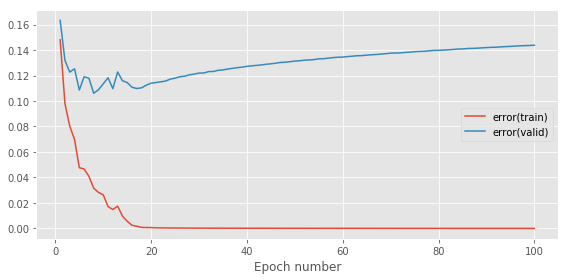

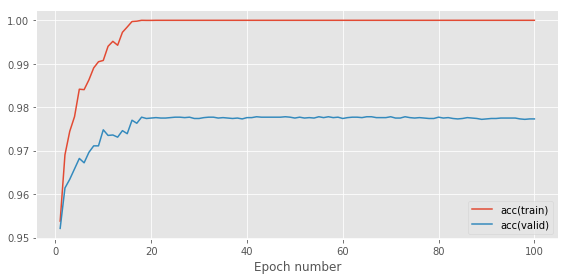

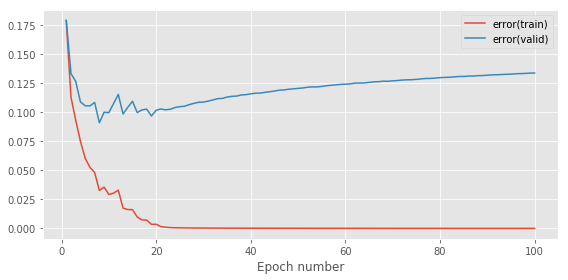

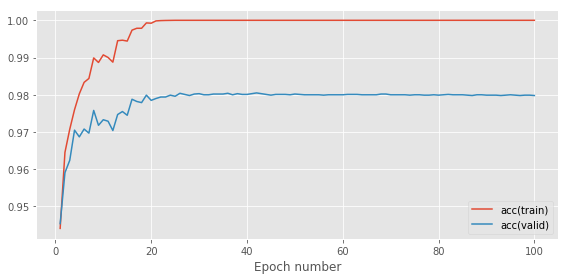

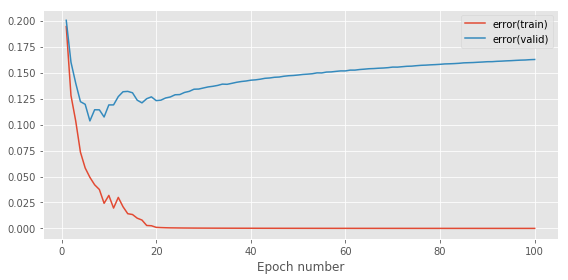

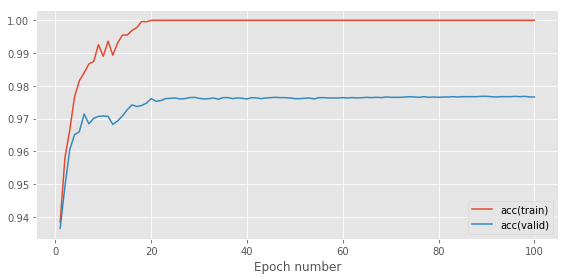

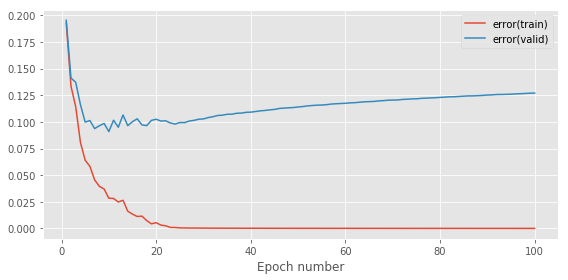

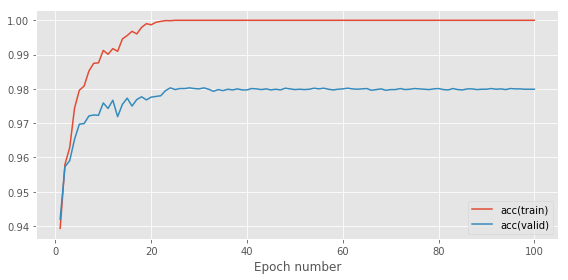

In [59]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit, FaninUniformInit, FanoutUniformInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

def setupModel(input_dim, hidden_dim, output_dim, weights_init, biases_init, hiddenLayers = 2):
    train_data.reset()
    valid_data.reset()
    layerList = [AffineLayer(input_dim, hidden_dim, weights_init, biases_init), SELULayer()]
    while(hiddenLayers > 1):
        layerList += [AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), SELULayer()]
        hiddenLayers -= 1
    layerList += [AffineLayer(hidden_dim, output_dim, weights_init, biases_init)]
    return MultipleLayerModel(layerList)

#setup hyperparameters
learning_rate = 0.03
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 10, 100

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)
biases_init = ConstantInit(0.)

  

    
# Gaussian initialisation
rng = np.random.RandomState(seed)
weights_init = SELUInit(rng=rng)
model = setupModel(input_dim, hidden_dim, output_dim, weights_init, biases_init, hiddenLayers = 8)
#Remember to use notebook=False when you write a script to be run in a terminal
feedback_3 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, 
    stats_interval, notebook=True, picName = "SELUInit")

# Glorot uniform initialisation
rng = np.random.RandomState(seed)
weights_init = GlorotUniformInit(rng=rng)
model = setupModel(input_dim, hidden_dim, output_dim, weights_init, biases_init, hiddenLayers = 8)
#Remember to use notebook=False when you write a script to be run in a terminal
feedback_0 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, 
    stats_interval, notebook=True, picName = "GlorotInit")
  
# Fanin uniform initialisation
rng = np.random.RandomState(seed)
weights_init = FaninUniformInit(rng=rng)
model = setupModel(input_dim, hidden_dim, output_dim, weights_init, biases_init, hiddenLayers = 8)
#Remember to use notebook=False when you write a script to be run in a terminal
feedback_1 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, 
    stats_interval, notebook=True, picName = "FaninInit")
    
# Fanout uniform initialisation
rng = np.random.RandomState(seed)
weights_init = FanoutUniformInit(rng=rng)
model = setupModel(input_dim, hidden_dim, output_dim, weights_init, biases_init, hiddenLayers = 8)
#Remember to use notebook=False when you write a script to be run in a terminal
feedback_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, 
    stats_interval, notebook=True, picName = "FanoutInit")

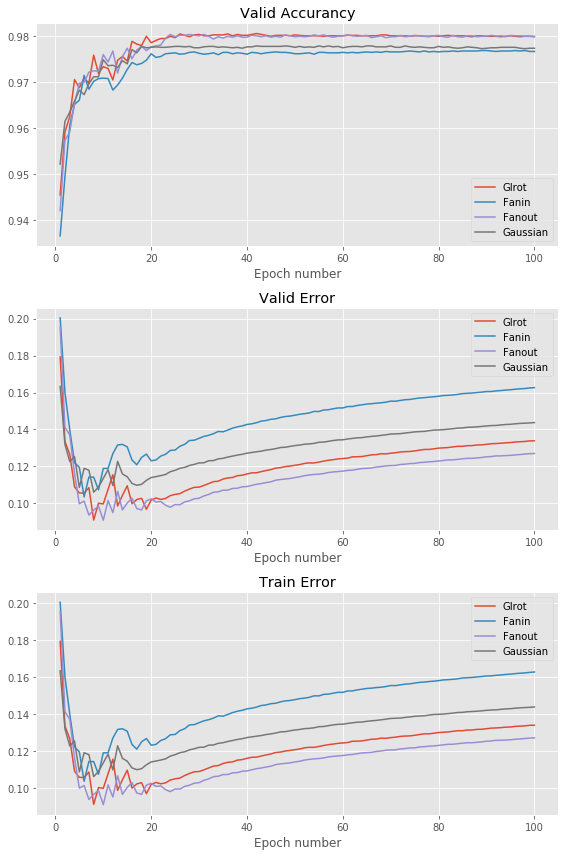

In [92]:
 # Plot different initialisation strategies effect
stats = {}
initStrategy = list(['Glrot', 'Fanin', 'Fanout', 'Gaussian'])
stats[0] = feedback_0[0]
stats[1] = feedback_1[0]
stats[2] = feedback_2[0]
stats[3] = feedback_3[0]
keys = feedback_0[1]
#keys[1] = feedback_1[1]
#keys[2] = feedback_2[1]
#keys[3] = feedback_3[1]
fig_1 = plt.figure(figsize=(8, 12))
ax_1 = fig_1.add_subplot(311)
for k in {0, 1, 2, 3}:
    stat = stats[k]
    ax_1.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['acc(valid)']], label=initStrategy[k])
ax_1.legend(loc=0)
ax_1.set_title('Valid Accurancy')
ax_1.set_xlabel('Epoch number')
    

    
#fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_1.add_subplot(312)
for k in {0, 1, 2, 3}:
    stat = stats[k]
    ax_2.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['error(valid)']], label=initStrategy[k])
ax_2.legend(loc=0)
ax_2.set_title('Valid Error')
ax_2.set_xlabel('Epoch number')

ax_3 = fig_1.add_subplot(313)
for k in {0, 1, 2, 3}:
    stat = stats[k]
    ax_3.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['error(valid)']], label=initStrategy[k])
ax_3.legend(loc=0)
ax_3.set_title('Train Error')
ax_3.set_xlabel('Epoch number')
    
    
fileName = "InitStrategiesEffect.pdf"
fig_1.tight_layout() # This minimises whitespace around the axes.
fig_1.savefig(fileName) # Save figure to current directory in PDF format

#fileName = "InitStrategiesVaildError.svg"
#fig_2.tight_layout() # This minimises whitespace around the axes.
#fig_2.savefig(fileName) # Save figure to current directory in PDF format
    

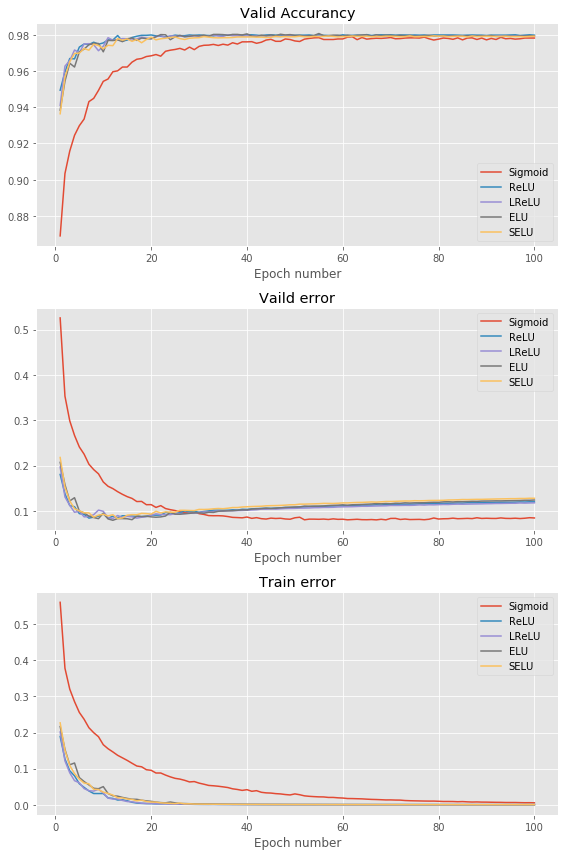

In [80]:
# Plot the effect of activation function
stats = {}
initStrategy = list(['Sigmoid', 'ReLU', 'LReLU', 'ELU', 'SELU'])
stats[0] = FB_SigU[0]
stats[1] = FB_ReLU[0]
stats[2] = FB_LReLU[0]
stats[3] = FB_ELU[0]
stats[4] = FB_SELU[0]
keys = FB_SigU[1]
#keys[1] = feedback_1[1]
#keys[2] = feedback_2[1]
#keys[3] = feedback_3[1]
fig_1 = plt.figure(figsize=(8, 12))
ax_1 = fig_1.add_subplot(311)
for k in {0, 1, 2, 3, 4}:
    stat = stats[k]
    ax_1.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['acc(valid)']], label=initStrategy[k])
ax_1.legend(loc=0)
ax_1.set_title('Valid Accurancy')
ax_1.set_xlabel('Epoch number')

ax_2 = fig_1.add_subplot(312)
for k in {0, 1, 2, 3, 4}:
    stat = stats[k]
    ax_2.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['error(valid)']], label=initStrategy[k])
ax_2.legend(loc=0)
ax_2.set_title('Vaild error')
ax_2.set_xlabel('Epoch number')
    
ax_3 = fig_1.add_subplot(313)
for k in {0, 1, 2, 3, 4}:
    stat = stats[k]
    ax_3.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['error(train)']], label=initStrategy[k])
ax_3.legend(loc=0)
ax_3.set_title('Train error')
ax_3.set_xlabel('Epoch number')

fileName = "ActivationFunc.pdf"
fig_1.tight_layout() # This minimises whitespace around the axes.
fig_1.savefig(fileName) # Save figure to current directory in PDF format

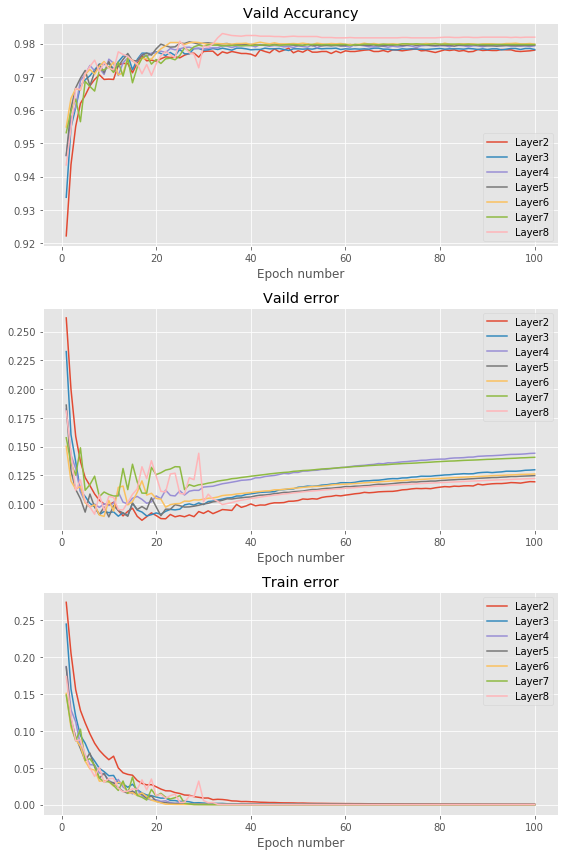

In [87]:
# Plot the effect of the number of hidden layers
stats = {}
initStrategy = list(['Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'Layer7', 'Layer8'])
stats[0] = (feedback[2])[0]
stats[1] = (feedback[3])[0]
stats[2] = (feedback[4])[0]
stats[3] = (feedback[5])[0]
stats[4] = (feedback[6])[0]
stats[5] = (feedback[7])[0]
stats[6] = (feedback[8])[0]
keys = FB_SigU[1]
#keys[1] = feedback_1[1]
#keys[2] = feedback_2[1]
#keys[3] = feedback_3[1]
fig_1 = plt.figure(figsize=(8, 12))
ax_1 = fig_1.add_subplot(311)
for k in {0, 1, 2, 3, 4, 5, 6}:
    stat = stats[k]
    ax_1.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['acc(valid)']], label=initStrategy[k])
ax_1.legend(loc=0)
ax_1.set_title('Vaild Accurancy')
ax_1.set_xlabel('Epoch number')

ax_2 = fig_1.add_subplot(312)
for k in {0, 1, 2, 3, 4, 5, 6}:
    stat = stats[k]
    ax_2.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['error(valid)']], label=initStrategy[k])
ax_2.legend(loc=0)
ax_2.set_title('Vaild error')
ax_2.set_xlabel('Epoch number')
    
ax_3 = fig_1.add_subplot(313)
for k in {0, 1, 2, 3, 4, 5, 6}:
    stat = stats[k]
    ax_3.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['error(train)']], label=initStrategy[k])
ax_3.legend(loc=0)
ax_3.set_title('Train error')
ax_3.set_xlabel('Epoch number')

    
fileName = "NumberOfLayers.pdf"
fig_1.tight_layout() # This minimises whitespace around the axes.
fig_1.savefig(fileName) # Save figure to current directory in PDF format

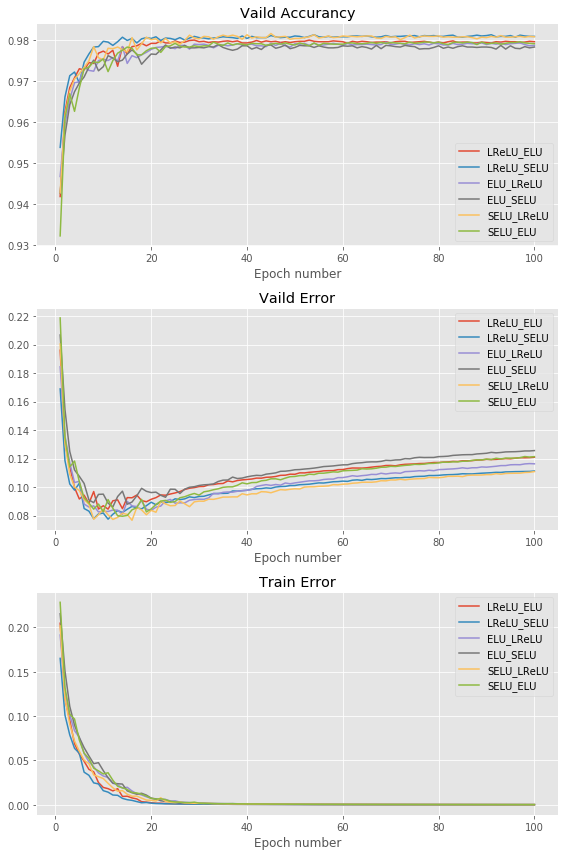

In [89]:
# Plot MixedActivationFuncAcc
stats = {}
initStrategy = list(['LReLU_ELU', 'LReLU_SELU', 'ELU_LReLU', 'ELU_SELU', 'SELU_LReLU', 'SELU_ELU'])
stats[0] = FB_LReLU_ELU[0]
stats[1] = FB_LReLU_SELU[0]
stats[2] = FB_ELU_LReLU[0]
stats[3] = FB_ELU_SELU[0]
stats[4] = FB_SELU_LReLU[0]
stats[5] = FB_SELU_ELU[0]
keys = FB_SigU[1]
#keys[1] = feedback_1[1]
#keys[2] = feedback_2[1]
#keys[3] = feedback_3[1]
fig_1 = plt.figure(figsize=(8, 12))
ax_1 = fig_1.add_subplot(311)
for k in {0, 1, 2, 3, 4, 5}:
    stat = stats[k]
    ax_1.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['acc(valid)']], label=initStrategy[k])
ax_1.legend(loc=0)
ax_1.set_title('Vaild Accurancy')
ax_1.set_xlabel('Epoch number')

ax_2 = fig_1.add_subplot(312)
for k in {0, 1, 2, 3, 4, 5}:
    stat = stats[k]
    ax_2.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['error(valid)']], label=initStrategy[k])
ax_2.legend(loc=0)
ax_2.set_title('Vaild Error')
ax_2.set_xlabel('Epoch number')
    
ax_3 = fig_1.add_subplot(313)
for k in {0, 1, 2, 3, 4, 5}:
    stat = stats[k]
    ax_3.plot(np.arange(1, stat.shape[0]) * 1, 
              stat[1:, keys['error(train)']], label=initStrategy[k])
ax_3.legend(loc=0)
ax_3.set_title('Train Error')
ax_3.set_xlabel('Epoch number')
    
fileName = "MixedActivationFunc.pdf"
fig_1.tight_layout() # This minimises whitespace around the axes.
fig_1.savefig(fileName) # Save figure to current directory in PDF format

In [90]:
feedback_0[1]

{'acc(train)': 1,
 'acc(valid)': 3,
 'error(train)': 0,
 'error(valid)': 2,
 'params_penalty': 4}